## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../05_input_data/Sites_with_Sentinel_bands_data.xlsx'
df = pd.read_excel(site_data, sheet_name='input_2020')
df.head()

,Site #,Origin,Dominant_s,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,X_N36,...,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12,r2020B13
0,1,n,Birch,4.771,1.792,-0.211,-0.261,-2.040,1.932,298987.203,...,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806,0.040781
1,2,a,Pine,5.808,2.496,-0.073,0.392,-0.139,2.674,299016.572,...,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723,-0.102776
2,3,a,Pine,5.796,2.546,0.030,0.501,-0.030,2.734,299072.773,...,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603,-0.063200
3,4,a,Pine,5.826,2.643,0.000,0.419,-0.431,2.785,299152.693,...,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609,-0.057177
4,5,a,Pine,6.059,2.643,0.122,0.647,-0.386,2.809,299249.689,...,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698,-0.073830


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Site #', 'Origin', 'Dominant_s', 'LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'LN_Cs_wood', 'LN_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'LN_Tag_Cs', 'LN_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_mean', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['LN_GS_cub_m', 'LN_M_stem_kg_m2', 'LN_M_stem_bark_kg_m2', 'LN_M_crown_kg_m2', 'LN_M_foliage_kg_m2', 'LN_M_AG_kg_m2', 'LN_Tag_Cs', 'LN_Tag_Sr',
                                  'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])

# Show the first five columns
select.head()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
0,4.771,1.792,-0.211,-0.261,-2.040,1.932,-0.73,2.58,0.019397,0.035344,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806
1,5.808,2.496,-0.073,0.392,-0.139,2.674,0.59,2.92,0.019167,0.033537,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723
2,5.796,2.546,0.030,0.501,-0.030,2.734,0.78,2.88,0.019568,0.035957,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603
3,5.826,2.643,0.000,0.419,-0.431,2.785,0.52,2.72,0.020556,0.033868,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609
4,6.059,2.643,0.122,0.647,-0.386,2.809,0.22,2.83,0.019003,0.036153,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LN_GS_cub_m           198 non-null    float64
 1   LN_M_stem_kg_m2       198 non-null    float64
 2   LN_M_stem_bark_kg_m2  198 non-null    float64
 3   LN_M_crown_kg_m2      198 non-null    float64
 4   LN_M_foliage_kg_m2    198 non-null    float64
 5   LN_M_AG_kg_m2         198 non-null    float64
 6   LN_Tag_Cs             198 non-null    float64
 7   LN_Tag_Sr             198 non-null    float64
 8   r2020B01              198 non-null    float64
 9   r2020B02              198 non-null    float64
 10  r2020B03              198 non-null    float64
 11  r2020B04              198 non-null    float64
 12  r2020B05              198 non-null    float64
 13  r2020B06              198 non-null    float64
 14  r2020B07              198 non-null    float64
 15  r2020B08              1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["LN_GS_cub_m", "LN_M_AG_kg_m2"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                   \
                 count      mean       std    min     25%    50%    75%   
Dominant_s                                                                
Alder             13.0  5.954615  0.321593  5.342  5.7620  6.023  6.205   
Aspen              7.0  5.382429  0.530860  4.844  4.9900  5.231  5.713   
Birch             45.0  4.897244  0.745395  2.398  4.6440  5.004  5.366   
Oak                9.0  5.213444  0.513140  4.344  4.7710  5.460  5.642   
Pine             123.0  5.270488  1.252592  1.609  4.9665  5.784  6.100   
Spruce             1.0  6.431000       NaN  6.431  6.4310  6.431  6.431   

                  LN_M_AG_kg_m2                                            \
              max         count      mean       std    min     25%    50%   
Dominant_s                                                                  
Alder       6.330          13.0  2.891692  0.293107  2.407  2.6530  2.970   
Aspen       6.196           7.0  2.459000  0.532848  1.902  2.0420  2.370   
Birch       5.858          45.0  2.051800  0.678888  0.000  1.7580  2.219   
Oak         5.765           9.0  2.459333  0.507916  1.569  2.0010  2.715   
Pine        6.457         123.0  2.305008  1.053778 -0.693  2.0605  2.681   
Spruce      6.431           1.0  3.506000       NaN  3.506  3.5060  3.506   

                           
               75%    max  
Dominant_s                 
Alder       3.1350  3.258  
Aspen       2.8375  3.182  
Birch       2.5260  2.923  
Oak         2.8150  3.025  
Pine        3.0110  3.515  
Spruce      3.5060  3.506

In [6]:
# Descriptive statistics of main parameters
select.describe()

,LN_GS_cub_m,LN_M_stem_kg_m2,LN_M_stem_bark_kg_m2,LN_M_crown_kg_m2,LN_M_foliage_kg_m2,LN_M_AG_kg_m2,LN_Tag_Cs,LN_Tag_Sr,r2020B01,r2020B02,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
count,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.237803,2.109995,-0.11297,0.075646,-0.970066,2.304505,-0.566313,2.340253,0.022479,0.036321,0.027499,0.213645,0.125537,0.063662,0.767194,-0.703079,0.540963,-16.145709,-10.863669,0.675418
std,1.091051,1.039582,0.78467,0.711102,0.713109,0.928222,1.248087,0.938549,0.005381,0.006531,0.009532,0.042641,0.035475,0.023731,0.078273,0.060738,0.132304,1.343250,1.161017,0.069250
min,1.609000,-1.347000,-2.65900,-2.408000,-3.507000,-0.693000,-4.680000,-0.250000,0.012648,0.024838,0.014640,0.124161,0.079896,0.036570,0.381333,-0.823403,0.038198,-22.517731,-14.262763,0.492975
25%,4.914250,1.797000,-0.27075,-0.148000,-1.514000,2.001000,-1.327500,1.742500,0.019615,0.033225,0.022284,0.187070,0.095832,0.046290,0.745438,-0.735205,0.502225,-16.970102,-11.519514,0.628884
50%,5.517000,2.413000,0.04400,0.289000,-0.788000,2.565000,-0.465000,2.460000,0.021938,0.035316,0.024743,0.204261,0.115558,0.058209,0.784239,-0.704881,0.577675,-16.010171,-10.784612,0.667561
75%,5.989750,2.798500,0.33250,0.531000,-0.386000,2.899750,0.380000,2.992500,0.023920,0.037919,0.028527,0.236440,0.150857,0.072122,0.808780,-0.680539,0.632284,-15.159997,-10.008004,0.720595
max,6.457000,3.428000,1.38400,1.756000,0.157000,3.515000,1.650000,4.660000,0.058966,0.075169,0.080615,0.369338,0.243667,0.187427,0.885319,-0.410944,0.710583,-13.281957,-7.650135,0.860863


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_M_AG_kg_m2"
indep_variables = ['r2020B01', 'r2020B03', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B10', 'r2020B11']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     LN_GS_cub_m  LN_M_stem_kg_m2  LN_M_stem_bark_kg_m2  LN_M_crown_kg_m2  \
0          4.771            1.792                -0.211            -0.261   
1          5.808            2.496                -0.073             0.392   
2          5.796            2.546                 0.030             0.501   
3          5.826            2.643                 0.000             0.419   
4          6.059            2.643                 0.122             0.647   
..           ...              ...                   ...               ...   
193        6.238            3.125                 0.322             0.560   
194        5.861            2.702                 0.058             0.482   
195        5.935            2.775                -0.030             0.372   
196        5.784            2.546                -0.117             0.182   
197        6.277            2.949                 0.182             0.501   

     LN_M_foliage_kg_m2  LN_M_AG_kg_m2  LN_Tag_Cs  LN_Tag_Sr  r2020B01  \
0

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,r2020B01,r2020B03,r2020B05,r2020B06,r2020B07,r2020B10,r2020B11
0,0.019397,0.028616,0.175280,0.086611,0.797761,-15.527246,-11.385074
1,0.019167,0.022230,0.092225,0.047120,0.789129,-16.547673,-10.947565
2,0.019568,0.021190,0.093062,0.043824,0.812120,-14.341917,-11.884799
3,0.020556,0.025284,0.102872,0.048585,0.762431,-14.885610,-11.725163
4,0.019003,0.024911,0.096981,0.044880,0.793606,-14.647913,-11.512282


In [11]:
# Columns in "y" data collections
y.head()

,LN_M_AG_kg_m2
0,1.932
1,2.674
2,2.734
3,2.785
4,2.809


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.4256390343638169, 0.45188595622687533, -0.3065799080930214]
    Mean: 0.190
    Std: 0.352

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.71408543 0.84178138 0.83860243]
    Mean: 0.798
    Std: 0.059

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5029190032337651, 0.6021848483139818, 0.6523283069097634]
    Mean: 0.586
    Std: 0.062

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.19889386656261027                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.4101907802915649                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.04473444304408665                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 114          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.4126482988885791                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.19889386656261027
Gamma: 0.4101907802915649
Learning_rate: 0.04473444304408665
Max_depth: 2
N_estimators: 114
Subsample: 0.4126482988885791


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.94003	validation_1-rmse:2.01054
[1]	validation_0-rmse:1.86479	validation_1-rmse:1.93627
[2]	validation_0-rmse:1.79717	validation_1-rmse:1.87203
[3]	validation_0-rmse:1.73292	validation_1-rmse:1.80889
[4]	validation_0-rmse:1.67286	validation_1-rmse:1.75083
[5]	validation_0-rmse:1.61522	validation_1-rmse:1.69367


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56258	validation_1-rmse:1.64417
[7]	validation_0-rmse:1.50425	validation_1-rmse:1.58997
[8]	validation_0-rmse:1.45092	validation_1-rmse:1.53658
[9]	validation_0-rmse:1.40371	validation_1-rmse:1.49216
[10]	validation_0-rmse:1.36197	validation_1-rmse:1.45590
[11]	validation_0-rmse:1.31563	validation_1-rmse:1.40946
[12]	validation_0-rmse:1.27410	validation_1-rmse:1.37030
[13]	validation_0-rmse:1.23957	validation_1-rmse:1.34001
[14]	validation_0-rmse:1.20170	validation_1-rmse:1.30532
[15]	validation_0-rmse:1.16592	validation_1-rmse:1.27001
[16]	validation_0-rmse:1.13236	validation_1-rmse:1.23881
[17]	validation_0-rmse:1.09333	validation_1-rmse:1.20323
[18]	validation_0-rmse:1.06787	validation_1-rmse:1.17715
[19]	validation_0-rmse:1.04197	validation_1-rmse:1.15301
[20]	validation_0-rmse:1.01167	validation_1-rmse:1.12591
[21]	validation_0-rmse:0.98567	validation_1-rmse:1.10106
[22]	validation_0-rmse:0.95882	validation_1-rmse:1.07838
[23]	validation_0-rmse:0.93295	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.94445	validation_1-rmse:1.99281
[1]	validation_0-rmse:1.86768	validation_1-rmse:1.91626
[2]	validation_0-rmse:1.79919	validation_1-rmse:1.85380
[3]	validation_0-rmse:1.73456	validation_1-rmse:1.78890
[4]	validation_0-rmse:1.67293	validation_1-rmse:1.73085
[5]	validation_0-rmse:1.61725	validation_1-rmse:1.67615
[6]	validation_0-rmse:1.56382	validation_1-rmse:1.63241
[7]	validation_0-rmse:1.50483	validation_1-rmse:1.57319
[8]	validation_0-rmse:1.45432	validation_1-rmse:1.52392
[9]	validation_0-rmse:1.40820	validation_1-rmse:1.47794
[10]	validation_0-rmse:1.36278	validation_1-rmse:1.43753
[11]	validation_0-rmse:1.31937	validation_1-rmse:1.39920


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.27750	validation_1-rmse:1.35663
[13]	validation_0-rmse:1.23835	validation_1-rmse:1.32478
[14]	validation_0-rmse:1.19928	validation_1-rmse:1.28530
[15]	validation_0-rmse:1.16155	validation_1-rmse:1.24938
[16]	validation_0-rmse:1.12410	validation_1-rmse:1.21466
[17]	validation_0-rmse:1.09447	validation_1-rmse:1.18297
[18]	validation_0-rmse:1.06378	validation_1-rmse:1.15759
[19]	validation_0-rmse:1.03327	validation_1-rmse:1.13012
[20]	validation_0-rmse:1.00538	validation_1-rmse:1.10454
[21]	validation_0-rmse:0.97844	validation_1-rmse:1.07935
[22]	validation_0-rmse:0.95419	validation_1-rmse:1.05598
[23]	validation_0-rmse:0.93032	validation_1-rmse:1.03224
[24]	validation_0-rmse:0.90838	validation_1-rmse:1.01226
[25]	validation_0-rmse:0.88668	validation_1-rmse:0.98684
[26]	validation_0-rmse:0.86945	validation_1-rmse:0.97548
[27]	validation_0-rmse:0.85286	validation_1-rmse:0.96132
[28]	validation_0-rmse:0.84013	validation_1-rmse:0.95023
[29]	validation_0-rmse:0.82371	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.96046	validation_1-rmse:1.92937
[1]	validation_0-rmse:1.88282	validation_1-rmse:1.85083
[2]	validation_0-rmse:1.80854	validation_1-rmse:1.77917
[3]	validation_0-rmse:1.74988	validation_1-rmse:1.72377
[4]	validation_0-rmse:1.69180	validation_1-rmse:1.66565
[5]	validation_0-rmse:1.62797	validation_1-rmse:1.60120
[6]	validation_0-rmse:1.57225	validation_1-rmse:1.54681
[7]	validation_0-rmse:1.51890	validation_1-rmse:1.49340
[8]	validation_0-rmse:1.46439	validation_1-rmse:1.43958
[9]	validation_0-rmse:1.41477	validation_1-rmse:1.39281
[10]	validation_0-rmse:1.36820	validation_1-rmse:1.34806
[11]	validation_0-rmse:1.31788	validation_1-rmse:1.29923
[12]	validation_0-rmse:1.27653	validation_1-rmse:1.25603
[13]	validation_0-rmse:1.23763	validation_1-rmse:1.21945
[14]	validation_0-rmse:1.19511	validation_1-rmse:1.17641
[15]	validation_0-rmse:1.15920	validation_1-rmse:1.13956
[16]	validation_0-rmse:1.12804	validation_1-rmse:1.11164
[17]	validation_0-rmse:1.09193	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94751	validation_1-rmse:2.02364
[1]	validation_0-rmse:1.88379	validation_1-rmse:1.95448
[2]	validation_0-rmse:1.82132	validation_1-rmse:1.88149


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.75534	validation_1-rmse:1.81338
[4]	validation_0-rmse:1.69351	validation_1-rmse:1.74059
[5]	validation_0-rmse:1.63412	validation_1-rmse:1.68199
[6]	validation_0-rmse:1.57989	validation_1-rmse:1.61946
[7]	validation_0-rmse:1.52845	validation_1-rmse:1.56470
[8]	validation_0-rmse:1.47048	validation_1-rmse:1.50010
[9]	validation_0-rmse:1.42090	validation_1-rmse:1.45091
[10]	validation_0-rmse:1.37981	validation_1-rmse:1.40152
[11]	validation_0-rmse:1.33492	validation_1-rmse:1.35073
[12]	validation_0-rmse:1.29593	validation_1-rmse:1.31016
[13]	validation_0-rmse:1.26099	validation_1-rmse:1.26498
[14]	validation_0-rmse:1.22471	validation_1-rmse:1.22565
[15]	validation_0-rmse:1.19329	validation_1-rmse:1.19097
[16]	validation_0-rmse:1.15733	validation_1-rmse:1.15444
[17]	validation_0-rmse:1.12837	validation_1-rmse:1.12316
[18]	validation_0-rmse:1.09764	validation_1-rmse:1.08435
[19]	validation_0-rmse:1.06722	validation_1-rmse:1.05324
[20]	validation_0-rmse:1.03837	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96219	validation_1-rmse:1.91441
[1]	validation_0-rmse:1.89547	validation_1-rmse:1.84386
[2]	validation_0-rmse:1.82943	validation_1-rmse:1.77836
[3]	validation_0-rmse:1.76062	validation_1-rmse:1.70596
[4]	validation_0-rmse:1.70065	validation_1-rmse:1.64540
[5]	validation_0-rmse:1.64270	validation_1-rmse:1.58171
[6]	validation_0-rmse:1.58949	validation_1-rmse:1.52875
[7]	validation_0-rmse:1.53326	validation_1-rmse:1.47033
[8]	validation_0-rmse:1.47998	validation_1-rmse:1.41610
[9]	validation_0-rmse:1.42816	validation_1-rmse:1.36394
[10]	validation_0-rmse:1.38979	validation_1-rmse:1.32769


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.34313	validation_1-rmse:1.27904
[12]	validation_0-rmse:1.30189	validation_1-rmse:1.23527
[13]	validation_0-rmse:1.26420	validation_1-rmse:1.19519
[14]	validation_0-rmse:1.22834	validation_1-rmse:1.15662
[15]	validation_0-rmse:1.19153	validation_1-rmse:1.11814
[16]	validation_0-rmse:1.15148	validation_1-rmse:1.07816
[17]	validation_0-rmse:1.11785	validation_1-rmse:1.04450
[18]	validation_0-rmse:1.09267	validation_1-rmse:1.01689
[19]	validation_0-rmse:1.06306	validation_1-rmse:0.98472
[20]	validation_0-rmse:1.03426	validation_1-rmse:0.95387
[21]	validation_0-rmse:1.01382	validation_1-rmse:0.93113
[22]	validation_0-rmse:0.99155	validation_1-rmse:0.90847
[23]	validation_0-rmse:0.97005	validation_1-rmse:0.88739
[24]	validation_0-rmse:0.94959	validation_1-rmse:0.86567
[25]	validation_0-rmse:0.92733	validation_1-rmse:0.84449
[26]	validation_0-rmse:0.90741	validation_1-rmse:0.82447
[27]	validation_0-rmse:0.89300	validation_1-rmse:0.81242
[28]	validation_0-rmse:0.87608	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.95212	validation_1-rmse:1.94991
[1]	validation_0-rmse:1.87949	validation_1-rmse:1.87823
[2]	validation_0-rmse:1.81222	validation_1-rmse:1.81067
[3]	validation_0-rmse:1.74074	validation_1-rmse:1.74100
[4]	validation_0-rmse:1.68208	validation_1-rmse:1.68147
[5]	validation_0-rmse:1.62559	validation_1-rmse:1.63055
[6]	validation_0-rmse:1.57216	validation_1-rmse:1.57791
[7]	validation_0-rmse:1.51923	validation_1-rmse:1.52885
[8]	validation_0-rmse:1.46791	validation_1-rmse:1.47929
[9]	validation_0-rmse:1.42076	validation_1-rmse:1.43437


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.37659	validation_1-rmse:1.38678
[11]	validation_0-rmse:1.33165	validation_1-rmse:1.34386
[12]	validation_0-rmse:1.28764	validation_1-rmse:1.29978
[13]	validation_0-rmse:1.24922	validation_1-rmse:1.25983
[14]	validation_0-rmse:1.20824	validation_1-rmse:1.22583
[15]	validation_0-rmse:1.17259	validation_1-rmse:1.18593
[16]	validation_0-rmse:1.13993	validation_1-rmse:1.15300
[17]	validation_0-rmse:1.10978	validation_1-rmse:1.12506
[18]	validation_0-rmse:1.08165	validation_1-rmse:1.09691
[19]	validation_0-rmse:1.05142	validation_1-rmse:1.06454
[20]	validation_0-rmse:1.02905	validation_1-rmse:1.04988
[21]	validation_0-rmse:1.00132	validation_1-rmse:1.02166
[22]	validation_0-rmse:0.97877	validation_1-rmse:1.00109
[23]	validation_0-rmse:0.95505	validation_1-rmse:0.97849
[24]	validation_0-rmse:0.93438	validation_1-rmse:0.96204
[25]	validation_0-rmse:0.90849	validation_1-rmse:0.93265
[26]	validation_0-rmse:0.89392	validation_1-rmse:0.91679
[27]	validation_0-rmse:0.87767	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96739	validation_1-rmse:1.87237
[1]	validation_0-rmse:1.89378	validation_1-rmse:1.80143
[2]	validation_0-rmse:1.82562	validation_1-rmse:1.73121
[3]	validation_0-rmse:1.75609	validation_1-rmse:1.66488
[4]	validation_0-rmse:1.69401	validation_1-rmse:1.60049
[5]	validation_0-rmse:1.63271	validation_1-rmse:1.54501
[6]	validation_0-rmse:1.57800	validation_1-rmse:1.48812
[7]	validation_0-rmse:1.51731	validation_1-rmse:1.43191


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46686	validation_1-rmse:1.38645
[9]	validation_0-rmse:1.41437	validation_1-rmse:1.34168
[10]	validation_0-rmse:1.37007	validation_1-rmse:1.29777
[11]	validation_0-rmse:1.32666	validation_1-rmse:1.26006
[12]	validation_0-rmse:1.28315	validation_1-rmse:1.22145
[13]	validation_0-rmse:1.24726	validation_1-rmse:1.18882
[14]	validation_0-rmse:1.20578	validation_1-rmse:1.15087
[15]	validation_0-rmse:1.16852	validation_1-rmse:1.12052
[16]	validation_0-rmse:1.12969	validation_1-rmse:1.09188
[17]	validation_0-rmse:1.09886	validation_1-rmse:1.06714
[18]	validation_0-rmse:1.06927	validation_1-rmse:1.04349
[19]	validation_0-rmse:1.03769	validation_1-rmse:1.01762
[20]	validation_0-rmse:1.00820	validation_1-rmse:0.99759
[21]	validation_0-rmse:0.98234	validation_1-rmse:0.97628
[22]	validation_0-rmse:0.95571	validation_1-rmse:0.95740
[23]	validation_0-rmse:0.93198	validation_1-rmse:0.94132
[24]	validation_0-rmse:0.90910	validation_1-rmse:0.92684
[25]	validation_0-rmse:0.88775	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.97726	validation_1-rmse:1.85461
[1]	validation_0-rmse:1.90401	validation_1-rmse:1.78366
[2]	validation_0-rmse:1.83703	validation_1-rmse:1.71578
[3]	validation_0-rmse:1.76850	validation_1-rmse:1.65017
[4]	validation_0-rmse:1.71176	validation_1-rmse:1.59255
[5]	validation_0-rmse:1.64785	validation_1-rmse:1.53114


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.58970	validation_1-rmse:1.47434
[7]	validation_0-rmse:1.53150	validation_1-rmse:1.41926
[8]	validation_0-rmse:1.47646	validation_1-rmse:1.36739
[9]	validation_0-rmse:1.42710	validation_1-rmse:1.32436
[10]	validation_0-rmse:1.38225	validation_1-rmse:1.28348
[11]	validation_0-rmse:1.33137	validation_1-rmse:1.23507
[12]	validation_0-rmse:1.28943	validation_1-rmse:1.19577
[13]	validation_0-rmse:1.25243	validation_1-rmse:1.16164
[14]	validation_0-rmse:1.21587	validation_1-rmse:1.12485
[15]	validation_0-rmse:1.17882	validation_1-rmse:1.08955
[16]	validation_0-rmse:1.13940	validation_1-rmse:1.05299
[17]	validation_0-rmse:1.10784	validation_1-rmse:1.02338
[18]	validation_0-rmse:1.08296	validation_1-rmse:0.99729
[19]	validation_0-rmse:1.05366	validation_1-rmse:0.97041
[20]	validation_0-rmse:1.02519	validation_1-rmse:0.94208
[21]	validation_0-rmse:0.99965	validation_1-rmse:0.91862
[22]	validation_0-rmse:0.97377	validation_1-rmse:0.89521
[23]	validation_0-rmse:0.95301	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96905	validation_1-rmse:1.88778


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.89475	validation_1-rmse:1.81586
[2]	validation_0-rmse:1.82199	validation_1-rmse:1.75919
[3]	validation_0-rmse:1.74981	validation_1-rmse:1.69453
[4]	validation_0-rmse:1.68696	validation_1-rmse:1.64322
[5]	validation_0-rmse:1.62645	validation_1-rmse:1.59138
[6]	validation_0-rmse:1.56976	validation_1-rmse:1.54524
[7]	validation_0-rmse:1.50973	validation_1-rmse:1.49526
[8]	validation_0-rmse:1.45504	validation_1-rmse:1.44674
[9]	validation_0-rmse:1.40316	validation_1-rmse:1.40502
[10]	validation_0-rmse:1.35777	validation_1-rmse:1.37139
[11]	validation_0-rmse:1.31033	validation_1-rmse:1.32798
[12]	validation_0-rmse:1.26433	validation_1-rmse:1.28691
[13]	validation_0-rmse:1.22144	validation_1-rmse:1.25918
[14]	validation_0-rmse:1.18430	validation_1-rmse:1.22915
[15]	validation_0-rmse:1.15048	validation_1-rmse:1.20303
[16]	validation_0-rmse:1.11474	validation_1-rmse:1.17644
[17]	validation_0-rmse:1.08129	validation_1-rmse:1.14547
[18]	validation_0-rmse:1.04747	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93690	validation_1-rmse:2.02068
[1]	validation_0-rmse:1.85697	validation_1-rmse:1.93408
[2]	validation_0-rmse:1.79126	validation_1-rmse:1.86881
[3]	validation_0-rmse:1.72657	validation_1-rmse:1.80210
[4]	validation_0-rmse:1.66765	validation_1-rmse:1.73857
[5]	validation_0-rmse:1.60856	validation_1-rmse:1.67864
[6]	validation_0-rmse:1.56142	validation_1-rmse:1.63243
[7]	validation_0-rmse:1.50883	validation_1-rmse:1.57853
[8]	validation_0-rmse:1.45324	validation_1-rmse:1.52001
[9]	validation_0-rmse:1.40333	validation_1-rmse:1.46604
[10]	validation_0-rmse:1.36001	validation_1-rmse:1.42004
[11]	validation_0-rmse:1.31393	validation_1-rmse:1.37166
[12]	validation_0-rmse:1.27048	validation_1-rmse:1.32859
[13]	validation_0-rmse:1.22972	validation_1-rmse:1.28432
[14]	validation_0-rmse:1.19515	validation_1-rmse:1.24883
[15]	validation_0-rmse:1.16189	validation_1-rmse:1.21373
[16]	validation_0-rmse:1.12829	validation_1-rmse:1.17752
[17]	validation_0-rmse:1.09795	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93828	validation_1-rmse:2.02016
[1]	validation_0-rmse:1.86836	validation_1-rmse:1.95514
[2]	validation_0-rmse:1.79867	validation_1-rmse:1.88696
[3]	validation_0-rmse:1.73629	validation_1-rmse:1.82409
[4]	validation_0-rmse:1.67240	validation_1-rmse:1.76754
[5]	validation_0-rmse:1.60911	validation_1-rmse:1.70861
[6]	validation_0-rmse:1.55502	validation_1-rmse:1.65946
[7]	validation_0-rmse:1.50340	validation_1-rmse:1.60804
[8]	validation_0-rmse:1.44758	validation_1-rmse:1.55689
[9]	validation_0-rmse:1.39705	validation_1-rmse:1.50568


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.35312	validation_1-rmse:1.46695
[11]	validation_0-rmse:1.30889	validation_1-rmse:1.42764
[12]	validation_0-rmse:1.26950	validation_1-rmse:1.39076
[13]	validation_0-rmse:1.23087	validation_1-rmse:1.35754
[14]	validation_0-rmse:1.19584	validation_1-rmse:1.32300
[15]	validation_0-rmse:1.16300	validation_1-rmse:1.29103
[16]	validation_0-rmse:1.12924	validation_1-rmse:1.25440
[17]	validation_0-rmse:1.09283	validation_1-rmse:1.22089
[18]	validation_0-rmse:1.06329	validation_1-rmse:1.19642
[19]	validation_0-rmse:1.03546	validation_1-rmse:1.16807
[20]	validation_0-rmse:1.00974	validation_1-rmse:1.14422
[21]	validation_0-rmse:0.98554	validation_1-rmse:1.12100
[22]	validation_0-rmse:0.96042	validation_1-rmse:1.09764
[23]	validation_0-rmse:0.93636	validation_1-rmse:1.07681
[24]	validation_0-rmse:0.91550	validation_1-rmse:1.05795
[25]	validation_0-rmse:0.89511	validation_1-rmse:1.04213
[26]	validation_0-rmse:0.87751	validation_1-rmse:1.02449
[27]	validation_0-rmse:0.85935	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94064	validation_1-rmse:2.04649
[1]	validation_0-rmse:1.86808	validation_1-rmse:1.97370
[2]	validation_0-rmse:1.80604	validation_1-rmse:1.91175


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.74078	validation_1-rmse:1.84805
[4]	validation_0-rmse:1.67556	validation_1-rmse:1.78600
[5]	validation_0-rmse:1.61551	validation_1-rmse:1.72167
[6]	validation_0-rmse:1.55989	validation_1-rmse:1.66923
[7]	validation_0-rmse:1.50321	validation_1-rmse:1.61031
[8]	validation_0-rmse:1.44992	validation_1-rmse:1.55626
[9]	validation_0-rmse:1.40322	validation_1-rmse:1.50977
[10]	validation_0-rmse:1.35554	validation_1-rmse:1.46077
[11]	validation_0-rmse:1.31228	validation_1-rmse:1.41604
[12]	validation_0-rmse:1.27059	validation_1-rmse:1.37564
[13]	validation_0-rmse:1.23673	validation_1-rmse:1.34524
[14]	validation_0-rmse:1.19950	validation_1-rmse:1.30753
[15]	validation_0-rmse:1.16584	validation_1-rmse:1.27280
[16]	validation_0-rmse:1.13217	validation_1-rmse:1.24050
[17]	validation_0-rmse:1.09761	validation_1-rmse:1.20688
[18]	validation_0-rmse:1.07250	validation_1-rmse:1.18047
[19]	validation_0-rmse:1.04199	validation_1-rmse:1.15202
[20]	validation_0-rmse:1.01657	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95944	validation_1-rmse:1.92686
[1]	validation_0-rmse:1.88270	validation_1-rmse:1.84990
[2]	validation_0-rmse:1.81184	validation_1-rmse:1.78130
[3]	validation_0-rmse:1.74554	validation_1-rmse:1.71502
[4]	validation_0-rmse:1.68458	validation_1-rmse:1.65725
[5]	validation_0-rmse:1.62714	validation_1-rmse:1.60344
[6]	validation_0-rmse:1.57090	validation_1-rmse:1.54841
[7]	validation_0-rmse:1.51071	validation_1-rmse:1.48917
[8]	validation_0-rmse:1.45525	validation_1-rmse:1.43802
[9]	validation_0-rmse:1.40392	validation_1-rmse:1.38988
[10]	validation_0-rmse:1.35954	validation_1-rmse:1.34797
[11]	validation_0-rmse:1.31219	validation_1-rmse:1.30619
[12]	validation_0-rmse:1.26943	validation_1-rmse:1.26461
[13]	validation_0-rmse:1.22900	validation_1-rmse:1.22646
[14]	validation_0-rmse:1.19255	validation_1-rmse:1.19138
[15]	validation_0-rmse:1.15581	validation_1-rmse:1.16075
[16]	validation_0-rmse:1.11765	validation_1-rmse:1.12549
[17]	validation_0-rmse:1.08628	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93343	validation_1-rmse:2.01020
[1]	validation_0-rmse:1.87015	validation_1-rmse:1.94548
[2]	validation_0-rmse:1.80149	validation_1-rmse:1.87341
[3]	validation_0-rmse:1.73929	validation_1-rmse:1.80679
[4]	validation_0-rmse:1.67989	validation_1-rmse:1.74780
[5]	validation_0-rmse:1.62140	validation_1-rmse:1.68649
[6]	validation_0-rmse:1.56687	validation_1-rmse:1.62952
[7]	validation_0-rmse:1.51059	validation_1-rmse:1.56942
[8]	validation_0-rmse:1.45613	validation_1-rmse:1.51329
[9]	validation_0-rmse:1.40935	validation_1-rmse:1.46178
[10]	validation_0-rmse:1.36567	validation_1-rmse:1.41796
[11]	validation_0-rmse:1.31856	validation_1-rmse:1.36686
[12]	validation_0-rmse:1.27971	validation_1-rmse:1.32434
[13]	validation_0-rmse:1.24349	validation_1-rmse:1.28657
[14]	validation_0-rmse:1.20753	validation_1-rmse:1.24568
[15]	validation_0-rmse:1.17317	validation_1-rmse:1.21224
[16]	validation_0-rmse:1.13631	validation_1-rmse:1.17235
[17]	validation_0-rmse:1.10453	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.96788	validation_1-rmse:1.91229
[1]	validation_0-rmse:1.89265	validation_1-rmse:1.84470
[2]	validation_0-rmse:1.82942	validation_1-rmse:1.78471
[3]	validation_0-rmse:1.76036	validation_1-rmse:1.71110
[4]	validation_0-rmse:1.69507	validation_1-rmse:1.64746
[5]	validation_0-rmse:1.63472	validation_1-rmse:1.58225
[6]	validation_0-rmse:1.58209	validation_1-rmse:1.53473
[7]	validation_0-rmse:1.52441	validation_1-rmse:1.47363


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.47459	validation_1-rmse:1.42130
[9]	validation_0-rmse:1.42526	validation_1-rmse:1.37077
[10]	validation_0-rmse:1.38009	validation_1-rmse:1.32951
[11]	validation_0-rmse:1.33438	validation_1-rmse:1.28257
[12]	validation_0-rmse:1.29058	validation_1-rmse:1.23599
[13]	validation_0-rmse:1.25568	validation_1-rmse:1.20349
[14]	validation_0-rmse:1.22203	validation_1-rmse:1.16667
[15]	validation_0-rmse:1.19002	validation_1-rmse:1.13352
[16]	validation_0-rmse:1.15773	validation_1-rmse:1.09845
[17]	validation_0-rmse:1.13054	validation_1-rmse:1.06554
[18]	validation_0-rmse:1.10206	validation_1-rmse:1.03658
[19]	validation_0-rmse:1.07498	validation_1-rmse:1.00676
[20]	validation_0-rmse:1.04865	validation_1-rmse:0.97865
[21]	validation_0-rmse:1.02008	validation_1-rmse:0.94604
[22]	validation_0-rmse:0.99502	validation_1-rmse:0.91719
[23]	validation_0-rmse:0.97329	validation_1-rmse:0.90050
[24]	validation_0-rmse:0.94943	validation_1-rmse:0.87333
[25]	validation_0-rmse:0.92850	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95741	validation_1-rmse:1.97614
[1]	validation_0-rmse:1.88709	validation_1-rmse:1.90381
[2]	validation_0-rmse:1.81877	validation_1-rmse:1.83676
[3]	validation_0-rmse:1.75199	validation_1-rmse:1.76613
[4]	validation_0-rmse:1.69551	validation_1-rmse:1.71166
[5]	validation_0-rmse:1.63384	validation_1-rmse:1.64546
[6]	validation_0-rmse:1.58226	validation_1-rmse:1.59643


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.53112	validation_1-rmse:1.54419
[8]	validation_0-rmse:1.47562	validation_1-rmse:1.48405
[9]	validation_0-rmse:1.42927	validation_1-rmse:1.43364
[10]	validation_0-rmse:1.38867	validation_1-rmse:1.39383
[11]	validation_0-rmse:1.33999	validation_1-rmse:1.33896
[12]	validation_0-rmse:1.29725	validation_1-rmse:1.29284
[13]	validation_0-rmse:1.25881	validation_1-rmse:1.25433
[14]	validation_0-rmse:1.22253	validation_1-rmse:1.21614
[15]	validation_0-rmse:1.18873	validation_1-rmse:1.18007
[16]	validation_0-rmse:1.15154	validation_1-rmse:1.13641
[17]	validation_0-rmse:1.11757	validation_1-rmse:1.09671
[18]	validation_0-rmse:1.09290	validation_1-rmse:1.07086
[19]	validation_0-rmse:1.06374	validation_1-rmse:1.04069
[20]	validation_0-rmse:1.03505	validation_1-rmse:1.00429
[21]	validation_0-rmse:1.00788	validation_1-rmse:0.97554
[22]	validation_0-rmse:0.98454	validation_1-rmse:0.94534
[23]	validation_0-rmse:0.96178	validation_1-rmse:0.91967
[24]	validation_0-rmse:0.94360	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97080	validation_1-rmse:1.87772
[1]	validation_0-rmse:1.89096	validation_1-rmse:1.80298
[2]	validation_0-rmse:1.82213	validation_1-rmse:1.73892
[3]	validation_0-rmse:1.75485	validation_1-rmse:1.67917
[4]	validation_0-rmse:1.68881	validation_1-rmse:1.61700
[5]	validation_0-rmse:1.62436	validation_1-rmse:1.56475


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56520	validation_1-rmse:1.51275
[7]	validation_0-rmse:1.50979	validation_1-rmse:1.46948
[8]	validation_0-rmse:1.45517	validation_1-rmse:1.42400
[9]	validation_0-rmse:1.40582	validation_1-rmse:1.38585
[10]	validation_0-rmse:1.35654	validation_1-rmse:1.34382
[11]	validation_0-rmse:1.30988	validation_1-rmse:1.30831
[12]	validation_0-rmse:1.26442	validation_1-rmse:1.27207
[13]	validation_0-rmse:1.22528	validation_1-rmse:1.23919
[14]	validation_0-rmse:1.18557	validation_1-rmse:1.20967
[15]	validation_0-rmse:1.14558	validation_1-rmse:1.17948
[16]	validation_0-rmse:1.10431	validation_1-rmse:1.15196
[17]	validation_0-rmse:1.07421	validation_1-rmse:1.13373
[18]	validation_0-rmse:1.04302	validation_1-rmse:1.10939
[19]	validation_0-rmse:1.01167	validation_1-rmse:1.09059
[20]	validation_0-rmse:0.98471	validation_1-rmse:1.07211
[21]	validation_0-rmse:0.95916	validation_1-rmse:1.05504
[22]	validation_0-rmse:0.93227	validation_1-rmse:1.03679
[23]	validation_0-rmse:0.90734	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94753	validation_1-rmse:1.98312
[1]	validation_0-rmse:1.87646	validation_1-rmse:1.91267
[2]	validation_0-rmse:1.80976	validation_1-rmse:1.85481
[3]	validation_0-rmse:1.74625	validation_1-rmse:1.79354
[4]	validation_0-rmse:1.68362	validation_1-rmse:1.73220
[5]	validation_0-rmse:1.61907	validation_1-rmse:1.67178
[6]	validation_0-rmse:1.56737	validation_1-rmse:1.62330
[7]	validation_0-rmse:1.52091	validation_1-rmse:1.57773
[8]	validation_0-rmse:1.46748	validation_1-rmse:1.52511
[9]	validation_0-rmse:1.41636	validation_1-rmse:1.47618


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.37188	validation_1-rmse:1.43434
[11]	validation_0-rmse:1.32286	validation_1-rmse:1.38731
[12]	validation_0-rmse:1.28369	validation_1-rmse:1.34648
[13]	validation_0-rmse:1.24476	validation_1-rmse:1.30903
[14]	validation_0-rmse:1.20258	validation_1-rmse:1.26614
[15]	validation_0-rmse:1.16832	validation_1-rmse:1.23073
[16]	validation_0-rmse:1.13340	validation_1-rmse:1.19733
[17]	validation_0-rmse:1.10198	validation_1-rmse:1.16696
[18]	validation_0-rmse:1.07388	validation_1-rmse:1.14496
[19]	validation_0-rmse:1.04479	validation_1-rmse:1.12040
[20]	validation_0-rmse:1.01868	validation_1-rmse:1.09346
[21]	validation_0-rmse:0.99530	validation_1-rmse:1.06888
[22]	validation_0-rmse:0.96954	validation_1-rmse:1.04215
[23]	validation_0-rmse:0.94750	validation_1-rmse:1.02148
[24]	validation_0-rmse:0.92736	validation_1-rmse:1.00219
[25]	validation_0-rmse:0.90319	validation_1-rmse:0.97702
[26]	validation_0-rmse:0.88955	validation_1-rmse:0.96000
[27]	validation_0-rmse:0.86956	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95834	validation_1-rmse:1.90334
[1]	validation_0-rmse:1.88216	validation_1-rmse:1.82630
[2]	validation_0-rmse:1.81414	validation_1-rmse:1.76103
[3]	validation_0-rmse:1.75033	validation_1-rmse:1.69874
[4]	validation_0-rmse:1.69133	validation_1-rmse:1.63988
[5]	validation_0-rmse:1.63284	validation_1-rmse:1.57953
[6]	validation_0-rmse:1.57444	validation_1-rmse:1.52021
[7]	validation_0-rmse:1.52102	validation_1-rmse:1.47125


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46432	validation_1-rmse:1.41116
[9]	validation_0-rmse:1.41793	validation_1-rmse:1.36389
[10]	validation_0-rmse:1.37362	validation_1-rmse:1.31964
[11]	validation_0-rmse:1.33090	validation_1-rmse:1.27840
[12]	validation_0-rmse:1.28721	validation_1-rmse:1.23681
[13]	validation_0-rmse:1.24799	validation_1-rmse:1.20116
[14]	validation_0-rmse:1.20790	validation_1-rmse:1.16574
[15]	validation_0-rmse:1.17330	validation_1-rmse:1.13332
[16]	validation_0-rmse:1.13355	validation_1-rmse:1.09421
[17]	validation_0-rmse:1.10098	validation_1-rmse:1.06668
[18]	validation_0-rmse:1.07237	validation_1-rmse:1.03916
[19]	validation_0-rmse:1.04360	validation_1-rmse:1.01478
[20]	validation_0-rmse:1.01752	validation_1-rmse:0.99299
[21]	validation_0-rmse:0.99083	validation_1-rmse:0.97041
[22]	validation_0-rmse:0.96685	validation_1-rmse:0.95035
[23]	validation_0-rmse:0.94528	validation_1-rmse:0.92980
[24]	validation_0-rmse:0.92236	validation_1-rmse:0.90961
[25]	validation_0-rmse:0.89880	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94010	validation_1-rmse:2.00964
[1]	validation_0-rmse:1.86895	validation_1-rmse:1.93872
[2]	validation_0-rmse:1.79938	validation_1-rmse:1.87041
[3]	validation_0-rmse:1.73201	validation_1-rmse:1.80692
[4]	validation_0-rmse:1.67369	validation_1-rmse:1.75189
[5]	validation_0-rmse:1.61574	validation_1-rmse:1.69580
[6]	validation_0-rmse:1.56400	validation_1-rmse:1.64420
[7]	validation_0-rmse:1.51008	validation_1-rmse:1.58997
[8]	validation_0-rmse:1.45821	validation_1-rmse:1.54340
[9]	validation_0-rmse:1.40961	validation_1-rmse:1.49670


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36532	validation_1-rmse:1.45142
[11]	validation_0-rmse:1.31769	validation_1-rmse:1.40539
[12]	validation_0-rmse:1.27837	validation_1-rmse:1.36321
[13]	validation_0-rmse:1.23989	validation_1-rmse:1.32376
[14]	validation_0-rmse:1.19986	validation_1-rmse:1.28341
[15]	validation_0-rmse:1.16264	validation_1-rmse:1.24510
[16]	validation_0-rmse:1.12719	validation_1-rmse:1.21012
[17]	validation_0-rmse:1.09536	validation_1-rmse:1.17792
[18]	validation_0-rmse:1.06597	validation_1-rmse:1.14776
[19]	validation_0-rmse:1.03421	validation_1-rmse:1.11425
[20]	validation_0-rmse:1.00551	validation_1-rmse:1.08451
[21]	validation_0-rmse:0.98314	validation_1-rmse:1.06108
[22]	validation_0-rmse:0.96257	validation_1-rmse:1.03845
[23]	validation_0-rmse:0.94267	validation_1-rmse:1.02070
[24]	validation_0-rmse:0.92151	validation_1-rmse:1.00045
[25]	validation_0-rmse:0.89893	validation_1-rmse:0.97946
[26]	validation_0-rmse:0.87938	validation_1-rmse:0.95742
[27]	validation_0-rmse:0.86405	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97829	validation_1-rmse:1.85125
[1]	validation_0-rmse:1.90576	validation_1-rmse:1.78036
[2]	validation_0-rmse:1.83648	validation_1-rmse:1.71167
[3]	validation_0-rmse:1.76426	validation_1-rmse:1.63720
[4]	validation_0-rmse:1.70315	validation_1-rmse:1.57559
[5]	validation_0-rmse:1.64074	validation_1-rmse:1.51499
[6]	validation_0-rmse:1.58907	validation_1-rmse:1.46182
[7]	validation_0-rmse:1.53813	validation_1-rmse:1.41218
[8]	validation_0-rmse:1.48268	validation_1-rmse:1.36173
[9]	validation_0-rmse:1.43432	validation_1-rmse:1.31461
[10]	validation_0-rmse:1.38815	validation_1-rmse:1.26834


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.33851	validation_1-rmse:1.22037
[12]	validation_0-rmse:1.29628	validation_1-rmse:1.17935
[13]	validation_0-rmse:1.25360	validation_1-rmse:1.13600
[14]	validation_0-rmse:1.21716	validation_1-rmse:1.10528
[15]	validation_0-rmse:1.18287	validation_1-rmse:1.06972
[16]	validation_0-rmse:1.14582	validation_1-rmse:1.03855
[17]	validation_0-rmse:1.11312	validation_1-rmse:1.00343
[18]	validation_0-rmse:1.08148	validation_1-rmse:0.97336
[19]	validation_0-rmse:1.05471	validation_1-rmse:0.94838
[20]	validation_0-rmse:1.02890	validation_1-rmse:0.92211
[21]	validation_0-rmse:1.00487	validation_1-rmse:0.89594
[22]	validation_0-rmse:0.97713	validation_1-rmse:0.86555
[23]	validation_0-rmse:0.95396	validation_1-rmse:0.84617
[24]	validation_0-rmse:0.93537	validation_1-rmse:0.82561
[25]	validation_0-rmse:0.91306	validation_1-rmse:0.80762
[26]	validation_0-rmse:0.89577	validation_1-rmse:0.79183
[27]	validation_0-rmse:0.87619	validation_1-rmse:0.77346
[28]	validation_0-rmse:0.85856	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93117	validation_1-rmse:2.02891
[1]	validation_0-rmse:1.85741	validation_1-rmse:1.95417
[2]	validation_0-rmse:1.79084	validation_1-rmse:1.89803
[3]	validation_0-rmse:1.72775	validation_1-rmse:1.83678
[4]	validation_0-rmse:1.66413	validation_1-rmse:1.77576
[5]	validation_0-rmse:1.60381	validation_1-rmse:1.71629
[6]	validation_0-rmse:1.55083	validation_1-rmse:1.66339
[7]	validation_0-rmse:1.49730	validation_1-rmse:1.60684
[8]	validation_0-rmse:1.44486	validation_1-rmse:1.55140
[9]	validation_0-rmse:1.39751	validation_1-rmse:1.50519
[10]	validation_0-rmse:1.35522	validation_1-rmse:1.46580


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.30819	validation_1-rmse:1.41574
[12]	validation_0-rmse:1.26513	validation_1-rmse:1.37252
[13]	validation_0-rmse:1.22812	validation_1-rmse:1.34083
[14]	validation_0-rmse:1.19269	validation_1-rmse:1.30920
[15]	validation_0-rmse:1.16113	validation_1-rmse:1.27718
[16]	validation_0-rmse:1.12316	validation_1-rmse:1.24067
[17]	validation_0-rmse:1.09129	validation_1-rmse:1.21289
[18]	validation_0-rmse:1.06383	validation_1-rmse:1.18833
[19]	validation_0-rmse:1.03575	validation_1-rmse:1.16080
[20]	validation_0-rmse:1.00782	validation_1-rmse:1.13823
[21]	validation_0-rmse:0.98584	validation_1-rmse:1.12005
[22]	validation_0-rmse:0.96220	validation_1-rmse:1.09757
[23]	validation_0-rmse:0.93707	validation_1-rmse:1.07280
[24]	validation_0-rmse:0.91770	validation_1-rmse:1.05526
[25]	validation_0-rmse:0.89762	validation_1-rmse:1.03351
[26]	validation_0-rmse:0.87694	validation_1-rmse:1.01265
[27]	validation_0-rmse:0.86160	validation_1-rmse:0.99855
[28]	validation_0-rmse:0.84536	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96745	validation_1-rmse:1.92323
[1]	validation_0-rmse:1.89312	validation_1-rmse:1.84980
[2]	validation_0-rmse:1.82162	validation_1-rmse:1.78123
[3]	validation_0-rmse:1.75455	validation_1-rmse:1.71685
[4]	validation_0-rmse:1.69567	validation_1-rmse:1.65977


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.63564	validation_1-rmse:1.60225
[6]	validation_0-rmse:1.57909	validation_1-rmse:1.55157
[7]	validation_0-rmse:1.52544	validation_1-rmse:1.49698
[8]	validation_0-rmse:1.47578	validation_1-rmse:1.44891
[9]	validation_0-rmse:1.42333	validation_1-rmse:1.39744
[10]	validation_0-rmse:1.37584	validation_1-rmse:1.35347
[11]	validation_0-rmse:1.33093	validation_1-rmse:1.30850
[12]	validation_0-rmse:1.28990	validation_1-rmse:1.27146
[13]	validation_0-rmse:1.25187	validation_1-rmse:1.23795
[14]	validation_0-rmse:1.21464	validation_1-rmse:1.20662
[15]	validation_0-rmse:1.17362	validation_1-rmse:1.16788
[16]	validation_0-rmse:1.13406	validation_1-rmse:1.12826
[17]	validation_0-rmse:1.09685	validation_1-rmse:1.09075
[18]	validation_0-rmse:1.07106	validation_1-rmse:1.06746
[19]	validation_0-rmse:1.04182	validation_1-rmse:1.04102
[20]	validation_0-rmse:1.01384	validation_1-rmse:1.01509
[21]	validation_0-rmse:0.98375	validation_1-rmse:0.98592
[22]	validation_0-rmse:0.96016	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96648	validation_1-rmse:1.91782
[1]	validation_0-rmse:1.89085	validation_1-rmse:1.84208


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.82750	validation_1-rmse:1.77947
[3]	validation_0-rmse:1.76473	validation_1-rmse:1.71791
[4]	validation_0-rmse:1.70265	validation_1-rmse:1.65452
[5]	validation_0-rmse:1.63868	validation_1-rmse:1.59346
[6]	validation_0-rmse:1.58231	validation_1-rmse:1.53695
[7]	validation_0-rmse:1.52426	validation_1-rmse:1.47847
[8]	validation_0-rmse:1.47136	validation_1-rmse:1.43126
[9]	validation_0-rmse:1.42051	validation_1-rmse:1.38356
[10]	validation_0-rmse:1.38181	validation_1-rmse:1.34855
[11]	validation_0-rmse:1.33412	validation_1-rmse:1.30290
[12]	validation_0-rmse:1.29463	validation_1-rmse:1.26436
[13]	validation_0-rmse:1.26077	validation_1-rmse:1.23247
[14]	validation_0-rmse:1.22169	validation_1-rmse:1.19286
[15]	validation_0-rmse:1.18569	validation_1-rmse:1.15791
[16]	validation_0-rmse:1.14949	validation_1-rmse:1.12127
[17]	validation_0-rmse:1.11642	validation_1-rmse:1.09119
[18]	validation_0-rmse:1.08595	validation_1-rmse:1.06033
[19]	validation_0-rmse:1.05809	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.01028	validation_1-rmse:1.66297
[1]	validation_0-rmse:1.93721	validation_1-rmse:1.59803
[2]	validation_0-rmse:1.86974	validation_1-rmse:1.54113
[3]	validation_0-rmse:1.79551	validation_1-rmse:1.47274
[4]	validation_0-rmse:1.72935	validation_1-rmse:1.41552


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.66569	validation_1-rmse:1.36122
[6]	validation_0-rmse:1.60630	validation_1-rmse:1.31549
[7]	validation_0-rmse:1.55179	validation_1-rmse:1.26529
[8]	validation_0-rmse:1.49605	validation_1-rmse:1.21755
[9]	validation_0-rmse:1.44767	validation_1-rmse:1.17847
[10]	validation_0-rmse:1.39955	validation_1-rmse:1.14268
[11]	validation_0-rmse:1.35251	validation_1-rmse:1.10195
[12]	validation_0-rmse:1.30770	validation_1-rmse:1.06378
[13]	validation_0-rmse:1.26310	validation_1-rmse:1.03073
[14]	validation_0-rmse:1.23001	validation_1-rmse:1.00217
[15]	validation_0-rmse:1.19168	validation_1-rmse:0.97745
[16]	validation_0-rmse:1.15254	validation_1-rmse:0.94954
[17]	validation_0-rmse:1.12016	validation_1-rmse:0.92369
[18]	validation_0-rmse:1.09148	validation_1-rmse:0.90700
[19]	validation_0-rmse:1.06121	validation_1-rmse:0.88739
[20]	validation_0-rmse:1.03330	validation_1-rmse:0.86576
[21]	validation_0-rmse:1.00811	validation_1-rmse:0.84492
[22]	validation_0-rmse:0.98276	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.92377	validation_1-rmse:2.08749
[1]	validation_0-rmse:1.85186	validation_1-rmse:2.01178


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.78706	validation_1-rmse:1.94458
[3]	validation_0-rmse:1.72446	validation_1-rmse:1.88104
[4]	validation_0-rmse:1.66816	validation_1-rmse:1.82272
[5]	validation_0-rmse:1.61409	validation_1-rmse:1.77399
[6]	validation_0-rmse:1.56295	validation_1-rmse:1.72289
[7]	validation_0-rmse:1.50872	validation_1-rmse:1.66251
[8]	validation_0-rmse:1.45739	validation_1-rmse:1.60698
[9]	validation_0-rmse:1.40690	validation_1-rmse:1.55221
[10]	validation_0-rmse:1.36427	validation_1-rmse:1.50814
[11]	validation_0-rmse:1.31964	validation_1-rmse:1.45954
[12]	validation_0-rmse:1.27931	validation_1-rmse:1.41784
[13]	validation_0-rmse:1.24228	validation_1-rmse:1.37825
[14]	validation_0-rmse:1.20609	validation_1-rmse:1.33863
[15]	validation_0-rmse:1.17088	validation_1-rmse:1.30516
[16]	validation_0-rmse:1.13309	validation_1-rmse:1.26416
[17]	validation_0-rmse:1.10422	validation_1-rmse:1.23908
[18]	validation_0-rmse:1.08114	validation_1-rmse:1.21679
[19]	validation_0-rmse:1.05367	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91721	validation_1-rmse:2.08700
[1]	validation_0-rmse:1.84401	validation_1-rmse:2.01055
[2]	validation_0-rmse:1.77733	validation_1-rmse:1.93853
[3]	validation_0-rmse:1.71331	validation_1-rmse:1.86908
[4]	validation_0-rmse:1.65516	validation_1-rmse:1.80748
[5]	validation_0-rmse:1.59478	validation_1-rmse:1.74575


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.53875	validation_1-rmse:1.68433
[7]	validation_0-rmse:1.48539	validation_1-rmse:1.62693
[8]	validation_0-rmse:1.43168	validation_1-rmse:1.57099
[9]	validation_0-rmse:1.38141	validation_1-rmse:1.51903
[10]	validation_0-rmse:1.33735	validation_1-rmse:1.47415
[11]	validation_0-rmse:1.29314	validation_1-rmse:1.42667
[12]	validation_0-rmse:1.25220	validation_1-rmse:1.38204
[13]	validation_0-rmse:1.21390	validation_1-rmse:1.33973
[14]	validation_0-rmse:1.18490	validation_1-rmse:1.30836
[15]	validation_0-rmse:1.15471	validation_1-rmse:1.27913
[16]	validation_0-rmse:1.12547	validation_1-rmse:1.25145
[17]	validation_0-rmse:1.09674	validation_1-rmse:1.21853
[18]	validation_0-rmse:1.06885	validation_1-rmse:1.18637
[19]	validation_0-rmse:1.04398	validation_1-rmse:1.15751
[20]	validation_0-rmse:1.01493	validation_1-rmse:1.12543
[21]	validation_0-rmse:0.98913	validation_1-rmse:1.09671
[22]	validation_0-rmse:0.96307	validation_1-rmse:1.06868
[23]	validation_0-rmse:0.93971	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96385	validation_1-rmse:1.91085
[1]	validation_0-rmse:1.89081	validation_1-rmse:1.84341
[2]	validation_0-rmse:1.82280	validation_1-rmse:1.78030
[3]	validation_0-rmse:1.75323	validation_1-rmse:1.71207
[4]	validation_0-rmse:1.69109	validation_1-rmse:1.65575
[5]	validation_0-rmse:1.62705	validation_1-rmse:1.60049


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56718	validation_1-rmse:1.54445
[7]	validation_0-rmse:1.50994	validation_1-rmse:1.49289
[8]	validation_0-rmse:1.45288	validation_1-rmse:1.44154
[9]	validation_0-rmse:1.40533	validation_1-rmse:1.39911
[10]	validation_0-rmse:1.36344	validation_1-rmse:1.36095
[11]	validation_0-rmse:1.31388	validation_1-rmse:1.31714
[12]	validation_0-rmse:1.26917	validation_1-rmse:1.27301
[13]	validation_0-rmse:1.23320	validation_1-rmse:1.24066
[14]	validation_0-rmse:1.19642	validation_1-rmse:1.20608
[15]	validation_0-rmse:1.16161	validation_1-rmse:1.17605
[16]	validation_0-rmse:1.12573	validation_1-rmse:1.14363
[17]	validation_0-rmse:1.09898	validation_1-rmse:1.11945
[18]	validation_0-rmse:1.07161	validation_1-rmse:1.09537
[19]	validation_0-rmse:1.04129	validation_1-rmse:1.07048
[20]	validation_0-rmse:1.01268	validation_1-rmse:1.04460
[21]	validation_0-rmse:0.98591	validation_1-rmse:1.02182
[22]	validation_0-rmse:0.96213	validation_1-rmse:1.00002
[23]	validation_0-rmse:0.93825	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94767	validation_1-rmse:1.97465
[1]	validation_0-rmse:1.87091	validation_1-rmse:1.90173
[2]	validation_0-rmse:1.80581	validation_1-rmse:1.84173
[3]	validation_0-rmse:1.74071	validation_1-rmse:1.77551
[4]	validation_0-rmse:1.67765	validation_1-rmse:1.71538
[5]	validation_0-rmse:1.61944	validation_1-rmse:1.65069
[6]	validation_0-rmse:1.56784	validation_1-rmse:1.59715
[7]	validation_0-rmse:1.51214	validation_1-rmse:1.54006
[8]	validation_0-rmse:1.45901	validation_1-rmse:1.49592


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.40902	validation_1-rmse:1.44028
[10]	validation_0-rmse:1.36446	validation_1-rmse:1.39285
[11]	validation_0-rmse:1.32366	validation_1-rmse:1.36157
[12]	validation_0-rmse:1.28347	validation_1-rmse:1.32106
[13]	validation_0-rmse:1.24693	validation_1-rmse:1.28458
[14]	validation_0-rmse:1.20959	validation_1-rmse:1.24359
[15]	validation_0-rmse:1.17755	validation_1-rmse:1.21456
[16]	validation_0-rmse:1.14382	validation_1-rmse:1.17881
[17]	validation_0-rmse:1.10964	validation_1-rmse:1.14160
[18]	validation_0-rmse:1.08024	validation_1-rmse:1.10857
[19]	validation_0-rmse:1.05244	validation_1-rmse:1.07522
[20]	validation_0-rmse:1.02414	validation_1-rmse:1.04517
[21]	validation_0-rmse:0.99794	validation_1-rmse:1.02017
[22]	validation_0-rmse:0.96990	validation_1-rmse:0.99245
[23]	validation_0-rmse:0.94514	validation_1-rmse:0.97363
[24]	validation_0-rmse:0.92434	validation_1-rmse:0.95038
[25]	validation_0-rmse:0.90284	validation_1-rmse:0.92934
[26]	validation_0-rmse:0.88767	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96903	validation_1-rmse:1.90521
[1]	validation_0-rmse:1.89308	validation_1-rmse:1.82657
[2]	validation_0-rmse:1.82791	validation_1-rmse:1.75797
[3]	validation_0-rmse:1.76363	validation_1-rmse:1.69808
[4]	validation_0-rmse:1.69851	validation_1-rmse:1.63004
[5]	validation_0-rmse:1.63440	validation_1-rmse:1.56675
[6]	validation_0-rmse:1.57662	validation_1-rmse:1.50648


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.52459	validation_1-rmse:1.45638
[8]	validation_0-rmse:1.47202	validation_1-rmse:1.40283
[9]	validation_0-rmse:1.42558	validation_1-rmse:1.35690
[10]	validation_0-rmse:1.38317	validation_1-rmse:1.31011
[11]	validation_0-rmse:1.33773	validation_1-rmse:1.26276
[12]	validation_0-rmse:1.29717	validation_1-rmse:1.22051
[13]	validation_0-rmse:1.25778	validation_1-rmse:1.17644
[14]	validation_0-rmse:1.21625	validation_1-rmse:1.13306
[15]	validation_0-rmse:1.18353	validation_1-rmse:1.09502
[16]	validation_0-rmse:1.14839	validation_1-rmse:1.06249
[17]	validation_0-rmse:1.11833	validation_1-rmse:1.03315
[18]	validation_0-rmse:1.09197	validation_1-rmse:1.00497
[19]	validation_0-rmse:1.06440	validation_1-rmse:0.97539
[20]	validation_0-rmse:1.03786	validation_1-rmse:0.95303
[21]	validation_0-rmse:1.01223	validation_1-rmse:0.92543
[22]	validation_0-rmse:0.98810	validation_1-rmse:0.89874
[23]	validation_0-rmse:0.96457	validation_1-rmse:0.87391
[24]	validation_0-rmse:0.94202	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93310	validation_1-rmse:2.02010
[1]	validation_0-rmse:1.85803	validation_1-rmse:1.94274
[2]	validation_0-rmse:1.79480	validation_1-rmse:1.87550
[3]	validation_0-rmse:1.73262	validation_1-rmse:1.81383


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.67444	validation_1-rmse:1.75188
[5]	validation_0-rmse:1.61456	validation_1-rmse:1.69062
[6]	validation_0-rmse:1.56165	validation_1-rmse:1.63596
[7]	validation_0-rmse:1.50855	validation_1-rmse:1.58290
[8]	validation_0-rmse:1.45436	validation_1-rmse:1.52769
[9]	validation_0-rmse:1.40950	validation_1-rmse:1.48293
[10]	validation_0-rmse:1.36565	validation_1-rmse:1.43722
[11]	validation_0-rmse:1.32090	validation_1-rmse:1.39153
[12]	validation_0-rmse:1.28191	validation_1-rmse:1.35314
[13]	validation_0-rmse:1.24263	validation_1-rmse:1.31058
[14]	validation_0-rmse:1.20333	validation_1-rmse:1.27067
[15]	validation_0-rmse:1.17107	validation_1-rmse:1.23200
[16]	validation_0-rmse:1.13550	validation_1-rmse:1.19504
[17]	validation_0-rmse:1.10095	validation_1-rmse:1.16047
[18]	validation_0-rmse:1.07450	validation_1-rmse:1.13115
[19]	validation_0-rmse:1.04836	validation_1-rmse:1.10662
[20]	validation_0-rmse:1.01970	validation_1-rmse:1.07803
[21]	validation_0-rmse:0.99571	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.96120	validation_1-rmse:1.92547
[1]	validation_0-rmse:1.88257	validation_1-rmse:1.84342
[2]	validation_0-rmse:1.81789	validation_1-rmse:1.77303
[3]	validation_0-rmse:1.74882	validation_1-rmse:1.70452
[4]	validation_0-rmse:1.69373	validation_1-rmse:1.64409
[5]	validation_0-rmse:1.63473	validation_1-rmse:1.58997
[6]	validation_0-rmse:1.57509	validation_1-rmse:1.52640
[7]	validation_0-rmse:1.51908	validation_1-rmse:1.47205
[8]	validation_0-rmse:1.46735	validation_1-rmse:1.42221
[9]	validation_0-rmse:1.41865	validation_1-rmse:1.37572
[10]	validation_0-rmse:1.37625	validation_1-rmse:1.32943
[11]	validation_0-rmse:1.33225	validation_1-rmse:1.28962
[12]	validation_0-rmse:1.29493	validation_1-rmse:1.25458
[13]	validation_0-rmse:1.25748	validation_1-rmse:1.21235
[14]	validation_0-rmse:1.21952	validation_1-rmse:1.17874
[15]	validation_0-rmse:1.18875	validation_1-rmse:1.14706
[16]	validation_0-rmse:1.15251	validation_1-rmse:1.11225
[17]	validation_0-rmse:1.11681	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93625	validation_1-rmse:1.99689
[1]	validation_0-rmse:1.86397	validation_1-rmse:1.92327
[2]	validation_0-rmse:1.80126	validation_1-rmse:1.85800
[3]	validation_0-rmse:1.73586	validation_1-rmse:1.79092
[4]	validation_0-rmse:1.66979	validation_1-rmse:1.72391
[5]	validation_0-rmse:1.61091	validation_1-rmse:1.65941
[6]	validation_0-rmse:1.55525	validation_1-rmse:1.60219
[7]	validation_0-rmse:1.49833	validation_1-rmse:1.54309
[8]	validation_0-rmse:1.44362	validation_1-rmse:1.48537
[9]	validation_0-rmse:1.39849	validation_1-rmse:1.43635
[10]	validation_0-rmse:1.35005	validation_1-rmse:1.38562
[11]	validation_0-rmse:1.30694	validation_1-rmse:1.33800
[12]	validation_0-rmse:1.26110	validation_1-rmse:1.29317
[13]	validation_0-rmse:1.22529	validation_1-rmse:1.25593
[14]	validation_0-rmse:1.19060	validation_1-rmse:1.22334
[15]	validation_0-rmse:1.15672	validation_1-rmse:1.19134
[16]	validation_0-rmse:1.12369	validation_1-rmse:1.15399
[17]	validation_0-rmse:1.09377	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95746	validation_1-rmse:1.95394
[1]	validation_0-rmse:1.87799	validation_1-rmse:1.87553
[2]	validation_0-rmse:1.81063	validation_1-rmse:1.80678
[3]	validation_0-rmse:1.74039	validation_1-rmse:1.73632


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.67757	validation_1-rmse:1.67403
[5]	validation_0-rmse:1.61780	validation_1-rmse:1.61289
[6]	validation_0-rmse:1.55619	validation_1-rmse:1.55227
[7]	validation_0-rmse:1.50510	validation_1-rmse:1.49751
[8]	validation_0-rmse:1.45296	validation_1-rmse:1.44381
[9]	validation_0-rmse:1.40211	validation_1-rmse:1.39578
[10]	validation_0-rmse:1.35765	validation_1-rmse:1.35138
[11]	validation_0-rmse:1.31369	validation_1-rmse:1.30906
[12]	validation_0-rmse:1.27242	validation_1-rmse:1.26733
[13]	validation_0-rmse:1.23324	validation_1-rmse:1.22996
[14]	validation_0-rmse:1.19609	validation_1-rmse:1.19463
[15]	validation_0-rmse:1.16024	validation_1-rmse:1.16228
[16]	validation_0-rmse:1.12701	validation_1-rmse:1.12777
[17]	validation_0-rmse:1.09189	validation_1-rmse:1.09309
[18]	validation_0-rmse:1.06096	validation_1-rmse:1.06471
[19]	validation_0-rmse:1.02976	validation_1-rmse:1.03939
[20]	validation_0-rmse:1.00027	validation_1-rmse:1.01422
[21]	validation_0-rmse:0.97588	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95642	validation_1-rmse:1.93540
[1]	validation_0-rmse:1.88039	validation_1-rmse:1.86203
[2]	validation_0-rmse:1.81873	validation_1-rmse:1.80084
[3]	validation_0-rmse:1.75500	validation_1-rmse:1.74087
[4]	validation_0-rmse:1.69486	validation_1-rmse:1.67966
[5]	validation_0-rmse:1.63341	validation_1-rmse:1.62196


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.58281	validation_1-rmse:1.57403
[7]	validation_0-rmse:1.52381	validation_1-rmse:1.51757
[8]	validation_0-rmse:1.46670	validation_1-rmse:1.46450
[9]	validation_0-rmse:1.41479	validation_1-rmse:1.41878
[10]	validation_0-rmse:1.37562	validation_1-rmse:1.38006
[11]	validation_0-rmse:1.32783	validation_1-rmse:1.33822
[12]	validation_0-rmse:1.28371	validation_1-rmse:1.29717
[13]	validation_0-rmse:1.24734	validation_1-rmse:1.26315
[14]	validation_0-rmse:1.20690	validation_1-rmse:1.22443
[15]	validation_0-rmse:1.17661	validation_1-rmse:1.19921
[16]	validation_0-rmse:1.14086	validation_1-rmse:1.17059
[17]	validation_0-rmse:1.10932	validation_1-rmse:1.13764
[18]	validation_0-rmse:1.07933	validation_1-rmse:1.11005
[19]	validation_0-rmse:1.04737	validation_1-rmse:1.08393
[20]	validation_0-rmse:1.02251	validation_1-rmse:1.06174
[21]	validation_0-rmse:0.99678	validation_1-rmse:1.03912
[22]	validation_0-rmse:0.97125	validation_1-rmse:1.01692
[23]	validation_0-rmse:0.94669	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97585	validation_1-rmse:1.91096
[1]	validation_0-rmse:1.89982	validation_1-rmse:1.83430
[2]	validation_0-rmse:1.82838	validation_1-rmse:1.77207


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.75873	validation_1-rmse:1.70111
[4]	validation_0-rmse:1.69795	validation_1-rmse:1.64998
[5]	validation_0-rmse:1.63995	validation_1-rmse:1.59261
[6]	validation_0-rmse:1.58402	validation_1-rmse:1.54674
[7]	validation_0-rmse:1.53160	validation_1-rmse:1.49414
[8]	validation_0-rmse:1.47502	validation_1-rmse:1.43618
[9]	validation_0-rmse:1.42382	validation_1-rmse:1.38675
[10]	validation_0-rmse:1.37719	validation_1-rmse:1.35370
[11]	validation_0-rmse:1.32916	validation_1-rmse:1.30280
[12]	validation_0-rmse:1.28832	validation_1-rmse:1.26304
[13]	validation_0-rmse:1.25053	validation_1-rmse:1.23625
[14]	validation_0-rmse:1.21189	validation_1-rmse:1.19748
[15]	validation_0-rmse:1.17609	validation_1-rmse:1.16196
[16]	validation_0-rmse:1.14155	validation_1-rmse:1.12935
[17]	validation_0-rmse:1.10507	validation_1-rmse:1.09288
[18]	validation_0-rmse:1.07838	validation_1-rmse:1.07677
[19]	validation_0-rmse:1.04911	validation_1-rmse:1.04784
[20]	validation_0-rmse:1.01750	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97392	validation_1-rmse:1.86931
[1]	validation_0-rmse:1.89950	validation_1-rmse:1.80804
[2]	validation_0-rmse:1.82743	validation_1-rmse:1.74838
[3]	validation_0-rmse:1.75660	validation_1-rmse:1.69043


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.69108	validation_1-rmse:1.63569
[5]	validation_0-rmse:1.62735	validation_1-rmse:1.58381
[6]	validation_0-rmse:1.56671	validation_1-rmse:1.53648
[7]	validation_0-rmse:1.50880	validation_1-rmse:1.49121
[8]	validation_0-rmse:1.45619	validation_1-rmse:1.45050
[9]	validation_0-rmse:1.39791	validation_1-rmse:1.40782
[10]	validation_0-rmse:1.35168	validation_1-rmse:1.37426
[11]	validation_0-rmse:1.30362	validation_1-rmse:1.33783
[12]	validation_0-rmse:1.26130	validation_1-rmse:1.30725
[13]	validation_0-rmse:1.21921	validation_1-rmse:1.28006
[14]	validation_0-rmse:1.17953	validation_1-rmse:1.25322
[15]	validation_0-rmse:1.13857	validation_1-rmse:1.22612
[16]	validation_0-rmse:1.09859	validation_1-rmse:1.19786
[17]	validation_0-rmse:1.06557	validation_1-rmse:1.17745
[18]	validation_0-rmse:1.03198	validation_1-rmse:1.15865
[19]	validation_0-rmse:1.00353	validation_1-rmse:1.14083
[20]	validation_0-rmse:0.97124	validation_1-rmse:1.12176
[21]	validation_0-rmse:0.94691	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97624	validation_1-rmse:1.88748
[1]	validation_0-rmse:1.90410	validation_1-rmse:1.81823
[2]	validation_0-rmse:1.84105	validation_1-rmse:1.75726
[3]	validation_0-rmse:1.77186	validation_1-rmse:1.69037
[4]	validation_0-rmse:1.70902	validation_1-rmse:1.62988
[5]	validation_0-rmse:1.64337	validation_1-rmse:1.57278


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.59051	validation_1-rmse:1.51900
[7]	validation_0-rmse:1.53303	validation_1-rmse:1.46484
[8]	validation_0-rmse:1.47413	validation_1-rmse:1.41002
[9]	validation_0-rmse:1.42145	validation_1-rmse:1.36672
[10]	validation_0-rmse:1.37418	validation_1-rmse:1.32242
[11]	validation_0-rmse:1.32351	validation_1-rmse:1.27629
[12]	validation_0-rmse:1.27866	validation_1-rmse:1.23758
[13]	validation_0-rmse:1.23989	validation_1-rmse:1.20094
[14]	validation_0-rmse:1.19925	validation_1-rmse:1.16508
[15]	validation_0-rmse:1.16214	validation_1-rmse:1.13871
[16]	validation_0-rmse:1.12681	validation_1-rmse:1.10752
[17]	validation_0-rmse:1.09573	validation_1-rmse:1.08363
[18]	validation_0-rmse:1.06663	validation_1-rmse:1.05987
[19]	validation_0-rmse:1.03742	validation_1-rmse:1.03635
[20]	validation_0-rmse:1.00947	validation_1-rmse:1.01244
[21]	validation_0-rmse:0.98335	validation_1-rmse:0.99480
[22]	validation_0-rmse:0.95760	validation_1-rmse:0.97467
[23]	validation_0-rmse:0.93164	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96074	validation_1-rmse:1.91747
[1]	validation_0-rmse:1.88049	validation_1-rmse:1.83999
[2]	validation_0-rmse:1.81079	validation_1-rmse:1.78366
[3]	validation_0-rmse:1.74523	validation_1-rmse:1.72279
[4]	validation_0-rmse:1.67762	validation_1-rmse:1.66472
[5]	validation_0-rmse:1.61927	validation_1-rmse:1.61383
[6]	validation_0-rmse:1.56309	validation_1-rmse:1.56467


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.50639	validation_1-rmse:1.51240
[8]	validation_0-rmse:1.45123	validation_1-rmse:1.46409
[9]	validation_0-rmse:1.40286	validation_1-rmse:1.42070
[10]	validation_0-rmse:1.35372	validation_1-rmse:1.38117
[11]	validation_0-rmse:1.30184	validation_1-rmse:1.33892
[12]	validation_0-rmse:1.25835	validation_1-rmse:1.30000
[13]	validation_0-rmse:1.21988	validation_1-rmse:1.26605
[14]	validation_0-rmse:1.18343	validation_1-rmse:1.23323
[15]	validation_0-rmse:1.15014	validation_1-rmse:1.20648
[16]	validation_0-rmse:1.11523	validation_1-rmse:1.17668
[17]	validation_0-rmse:1.08207	validation_1-rmse:1.14764
[18]	validation_0-rmse:1.05090	validation_1-rmse:1.12803
[19]	validation_0-rmse:1.01942	validation_1-rmse:1.10205
[20]	validation_0-rmse:0.99119	validation_1-rmse:1.07843
[21]	validation_0-rmse:0.96749	validation_1-rmse:1.06108
[22]	validation_0-rmse:0.94583	validation_1-rmse:1.04229
[23]	validation_0-rmse:0.92211	validation_1-rmse:1.02546
[24]	validation_0-rmse:0.89990	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.99229	validation_1-rmse:1.77032
[1]	validation_0-rmse:1.91190	validation_1-rmse:1.69955
[2]	validation_0-rmse:1.84257	validation_1-rmse:1.63798
[3]	validation_0-rmse:1.77606	validation_1-rmse:1.58090
[4]	validation_0-rmse:1.71384	validation_1-rmse:1.52759
[5]	validation_0-rmse:1.65098	validation_1-rmse:1.47170


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.59495	validation_1-rmse:1.42144
[7]	validation_0-rmse:1.53419	validation_1-rmse:1.37258
[8]	validation_0-rmse:1.47752	validation_1-rmse:1.32863
[9]	validation_0-rmse:1.42737	validation_1-rmse:1.28728
[10]	validation_0-rmse:1.38146	validation_1-rmse:1.25410
[11]	validation_0-rmse:1.33456	validation_1-rmse:1.21772
[12]	validation_0-rmse:1.29119	validation_1-rmse:1.18657
[13]	validation_0-rmse:1.25241	validation_1-rmse:1.15667
[14]	validation_0-rmse:1.21157	validation_1-rmse:1.12910
[15]	validation_0-rmse:1.17354	validation_1-rmse:1.10116
[16]	validation_0-rmse:1.13424	validation_1-rmse:1.07329
[17]	validation_0-rmse:1.09953	validation_1-rmse:1.05064
[18]	validation_0-rmse:1.06727	validation_1-rmse:1.02855
[19]	validation_0-rmse:1.03514	validation_1-rmse:1.00784
[20]	validation_0-rmse:1.00463	validation_1-rmse:0.98991
[21]	validation_0-rmse:0.97931	validation_1-rmse:0.97435
[22]	validation_0-rmse:0.95079	validation_1-rmse:0.95923
[23]	validation_0-rmse:0.92415	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.96757	validation_1-rmse:1.89225
[1]	validation_0-rmse:1.88833	validation_1-rmse:1.81417
[2]	validation_0-rmse:1.81728	validation_1-rmse:1.74616
[3]	validation_0-rmse:1.74860	validation_1-rmse:1.67387
[4]	validation_0-rmse:1.68431	validation_1-rmse:1.61281
[5]	validation_0-rmse:1.62460	validation_1-rmse:1.55676
[6]	validation_0-rmse:1.56809	validation_1-rmse:1.50898
[7]	validation_0-rmse:1.51233	validation_1-rmse:1.45180
[8]	validation_0-rmse:1.46103	validation_1-rmse:1.40216
[9]	validation_0-rmse:1.41167	validation_1-rmse:1.35605
[10]	validation_0-rmse:1.36815	validation_1-rmse:1.31688


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.32025	validation_1-rmse:1.26799
[12]	validation_0-rmse:1.27912	validation_1-rmse:1.22778
[13]	validation_0-rmse:1.23833	validation_1-rmse:1.19256
[14]	validation_0-rmse:1.20468	validation_1-rmse:1.16106
[15]	validation_0-rmse:1.16959	validation_1-rmse:1.12891
[16]	validation_0-rmse:1.13301	validation_1-rmse:1.09632
[17]	validation_0-rmse:1.09703	validation_1-rmse:1.06162
[18]	validation_0-rmse:1.06770	validation_1-rmse:1.03527
[19]	validation_0-rmse:1.04209	validation_1-rmse:1.01356
[20]	validation_0-rmse:1.01713	validation_1-rmse:0.99241
[21]	validation_0-rmse:0.98933	validation_1-rmse:0.96768
[22]	validation_0-rmse:0.96276	validation_1-rmse:0.94346
[23]	validation_0-rmse:0.93568	validation_1-rmse:0.91723
[24]	validation_0-rmse:0.91425	validation_1-rmse:0.89854
[25]	validation_0-rmse:0.89415	validation_1-rmse:0.88050
[26]	validation_0-rmse:0.87620	validation_1-rmse:0.86494
[27]	validation_0-rmse:0.85827	validation_1-rmse:0.85299
[28]	validation_0-rmse:0.83952	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95761	validation_1-rmse:1.90841
[1]	validation_0-rmse:1.87974	validation_1-rmse:1.83405
[2]	validation_0-rmse:1.81197	validation_1-rmse:1.77006
[3]	validation_0-rmse:1.74503	validation_1-rmse:1.70504
[4]	validation_0-rmse:1.68131	validation_1-rmse:1.64529


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.62021	validation_1-rmse:1.58962
[6]	validation_0-rmse:1.56193	validation_1-rmse:1.53643
[7]	validation_0-rmse:1.50510	validation_1-rmse:1.48197
[8]	validation_0-rmse:1.45205	validation_1-rmse:1.43458
[9]	validation_0-rmse:1.40452	validation_1-rmse:1.38917
[10]	validation_0-rmse:1.35666	validation_1-rmse:1.34648
[11]	validation_0-rmse:1.31198	validation_1-rmse:1.30450
[12]	validation_0-rmse:1.26774	validation_1-rmse:1.26200
[13]	validation_0-rmse:1.23005	validation_1-rmse:1.22880
[14]	validation_0-rmse:1.19633	validation_1-rmse:1.20182
[15]	validation_0-rmse:1.16076	validation_1-rmse:1.17038
[16]	validation_0-rmse:1.12562	validation_1-rmse:1.13907
[17]	validation_0-rmse:1.09423	validation_1-rmse:1.10878
[18]	validation_0-rmse:1.06301	validation_1-rmse:1.08231
[19]	validation_0-rmse:1.03537	validation_1-rmse:1.05816
[20]	validation_0-rmse:1.00762	validation_1-rmse:1.03650
[21]	validation_0-rmse:0.98318	validation_1-rmse:1.01787
[22]	validation_0-rmse:0.96003	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97475	validation_1-rmse:1.87131
[1]	validation_0-rmse:1.89201	validation_1-rmse:1.79584
[2]	validation_0-rmse:1.82085	validation_1-rmse:1.73143
[3]	validation_0-rmse:1.74962	validation_1-rmse:1.67270
[4]	validation_0-rmse:1.68971	validation_1-rmse:1.62046
[5]	validation_0-rmse:1.62551	validation_1-rmse:1.56982


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56875	validation_1-rmse:1.52448
[7]	validation_0-rmse:1.51217	validation_1-rmse:1.47754
[8]	validation_0-rmse:1.45617	validation_1-rmse:1.43440
[9]	validation_0-rmse:1.40224	validation_1-rmse:1.39276
[10]	validation_0-rmse:1.35379	validation_1-rmse:1.35597
[11]	validation_0-rmse:1.30261	validation_1-rmse:1.31506
[12]	validation_0-rmse:1.25498	validation_1-rmse:1.27895
[13]	validation_0-rmse:1.21573	validation_1-rmse:1.24813
[14]	validation_0-rmse:1.17550	validation_1-rmse:1.22188
[15]	validation_0-rmse:1.13750	validation_1-rmse:1.19632
[16]	validation_0-rmse:1.09643	validation_1-rmse:1.16426
[17]	validation_0-rmse:1.06353	validation_1-rmse:1.14292
[18]	validation_0-rmse:1.03607	validation_1-rmse:1.12332
[19]	validation_0-rmse:1.00774	validation_1-rmse:1.10750
[20]	validation_0-rmse:0.97818	validation_1-rmse:1.08959
[21]	validation_0-rmse:0.95095	validation_1-rmse:1.07132
[22]	validation_0-rmse:0.92404	validation_1-rmse:1.05651
[23]	validation_0-rmse:0.90118	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90919	validation_1-rmse:2.11084
[1]	validation_0-rmse:1.83773	validation_1-rmse:2.03404
[2]	validation_0-rmse:1.77085	validation_1-rmse:1.96495
[3]	validation_0-rmse:1.70571	validation_1-rmse:1.89508
[4]	validation_0-rmse:1.64695	validation_1-rmse:1.83798
[5]	validation_0-rmse:1.59179	validation_1-rmse:1.78293
[6]	validation_0-rmse:1.53791	validation_1-rmse:1.72706
[7]	validation_0-rmse:1.48690	validation_1-rmse:1.66791


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.43689	validation_1-rmse:1.61311
[9]	validation_0-rmse:1.39215	validation_1-rmse:1.57027
[10]	validation_0-rmse:1.35151	validation_1-rmse:1.52568
[11]	validation_0-rmse:1.30562	validation_1-rmse:1.47180
[12]	validation_0-rmse:1.26674	validation_1-rmse:1.42849
[13]	validation_0-rmse:1.22438	validation_1-rmse:1.38473
[14]	validation_0-rmse:1.18616	validation_1-rmse:1.33953
[15]	validation_0-rmse:1.15500	validation_1-rmse:1.30122
[16]	validation_0-rmse:1.12320	validation_1-rmse:1.26995
[17]	validation_0-rmse:1.09005	validation_1-rmse:1.23093
[18]	validation_0-rmse:1.06104	validation_1-rmse:1.20051
[19]	validation_0-rmse:1.03423	validation_1-rmse:1.17573
[20]	validation_0-rmse:1.00921	validation_1-rmse:1.14617
[21]	validation_0-rmse:0.98522	validation_1-rmse:1.11684
[22]	validation_0-rmse:0.95808	validation_1-rmse:1.08431
[23]	validation_0-rmse:0.93521	validation_1-rmse:1.05550
[24]	validation_0-rmse:0.91363	validation_1-rmse:1.03105
[25]	validation_0-rmse:0.89077	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91750	validation_1-rmse:2.10204
[1]	validation_0-rmse:1.85114	validation_1-rmse:2.03387


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.78917	validation_1-rmse:1.96823
[3]	validation_0-rmse:1.72325	validation_1-rmse:1.89938
[4]	validation_0-rmse:1.65972	validation_1-rmse:1.83106
[5]	validation_0-rmse:1.60067	validation_1-rmse:1.76844
[6]	validation_0-rmse:1.54578	validation_1-rmse:1.71293
[7]	validation_0-rmse:1.49030	validation_1-rmse:1.65582
[8]	validation_0-rmse:1.43411	validation_1-rmse:1.59669
[9]	validation_0-rmse:1.38633	validation_1-rmse:1.54780
[10]	validation_0-rmse:1.33930	validation_1-rmse:1.49791
[11]	validation_0-rmse:1.29483	validation_1-rmse:1.45284
[12]	validation_0-rmse:1.24861	validation_1-rmse:1.40834
[13]	validation_0-rmse:1.21271	validation_1-rmse:1.37021
[14]	validation_0-rmse:1.17253	validation_1-rmse:1.33067
[15]	validation_0-rmse:1.13939	validation_1-rmse:1.29333
[16]	validation_0-rmse:1.10602	validation_1-rmse:1.25609
[17]	validation_0-rmse:1.07359	validation_1-rmse:1.22600
[18]	validation_0-rmse:1.04940	validation_1-rmse:1.19987
[19]	validation_0-rmse:1.01475	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93887	validation_1-rmse:1.98660
[1]	validation_0-rmse:1.86318	validation_1-rmse:1.91581
[2]	validation_0-rmse:1.79165	validation_1-rmse:1.84878
[3]	validation_0-rmse:1.72482	validation_1-rmse:1.78541
[4]	validation_0-rmse:1.66471	validation_1-rmse:1.73050
[5]	validation_0-rmse:1.60372	validation_1-rmse:1.67208


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.54648	validation_1-rmse:1.61973
[7]	validation_0-rmse:1.49401	validation_1-rmse:1.56895
[8]	validation_0-rmse:1.43888	validation_1-rmse:1.51937
[9]	validation_0-rmse:1.39252	validation_1-rmse:1.47520
[10]	validation_0-rmse:1.34767	validation_1-rmse:1.43279
[11]	validation_0-rmse:1.29948	validation_1-rmse:1.38827
[12]	validation_0-rmse:1.25899	validation_1-rmse:1.34925
[13]	validation_0-rmse:1.22131	validation_1-rmse:1.31213
[14]	validation_0-rmse:1.18352	validation_1-rmse:1.27676
[15]	validation_0-rmse:1.14888	validation_1-rmse:1.24764
[16]	validation_0-rmse:1.11301	validation_1-rmse:1.21417
[17]	validation_0-rmse:1.08114	validation_1-rmse:1.18627
[18]	validation_0-rmse:1.05373	validation_1-rmse:1.16317
[19]	validation_0-rmse:1.02347	validation_1-rmse:1.13548
[20]	validation_0-rmse:0.99614	validation_1-rmse:1.11216
[21]	validation_0-rmse:0.97360	validation_1-rmse:1.09438
[22]	validation_0-rmse:0.95477	validation_1-rmse:1.07833
[23]	validation_0-rmse:0.93164	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93798	validation_1-rmse:2.01709
[1]	validation_0-rmse:1.86677	validation_1-rmse:1.94973
[2]	validation_0-rmse:1.79888	validation_1-rmse:1.88352
[3]	validation_0-rmse:1.73197	validation_1-rmse:1.81957
[4]	validation_0-rmse:1.66864	validation_1-rmse:1.75911
[5]	validation_0-rmse:1.60769	validation_1-rmse:1.69966
[6]	validation_0-rmse:1.54865	validation_1-rmse:1.64500
[7]	validation_0-rmse:1.49523	validation_1-rmse:1.59333
[8]	validation_0-rmse:1.44247	validation_1-rmse:1.54245
[9]	validation_0-rmse:1.39360	validation_1-rmse:1.49500
[10]	validation_0-rmse:1.34970	validation_1-rmse:1.45417


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.30654	validation_1-rmse:1.41366
[12]	validation_0-rmse:1.26774	validation_1-rmse:1.38105
[13]	validation_0-rmse:1.22740	validation_1-rmse:1.34561
[14]	validation_0-rmse:1.18401	validation_1-rmse:1.30324
[15]	validation_0-rmse:1.14785	validation_1-rmse:1.26548
[16]	validation_0-rmse:1.11189	validation_1-rmse:1.22932
[17]	validation_0-rmse:1.07916	validation_1-rmse:1.20065
[18]	validation_0-rmse:1.04764	validation_1-rmse:1.17517
[19]	validation_0-rmse:1.01727	validation_1-rmse:1.14446
[20]	validation_0-rmse:0.98825	validation_1-rmse:1.11679
[21]	validation_0-rmse:0.96199	validation_1-rmse:1.09347
[22]	validation_0-rmse:0.93710	validation_1-rmse:1.07274
[23]	validation_0-rmse:0.91785	validation_1-rmse:1.05480
[24]	validation_0-rmse:0.89360	validation_1-rmse:1.03432
[25]	validation_0-rmse:0.86730	validation_1-rmse:1.01033
[26]	validation_0-rmse:0.84836	validation_1-rmse:0.99511
[27]	validation_0-rmse:0.83151	validation_1-rmse:0.97951
[28]	validation_0-rmse:0.81309	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93574	validation_1-rmse:2.04513
[1]	validation_0-rmse:1.86361	validation_1-rmse:1.97416
[2]	validation_0-rmse:1.79416	validation_1-rmse:1.90725
[3]	validation_0-rmse:1.73243	validation_1-rmse:1.84562


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.67565	validation_1-rmse:1.78980
[5]	validation_0-rmse:1.61678	validation_1-rmse:1.73459
[6]	validation_0-rmse:1.56289	validation_1-rmse:1.68328
[7]	validation_0-rmse:1.50477	validation_1-rmse:1.62810
[8]	validation_0-rmse:1.44765	validation_1-rmse:1.56981
[9]	validation_0-rmse:1.39527	validation_1-rmse:1.51814
[10]	validation_0-rmse:1.34842	validation_1-rmse:1.47400
[11]	validation_0-rmse:1.30087	validation_1-rmse:1.42728
[12]	validation_0-rmse:1.26170	validation_1-rmse:1.38886
[13]	validation_0-rmse:1.22484	validation_1-rmse:1.35231
[14]	validation_0-rmse:1.18741	validation_1-rmse:1.31488
[15]	validation_0-rmse:1.15523	validation_1-rmse:1.28374
[16]	validation_0-rmse:1.11837	validation_1-rmse:1.24748
[17]	validation_0-rmse:1.08730	validation_1-rmse:1.21509
[18]	validation_0-rmse:1.05788	validation_1-rmse:1.18447
[19]	validation_0-rmse:1.02810	validation_1-rmse:1.15456
[20]	validation_0-rmse:1.00402	validation_1-rmse:1.12892
[21]	validation_0-rmse:0.97727	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93260	validation_1-rmse:2.04636
[1]	validation_0-rmse:1.85713	validation_1-rmse:1.96878
[2]	validation_0-rmse:1.79010	validation_1-rmse:1.89861
[3]	validation_0-rmse:1.72212	validation_1-rmse:1.83135
[4]	validation_0-rmse:1.66178	validation_1-rmse:1.76993
[5]	validation_0-rmse:1.60347	validation_1-rmse:1.70945
[6]	validation_0-rmse:1.54892	validation_1-rmse:1.65453
[7]	validation_0-rmse:1.49247	validation_1-rmse:1.59870
[8]	validation_0-rmse:1.43857	validation_1-rmse:1.54531
[9]	validation_0-rmse:1.39346	validation_1-rmse:1.50026


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.34828	validation_1-rmse:1.45312
[11]	validation_0-rmse:1.30610	validation_1-rmse:1.41428
[12]	validation_0-rmse:1.26198	validation_1-rmse:1.37146
[13]	validation_0-rmse:1.22445	validation_1-rmse:1.33323
[14]	validation_0-rmse:1.18879	validation_1-rmse:1.29653
[15]	validation_0-rmse:1.15439	validation_1-rmse:1.26352
[16]	validation_0-rmse:1.11424	validation_1-rmse:1.22424
[17]	validation_0-rmse:1.07829	validation_1-rmse:1.19042
[18]	validation_0-rmse:1.04889	validation_1-rmse:1.16124
[19]	validation_0-rmse:1.02088	validation_1-rmse:1.13434
[20]	validation_0-rmse:0.99210	validation_1-rmse:1.11089
[21]	validation_0-rmse:0.96710	validation_1-rmse:1.08712
[22]	validation_0-rmse:0.94244	validation_1-rmse:1.06394
[23]	validation_0-rmse:0.92074	validation_1-rmse:1.04361
[24]	validation_0-rmse:0.89727	validation_1-rmse:1.02407
[25]	validation_0-rmse:0.87593	validation_1-rmse:1.00420
[26]	validation_0-rmse:0.85545	validation_1-rmse:0.98668
[27]	validation_0-rmse:0.84086	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92126	validation_1-rmse:2.06152
[1]	validation_0-rmse:1.84853	validation_1-rmse:1.98387
[2]	validation_0-rmse:1.77971	validation_1-rmse:1.91018
[3]	validation_0-rmse:1.71566	validation_1-rmse:1.84214
[4]	validation_0-rmse:1.65523	validation_1-rmse:1.77683
[5]	validation_0-rmse:1.59923	validation_1-rmse:1.71884
[6]	validation_0-rmse:1.55126	validation_1-rmse:1.66723


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.49961	validation_1-rmse:1.61187
[8]	validation_0-rmse:1.44877	validation_1-rmse:1.55475
[9]	validation_0-rmse:1.39882	validation_1-rmse:1.50150
[10]	validation_0-rmse:1.35521	validation_1-rmse:1.45325
[11]	validation_0-rmse:1.31178	validation_1-rmse:1.40480
[12]	validation_0-rmse:1.27123	validation_1-rmse:1.35949
[13]	validation_0-rmse:1.23454	validation_1-rmse:1.31878
[14]	validation_0-rmse:1.19508	validation_1-rmse:1.27714
[15]	validation_0-rmse:1.16329	validation_1-rmse:1.24076
[16]	validation_0-rmse:1.12827	validation_1-rmse:1.20384
[17]	validation_0-rmse:1.09493	validation_1-rmse:1.16671
[18]	validation_0-rmse:1.06811	validation_1-rmse:1.13519
[19]	validation_0-rmse:1.04155	validation_1-rmse:1.10375
[20]	validation_0-rmse:1.01827	validation_1-rmse:1.07966
[21]	validation_0-rmse:0.99373	validation_1-rmse:1.05156
[22]	validation_0-rmse:0.97012	validation_1-rmse:1.02526
[23]	validation_0-rmse:0.94605	validation_1-rmse:0.99758
[24]	validation_0-rmse:0.92187	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89830	validation_1-rmse:2.17660
[1]	validation_0-rmse:1.82554	validation_1-rmse:2.09786
[2]	validation_0-rmse:1.75868	validation_1-rmse:2.02805
[3]	validation_0-rmse:1.69729	validation_1-rmse:1.95926
[4]	validation_0-rmse:1.64232	validation_1-rmse:1.89991
[5]	validation_0-rmse:1.58884	validation_1-rmse:1.83923
[6]	validation_0-rmse:1.53700	validation_1-rmse:1.78051
[7]	validation_0-rmse:1.48428	validation_1-rmse:1.72239


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.43344	validation_1-rmse:1.66501
[9]	validation_0-rmse:1.39222	validation_1-rmse:1.61711
[10]	validation_0-rmse:1.34833	validation_1-rmse:1.57058
[11]	validation_0-rmse:1.30539	validation_1-rmse:1.51907
[12]	validation_0-rmse:1.26884	validation_1-rmse:1.47652
[13]	validation_0-rmse:1.23418	validation_1-rmse:1.43580
[14]	validation_0-rmse:1.19625	validation_1-rmse:1.39263
[15]	validation_0-rmse:1.16413	validation_1-rmse:1.34997
[16]	validation_0-rmse:1.12962	validation_1-rmse:1.30693
[17]	validation_0-rmse:1.10158	validation_1-rmse:1.27401
[18]	validation_0-rmse:1.07481	validation_1-rmse:1.24441
[19]	validation_0-rmse:1.04647	validation_1-rmse:1.20909
[20]	validation_0-rmse:1.01723	validation_1-rmse:1.17460
[21]	validation_0-rmse:0.99569	validation_1-rmse:1.14705
[22]	validation_0-rmse:0.97473	validation_1-rmse:1.12013
[23]	validation_0-rmse:0.95444	validation_1-rmse:1.09376
[24]	validation_0-rmse:0.93795	validation_1-rmse:1.07368
[25]	validation_0-rmse:0.91477	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93237	validation_1-rmse:2.02715
[1]	validation_0-rmse:1.85320	validation_1-rmse:1.95223
[2]	validation_0-rmse:1.78760	validation_1-rmse:1.88840
[3]	validation_0-rmse:1.72085	validation_1-rmse:1.82499
[4]	validation_0-rmse:1.66305	validation_1-rmse:1.76766
[5]	validation_0-rmse:1.60794	validation_1-rmse:1.71138
[6]	validation_0-rmse:1.55606	validation_1-rmse:1.65831
[7]	validation_0-rmse:1.49953	validation_1-rmse:1.60269
[8]	validation_0-rmse:1.44552	validation_1-rmse:1.54886
[9]	validation_0-rmse:1.39713	validation_1-rmse:1.49975
[10]	validation_0-rmse:1.35204	validation_1-rmse:1.45719


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.30805	validation_1-rmse:1.41246
[12]	validation_0-rmse:1.26520	validation_1-rmse:1.37023
[13]	validation_0-rmse:1.22590	validation_1-rmse:1.33181
[14]	validation_0-rmse:1.18870	validation_1-rmse:1.29062
[15]	validation_0-rmse:1.15499	validation_1-rmse:1.25955
[16]	validation_0-rmse:1.12268	validation_1-rmse:1.22586
[17]	validation_0-rmse:1.09502	validation_1-rmse:1.19493
[18]	validation_0-rmse:1.06856	validation_1-rmse:1.16976
[19]	validation_0-rmse:1.04005	validation_1-rmse:1.14016
[20]	validation_0-rmse:1.01218	validation_1-rmse:1.11127
[21]	validation_0-rmse:0.98842	validation_1-rmse:1.08714
[22]	validation_0-rmse:0.96118	validation_1-rmse:1.05969
[23]	validation_0-rmse:0.94438	validation_1-rmse:1.04010
[24]	validation_0-rmse:0.92078	validation_1-rmse:1.01873
[25]	validation_0-rmse:0.89762	validation_1-rmse:0.99488
[26]	validation_0-rmse:0.87853	validation_1-rmse:0.97319
[27]	validation_0-rmse:0.86113	validation_1-rmse:0.95783
[28]	validation_0-rmse:0.84878	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95766	validation_1-rmse:1.92970
[1]	validation_0-rmse:1.88687	validation_1-rmse:1.86404
[2]	validation_0-rmse:1.82050	validation_1-rmse:1.79452
[3]	validation_0-rmse:1.75823	validation_1-rmse:1.73478
[4]	validation_0-rmse:1.69323	validation_1-rmse:1.66810
[5]	validation_0-rmse:1.63198	validation_1-rmse:1.61210
[6]	validation_0-rmse:1.57931	validation_1-rmse:1.55678
[7]	validation_0-rmse:1.52522	validation_1-rmse:1.50676
[8]	validation_0-rmse:1.46840	validation_1-rmse:1.45638
[9]	validation_0-rmse:1.41793	validation_1-rmse:1.40607
[10]	validation_0-rmse:1.37434	validation_1-rmse:1.35982


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.32976	validation_1-rmse:1.31921
[12]	validation_0-rmse:1.28818	validation_1-rmse:1.28322
[13]	validation_0-rmse:1.25029	validation_1-rmse:1.24464
[14]	validation_0-rmse:1.20992	validation_1-rmse:1.20843
[15]	validation_0-rmse:1.17552	validation_1-rmse:1.17510
[16]	validation_0-rmse:1.14360	validation_1-rmse:1.14357
[17]	validation_0-rmse:1.10945	validation_1-rmse:1.11630
[18]	validation_0-rmse:1.07935	validation_1-rmse:1.08512
[19]	validation_0-rmse:1.04856	validation_1-rmse:1.05903
[20]	validation_0-rmse:1.02098	validation_1-rmse:1.03116
[21]	validation_0-rmse:0.99515	validation_1-rmse:1.00791
[22]	validation_0-rmse:0.96925	validation_1-rmse:0.98469
[23]	validation_0-rmse:0.94730	validation_1-rmse:0.96743
[24]	validation_0-rmse:0.92563	validation_1-rmse:0.95077
[25]	validation_0-rmse:0.90334	validation_1-rmse:0.93779
[26]	validation_0-rmse:0.88766	validation_1-rmse:0.92161
[27]	validation_0-rmse:0.87098	validation_1-rmse:0.90773
[28]	validation_0-rmse:0.85596	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97575	validation_1-rmse:1.85422
[1]	validation_0-rmse:1.89952	validation_1-rmse:1.78350
[2]	validation_0-rmse:1.83129	validation_1-rmse:1.72749
[3]	validation_0-rmse:1.76134	validation_1-rmse:1.66245
[4]	validation_0-rmse:1.70435	validation_1-rmse:1.61719
[5]	validation_0-rmse:1.64222	validation_1-rmse:1.56094
[6]	validation_0-rmse:1.58536	validation_1-rmse:1.51668


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.53475	validation_1-rmse:1.46970
[8]	validation_0-rmse:1.47904	validation_1-rmse:1.42093
[9]	validation_0-rmse:1.42541	validation_1-rmse:1.37488
[10]	validation_0-rmse:1.38034	validation_1-rmse:1.33953
[11]	validation_0-rmse:1.33500	validation_1-rmse:1.30108
[12]	validation_0-rmse:1.29316	validation_1-rmse:1.26455
[13]	validation_0-rmse:1.25321	validation_1-rmse:1.23362
[14]	validation_0-rmse:1.21715	validation_1-rmse:1.20389
[15]	validation_0-rmse:1.18371	validation_1-rmse:1.17734
[16]	validation_0-rmse:1.14411	validation_1-rmse:1.14466
[17]	validation_0-rmse:1.10682	validation_1-rmse:1.11429
[18]	validation_0-rmse:1.07747	validation_1-rmse:1.09596
[19]	validation_0-rmse:1.05236	validation_1-rmse:1.07856
[20]	validation_0-rmse:1.02162	validation_1-rmse:1.05371
[21]	validation_0-rmse:0.99501	validation_1-rmse:1.03949
[22]	validation_0-rmse:0.96751	validation_1-rmse:1.01720
[23]	validation_0-rmse:0.94151	validation_1-rmse:0.99633
[24]	validation_0-rmse:0.91999	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92976	validation_1-rmse:2.04745
[1]	validation_0-rmse:1.85543	validation_1-rmse:1.97311
[2]	validation_0-rmse:1.79385	validation_1-rmse:1.91656
[3]	validation_0-rmse:1.72755	validation_1-rmse:1.84945
[4]	validation_0-rmse:1.66656	validation_1-rmse:1.79193
[5]	validation_0-rmse:1.60698	validation_1-rmse:1.73549
[6]	validation_0-rmse:1.54983	validation_1-rmse:1.68169
[7]	validation_0-rmse:1.49824	validation_1-rmse:1.63169


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.44291	validation_1-rmse:1.57369
[9]	validation_0-rmse:1.39731	validation_1-rmse:1.52895
[10]	validation_0-rmse:1.35265	validation_1-rmse:1.49041
[11]	validation_0-rmse:1.30641	validation_1-rmse:1.44006
[12]	validation_0-rmse:1.26571	validation_1-rmse:1.39752
[13]	validation_0-rmse:1.22714	validation_1-rmse:1.36041
[14]	validation_0-rmse:1.18536	validation_1-rmse:1.31802
[15]	validation_0-rmse:1.14668	validation_1-rmse:1.27755
[16]	validation_0-rmse:1.10831	validation_1-rmse:1.24036
[17]	validation_0-rmse:1.07313	validation_1-rmse:1.20410
[18]	validation_0-rmse:1.04481	validation_1-rmse:1.17455
[19]	validation_0-rmse:1.01415	validation_1-rmse:1.14429
[20]	validation_0-rmse:0.98477	validation_1-rmse:1.11454
[21]	validation_0-rmse:0.95621	validation_1-rmse:1.08833
[22]	validation_0-rmse:0.93220	validation_1-rmse:1.06311
[23]	validation_0-rmse:0.90875	validation_1-rmse:1.03842
[24]	validation_0-rmse:0.89074	validation_1-rmse:1.02092
[25]	validation_0-rmse:0.87087	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96232	validation_1-rmse:1.91301
[1]	validation_0-rmse:1.88390	validation_1-rmse:1.82994
[2]	validation_0-rmse:1.81300	validation_1-rmse:1.76472
[3]	validation_0-rmse:1.75262	validation_1-rmse:1.70102
[4]	validation_0-rmse:1.69260	validation_1-rmse:1.64424
[5]	validation_0-rmse:1.63551	validation_1-rmse:1.59412
[6]	validation_0-rmse:1.58206	validation_1-rmse:1.54017
[7]	validation_0-rmse:1.52750	validation_1-rmse:1.48596


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.47314	validation_1-rmse:1.43132
[9]	validation_0-rmse:1.42605	validation_1-rmse:1.38818
[10]	validation_0-rmse:1.38211	validation_1-rmse:1.34200
[11]	validation_0-rmse:1.33129	validation_1-rmse:1.29002
[12]	validation_0-rmse:1.28804	validation_1-rmse:1.24677
[13]	validation_0-rmse:1.25227	validation_1-rmse:1.20997
[14]	validation_0-rmse:1.21674	validation_1-rmse:1.17797
[15]	validation_0-rmse:1.18363	validation_1-rmse:1.14022
[16]	validation_0-rmse:1.15018	validation_1-rmse:1.10896
[17]	validation_0-rmse:1.12071	validation_1-rmse:1.08172
[18]	validation_0-rmse:1.09567	validation_1-rmse:1.06404
[19]	validation_0-rmse:1.06609	validation_1-rmse:1.03679
[20]	validation_0-rmse:1.04031	validation_1-rmse:1.01356
[21]	validation_0-rmse:1.01606	validation_1-rmse:0.99019
[22]	validation_0-rmse:0.99031	validation_1-rmse:0.96547
[23]	validation_0-rmse:0.96522	validation_1-rmse:0.93991
[24]	validation_0-rmse:0.94344	validation_1-rmse:0.91572
[25]	validation_0-rmse:0.92208	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96640	validation_1-rmse:1.87986
[1]	validation_0-rmse:1.88942	validation_1-rmse:1.80316
[2]	validation_0-rmse:1.82225	validation_1-rmse:1.73693


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.75922	validation_1-rmse:1.67646
[4]	validation_0-rmse:1.70217	validation_1-rmse:1.61937
[5]	validation_0-rmse:1.64415	validation_1-rmse:1.56381
[6]	validation_0-rmse:1.59249	validation_1-rmse:1.51239
[7]	validation_0-rmse:1.53449	validation_1-rmse:1.45322
[8]	validation_0-rmse:1.47742	validation_1-rmse:1.39893
[9]	validation_0-rmse:1.43040	validation_1-rmse:1.35694
[10]	validation_0-rmse:1.39315	validation_1-rmse:1.32003
[11]	validation_0-rmse:1.34704	validation_1-rmse:1.27436
[12]	validation_0-rmse:1.30618	validation_1-rmse:1.23247
[13]	validation_0-rmse:1.27595	validation_1-rmse:1.20361
[14]	validation_0-rmse:1.23723	validation_1-rmse:1.16643
[15]	validation_0-rmse:1.20127	validation_1-rmse:1.13024
[16]	validation_0-rmse:1.16356	validation_1-rmse:1.09621
[17]	validation_0-rmse:1.13360	validation_1-rmse:1.06583
[18]	validation_0-rmse:1.10828	validation_1-rmse:1.03780
[19]	validation_0-rmse:1.08072	validation_1-rmse:1.01595
[20]	validation_0-rmse:1.05418	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98600	validation_1-rmse:1.84230
[1]	validation_0-rmse:1.90681	validation_1-rmse:1.76912
[2]	validation_0-rmse:1.83592	validation_1-rmse:1.71178
[3]	validation_0-rmse:1.76873	validation_1-rmse:1.65145
[4]	validation_0-rmse:1.70107	validation_1-rmse:1.59361
[5]	validation_0-rmse:1.63585	validation_1-rmse:1.53704
[6]	validation_0-rmse:1.57905	validation_1-rmse:1.49180
[7]	validation_0-rmse:1.52290	validation_1-rmse:1.44133
[8]	validation_0-rmse:1.46688	validation_1-rmse:1.38892


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.41961	validation_1-rmse:1.34565
[10]	validation_0-rmse:1.37044	validation_1-rmse:1.30566
[11]	validation_0-rmse:1.32118	validation_1-rmse:1.26494
[12]	validation_0-rmse:1.27539	validation_1-rmse:1.22676
[13]	validation_0-rmse:1.23895	validation_1-rmse:1.20122
[14]	validation_0-rmse:1.20177	validation_1-rmse:1.17035
[15]	validation_0-rmse:1.16514	validation_1-rmse:1.13865
[16]	validation_0-rmse:1.12991	validation_1-rmse:1.11394
[17]	validation_0-rmse:1.09563	validation_1-rmse:1.08642
[18]	validation_0-rmse:1.06687	validation_1-rmse:1.06470
[19]	validation_0-rmse:1.03564	validation_1-rmse:1.04393
[20]	validation_0-rmse:1.00802	validation_1-rmse:1.02440
[21]	validation_0-rmse:0.98145	validation_1-rmse:1.00239
[22]	validation_0-rmse:0.95603	validation_1-rmse:0.98024
[23]	validation_0-rmse:0.93352	validation_1-rmse:0.96564
[24]	validation_0-rmse:0.90614	validation_1-rmse:0.94473
[25]	validation_0-rmse:0.87958	validation_1-rmse:0.92666
[26]	validation_0-rmse:0.85941	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.94027	validation_1-rmse:2.01220
[1]	validation_0-rmse:1.86201	validation_1-rmse:1.93737
[2]	validation_0-rmse:1.79363	validation_1-rmse:1.86973
[3]	validation_0-rmse:1.72582	validation_1-rmse:1.80507
[4]	validation_0-rmse:1.66217	validation_1-rmse:1.74274
[5]	validation_0-rmse:1.60319	validation_1-rmse:1.68855
[6]	validation_0-rmse:1.55202	validation_1-rmse:1.63789
[7]	validation_0-rmse:1.49382	validation_1-rmse:1.58208
[8]	validation_0-rmse:1.44173	validation_1-rmse:1.53026
[9]	validation_0-rmse:1.39227	validation_1-rmse:1.48331
[10]	validation_0-rmse:1.35139	validation_1-rmse:1.44143
[11]	validation_0-rmse:1.30389	validation_1-rmse:1.39496


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.26465	validation_1-rmse:1.35670
[13]	validation_0-rmse:1.22815	validation_1-rmse:1.32179
[14]	validation_0-rmse:1.19041	validation_1-rmse:1.28604
[15]	validation_0-rmse:1.16013	validation_1-rmse:1.25816
[16]	validation_0-rmse:1.12256	validation_1-rmse:1.22107
[17]	validation_0-rmse:1.08924	validation_1-rmse:1.19143
[18]	validation_0-rmse:1.06267	validation_1-rmse:1.16655
[19]	validation_0-rmse:1.03479	validation_1-rmse:1.13978
[20]	validation_0-rmse:1.00780	validation_1-rmse:1.11653
[21]	validation_0-rmse:0.98465	validation_1-rmse:1.09472
[22]	validation_0-rmse:0.95835	validation_1-rmse:1.07151
[23]	validation_0-rmse:0.93283	validation_1-rmse:1.04852
[24]	validation_0-rmse:0.90951	validation_1-rmse:1.02741
[25]	validation_0-rmse:0.89053	validation_1-rmse:1.01472
[26]	validation_0-rmse:0.87203	validation_1-rmse:1.00134
[27]	validation_0-rmse:0.85490	validation_1-rmse:0.98486
[28]	validation_0-rmse:0.84048	validation_1-rmse:0.96982
[29]	validation_0-rmse:0.82464	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94447	validation_1-rmse:2.02254
[1]	validation_0-rmse:1.86781	validation_1-rmse:1.94683
[2]	validation_0-rmse:1.79764	validation_1-rmse:1.86955
[3]	validation_0-rmse:1.72815	validation_1-rmse:1.79963
[4]	validation_0-rmse:1.66652	validation_1-rmse:1.73497
[5]	validation_0-rmse:1.61461	validation_1-rmse:1.68563
[6]	validation_0-rmse:1.56079	validation_1-rmse:1.62915
[7]	validation_0-rmse:1.50221	validation_1-rmse:1.57220


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.44658	validation_1-rmse:1.51895
[9]	validation_0-rmse:1.39973	validation_1-rmse:1.46777
[10]	validation_0-rmse:1.35798	validation_1-rmse:1.42500
[11]	validation_0-rmse:1.31249	validation_1-rmse:1.37871
[12]	validation_0-rmse:1.27026	validation_1-rmse:1.33826
[13]	validation_0-rmse:1.23216	validation_1-rmse:1.29889
[14]	validation_0-rmse:1.19157	validation_1-rmse:1.26018
[15]	validation_0-rmse:1.16032	validation_1-rmse:1.22796
[16]	validation_0-rmse:1.12521	validation_1-rmse:1.19384
[17]	validation_0-rmse:1.09249	validation_1-rmse:1.16340
[18]	validation_0-rmse:1.06338	validation_1-rmse:1.13180
[19]	validation_0-rmse:1.03606	validation_1-rmse:1.10325
[20]	validation_0-rmse:1.01056	validation_1-rmse:1.08074
[21]	validation_0-rmse:0.98596	validation_1-rmse:1.06020
[22]	validation_0-rmse:0.95885	validation_1-rmse:1.03647
[23]	validation_0-rmse:0.93709	validation_1-rmse:1.01597
[24]	validation_0-rmse:0.91344	validation_1-rmse:0.99371
[25]	validation_0-rmse:0.89364	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94553	validation_1-rmse:1.95669
[1]	validation_0-rmse:1.87042	validation_1-rmse:1.88607
[2]	validation_0-rmse:1.80259	validation_1-rmse:1.81932
[3]	validation_0-rmse:1.73662	validation_1-rmse:1.75800


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.67628	validation_1-rmse:1.70154
[5]	validation_0-rmse:1.61532	validation_1-rmse:1.64536
[6]	validation_0-rmse:1.56240	validation_1-rmse:1.59464
[7]	validation_0-rmse:1.50850	validation_1-rmse:1.54631
[8]	validation_0-rmse:1.45333	validation_1-rmse:1.49897
[9]	validation_0-rmse:1.40016	validation_1-rmse:1.45441
[10]	validation_0-rmse:1.35863	validation_1-rmse:1.41967
[11]	validation_0-rmse:1.30966	validation_1-rmse:1.37848
[12]	validation_0-rmse:1.26752	validation_1-rmse:1.34279
[13]	validation_0-rmse:1.22949	validation_1-rmse:1.31060
[14]	validation_0-rmse:1.18814	validation_1-rmse:1.27682
[15]	validation_0-rmse:1.15129	validation_1-rmse:1.24783
[16]	validation_0-rmse:1.11198	validation_1-rmse:1.21738
[17]	validation_0-rmse:1.07878	validation_1-rmse:1.19069
[18]	validation_0-rmse:1.04640	validation_1-rmse:1.16544
[19]	validation_0-rmse:1.01597	validation_1-rmse:1.14098
[20]	validation_0-rmse:0.98566	validation_1-rmse:1.11852
[21]	validation_0-rmse:0.95672	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97272	validation_1-rmse:1.85573
[1]	validation_0-rmse:1.89859	validation_1-rmse:1.78802
[2]	validation_0-rmse:1.82656	validation_1-rmse:1.71968
[3]	validation_0-rmse:1.75584	validation_1-rmse:1.65596


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.69657	validation_1-rmse:1.60183
[5]	validation_0-rmse:1.63612	validation_1-rmse:1.54323
[6]	validation_0-rmse:1.58066	validation_1-rmse:1.49455
[7]	validation_0-rmse:1.52282	validation_1-rmse:1.44281
[8]	validation_0-rmse:1.46728	validation_1-rmse:1.39385
[9]	validation_0-rmse:1.41941	validation_1-rmse:1.34698
[10]	validation_0-rmse:1.37176	validation_1-rmse:1.30610
[11]	validation_0-rmse:1.32766	validation_1-rmse:1.27005
[12]	validation_0-rmse:1.28011	validation_1-rmse:1.22937
[13]	validation_0-rmse:1.24043	validation_1-rmse:1.19542
[14]	validation_0-rmse:1.19886	validation_1-rmse:1.16085
[15]	validation_0-rmse:1.16274	validation_1-rmse:1.12763
[16]	validation_0-rmse:1.12552	validation_1-rmse:1.09743
[17]	validation_0-rmse:1.09046	validation_1-rmse:1.06920
[18]	validation_0-rmse:1.06252	validation_1-rmse:1.04588
[19]	validation_0-rmse:1.03158	validation_1-rmse:1.01984
[20]	validation_0-rmse:1.00346	validation_1-rmse:0.99817
[21]	validation_0-rmse:0.98109	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.98365	validation_1-rmse:1.82946
[1]	validation_0-rmse:1.90419	validation_1-rmse:1.76131
[2]	validation_0-rmse:1.83604	validation_1-rmse:1.70214
[3]	validation_0-rmse:1.76223	validation_1-rmse:1.63999
[4]	validation_0-rmse:1.69502	validation_1-rmse:1.58193
[5]	validation_0-rmse:1.63398	validation_1-rmse:1.53019


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57894	validation_1-rmse:1.48458
[7]	validation_0-rmse:1.51813	validation_1-rmse:1.43431
[8]	validation_0-rmse:1.46479	validation_1-rmse:1.38858
[9]	validation_0-rmse:1.41594	validation_1-rmse:1.35195
[10]	validation_0-rmse:1.36876	validation_1-rmse:1.31331
[11]	validation_0-rmse:1.32078	validation_1-rmse:1.27452
[12]	validation_0-rmse:1.27293	validation_1-rmse:1.24152
[13]	validation_0-rmse:1.23854	validation_1-rmse:1.21362
[14]	validation_0-rmse:1.20125	validation_1-rmse:1.19251
[15]	validation_0-rmse:1.16239	validation_1-rmse:1.16599
[16]	validation_0-rmse:1.12267	validation_1-rmse:1.13834
[17]	validation_0-rmse:1.09372	validation_1-rmse:1.11945
[18]	validation_0-rmse:1.06412	validation_1-rmse:1.09655
[19]	validation_0-rmse:1.03329	validation_1-rmse:1.07789
[20]	validation_0-rmse:1.00639	validation_1-rmse:1.06362
[21]	validation_0-rmse:0.98104	validation_1-rmse:1.04620
[22]	validation_0-rmse:0.95547	validation_1-rmse:1.02939
[23]	validation_0-rmse:0.93309	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96111	validation_1-rmse:1.93469
[1]	validation_0-rmse:1.88232	validation_1-rmse:1.86431
[2]	validation_0-rmse:1.81679	validation_1-rmse:1.80502


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.74785	validation_1-rmse:1.73888
[4]	validation_0-rmse:1.68266	validation_1-rmse:1.68055
[5]	validation_0-rmse:1.62437	validation_1-rmse:1.62608
[6]	validation_0-rmse:1.56358	validation_1-rmse:1.57088
[7]	validation_0-rmse:1.50775	validation_1-rmse:1.51802
[8]	validation_0-rmse:1.45346	validation_1-rmse:1.46757
[9]	validation_0-rmse:1.40194	validation_1-rmse:1.41790
[10]	validation_0-rmse:1.35654	validation_1-rmse:1.37579
[11]	validation_0-rmse:1.30785	validation_1-rmse:1.33128
[12]	validation_0-rmse:1.26440	validation_1-rmse:1.29626
[13]	validation_0-rmse:1.22654	validation_1-rmse:1.26067
[14]	validation_0-rmse:1.18552	validation_1-rmse:1.22749
[15]	validation_0-rmse:1.15188	validation_1-rmse:1.19847
[16]	validation_0-rmse:1.11165	validation_1-rmse:1.16156
[17]	validation_0-rmse:1.07887	validation_1-rmse:1.13480
[18]	validation_0-rmse:1.05200	validation_1-rmse:1.11082
[19]	validation_0-rmse:1.02354	validation_1-rmse:1.08859
[20]	validation_0-rmse:0.99629	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95252	validation_1-rmse:1.97314
[1]	validation_0-rmse:1.87547	validation_1-rmse:1.89883
[2]	validation_0-rmse:1.81199	validation_1-rmse:1.83368
[3]	validation_0-rmse:1.74943	validation_1-rmse:1.76987
[4]	validation_0-rmse:1.69359	validation_1-rmse:1.71565
[5]	validation_0-rmse:1.63507	validation_1-rmse:1.65185
[6]	validation_0-rmse:1.57972	validation_1-rmse:1.59544
[7]	validation_0-rmse:1.52287	validation_1-rmse:1.54152


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.47052	validation_1-rmse:1.49170
[9]	validation_0-rmse:1.42185	validation_1-rmse:1.44010
[10]	validation_0-rmse:1.37224	validation_1-rmse:1.38943
[11]	validation_0-rmse:1.32512	validation_1-rmse:1.34092
[12]	validation_0-rmse:1.28270	validation_1-rmse:1.29574
[13]	validation_0-rmse:1.24287	validation_1-rmse:1.25782
[14]	validation_0-rmse:1.20830	validation_1-rmse:1.22117
[15]	validation_0-rmse:1.17290	validation_1-rmse:1.18542
[16]	validation_0-rmse:1.13756	validation_1-rmse:1.14808
[17]	validation_0-rmse:1.10474	validation_1-rmse:1.11400
[18]	validation_0-rmse:1.07553	validation_1-rmse:1.08437
[19]	validation_0-rmse:1.04752	validation_1-rmse:1.05472
[20]	validation_0-rmse:1.02098	validation_1-rmse:1.02883
[21]	validation_0-rmse:0.99579	validation_1-rmse:1.00231
[22]	validation_0-rmse:0.97152	validation_1-rmse:0.97951
[23]	validation_0-rmse:0.94733	validation_1-rmse:0.95599
[24]	validation_0-rmse:0.92954	validation_1-rmse:0.93737
[25]	validation_0-rmse:0.90968	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92786	validation_1-rmse:2.07072
[1]	validation_0-rmse:1.85618	validation_1-rmse:1.99428
[2]	validation_0-rmse:1.78974	validation_1-rmse:1.92614
[3]	validation_0-rmse:1.72293	validation_1-rmse:1.85493
[4]	validation_0-rmse:1.66119	validation_1-rmse:1.79040
[5]	validation_0-rmse:1.60216	validation_1-rmse:1.73456
[6]	validation_0-rmse:1.55046	validation_1-rmse:1.68169
[7]	validation_0-rmse:1.49876	validation_1-rmse:1.62662
[8]	validation_0-rmse:1.44881	validation_1-rmse:1.57442
[9]	validation_0-rmse:1.40050	validation_1-rmse:1.53006


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.35496	validation_1-rmse:1.48383
[11]	validation_0-rmse:1.31094	validation_1-rmse:1.43607
[12]	validation_0-rmse:1.26938	validation_1-rmse:1.38992
[13]	validation_0-rmse:1.23296	validation_1-rmse:1.35254
[14]	validation_0-rmse:1.19710	validation_1-rmse:1.31287
[15]	validation_0-rmse:1.15945	validation_1-rmse:1.28102
[16]	validation_0-rmse:1.12310	validation_1-rmse:1.24440
[17]	validation_0-rmse:1.08974	validation_1-rmse:1.20779
[18]	validation_0-rmse:1.06378	validation_1-rmse:1.17973
[19]	validation_0-rmse:1.03638	validation_1-rmse:1.15312
[20]	validation_0-rmse:1.01235	validation_1-rmse:1.12764
[21]	validation_0-rmse:0.98521	validation_1-rmse:1.09553
[22]	validation_0-rmse:0.96063	validation_1-rmse:1.06721
[23]	validation_0-rmse:0.93762	validation_1-rmse:1.03912
[24]	validation_0-rmse:0.91684	validation_1-rmse:1.01305
[25]	validation_0-rmse:0.89467	validation_1-rmse:0.98586
[26]	validation_0-rmse:0.87743	validation_1-rmse:0.96505
[27]	validation_0-rmse:0.85713	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95445	validation_1-rmse:1.93813
[1]	validation_0-rmse:1.87912	validation_1-rmse:1.86682
[2]	validation_0-rmse:1.80926	validation_1-rmse:1.80256
[3]	validation_0-rmse:1.73879	validation_1-rmse:1.73662
[4]	validation_0-rmse:1.67447	validation_1-rmse:1.68198
[5]	validation_0-rmse:1.61407	validation_1-rmse:1.62616


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56210	validation_1-rmse:1.57848
[7]	validation_0-rmse:1.50894	validation_1-rmse:1.52818
[8]	validation_0-rmse:1.45392	validation_1-rmse:1.47659
[9]	validation_0-rmse:1.40371	validation_1-rmse:1.43278
[10]	validation_0-rmse:1.35640	validation_1-rmse:1.39320
[11]	validation_0-rmse:1.30706	validation_1-rmse:1.35177
[12]	validation_0-rmse:1.26711	validation_1-rmse:1.31638
[13]	validation_0-rmse:1.22749	validation_1-rmse:1.28341
[14]	validation_0-rmse:1.18504	validation_1-rmse:1.24645
[15]	validation_0-rmse:1.14876	validation_1-rmse:1.21908
[16]	validation_0-rmse:1.11250	validation_1-rmse:1.19078
[17]	validation_0-rmse:1.08230	validation_1-rmse:1.16561
[18]	validation_0-rmse:1.05130	validation_1-rmse:1.14054
[19]	validation_0-rmse:1.01766	validation_1-rmse:1.11485
[20]	validation_0-rmse:0.99057	validation_1-rmse:1.09438
[21]	validation_0-rmse:0.96297	validation_1-rmse:1.07006
[22]	validation_0-rmse:0.94278	validation_1-rmse:1.05574
[23]	validation_0-rmse:0.91959	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.92956	validation_1-rmse:2.04011
[1]	validation_0-rmse:1.85974	validation_1-rmse:1.96409
[2]	validation_0-rmse:1.79539	validation_1-rmse:1.89254
[3]	validation_0-rmse:1.73094	validation_1-rmse:1.82057
[4]	validation_0-rmse:1.67303	validation_1-rmse:1.75578
[5]	validation_0-rmse:1.62006	validation_1-rmse:1.69777
[6]	validation_0-rmse:1.56464	validation_1-rmse:1.63529
[7]	validation_0-rmse:1.51405	validation_1-rmse:1.57555
[8]	validation_0-rmse:1.46228	validation_1-rmse:1.51995
[9]	validation_0-rmse:1.41867	validation_1-rmse:1.47081
[10]	validation_0-rmse:1.37944	validation_1-rmse:1.42506


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.33546	validation_1-rmse:1.37519
[12]	validation_0-rmse:1.29731	validation_1-rmse:1.32894
[13]	validation_0-rmse:1.25915	validation_1-rmse:1.28262
[14]	validation_0-rmse:1.21896	validation_1-rmse:1.23244
[15]	validation_0-rmse:1.18611	validation_1-rmse:1.19488
[16]	validation_0-rmse:1.15094	validation_1-rmse:1.15229
[17]	validation_0-rmse:1.12366	validation_1-rmse:1.11803
[18]	validation_0-rmse:1.09798	validation_1-rmse:1.08674
[19]	validation_0-rmse:1.06996	validation_1-rmse:1.05257
[20]	validation_0-rmse:1.03957	validation_1-rmse:1.01449
[21]	validation_0-rmse:1.01594	validation_1-rmse:0.98150
[22]	validation_0-rmse:0.99305	validation_1-rmse:0.95064
[23]	validation_0-rmse:0.96782	validation_1-rmse:0.91942
[24]	validation_0-rmse:0.94950	validation_1-rmse:0.89447
[25]	validation_0-rmse:0.93139	validation_1-rmse:0.87554
[26]	validation_0-rmse:0.91353	validation_1-rmse:0.85088
[27]	validation_0-rmse:0.89588	validation_1-rmse:0.82940
[28]	validation_0-rmse:0.88005	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95542	validation_1-rmse:1.95738
[1]	validation_0-rmse:1.88085	validation_1-rmse:1.88548
[2]	validation_0-rmse:1.81315	validation_1-rmse:1.82122
[3]	validation_0-rmse:1.74615	validation_1-rmse:1.76056
[4]	validation_0-rmse:1.68342	validation_1-rmse:1.69932
[5]	validation_0-rmse:1.62354	validation_1-rmse:1.63975
[6]	validation_0-rmse:1.56548	validation_1-rmse:1.58319


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.50903	validation_1-rmse:1.52979
[8]	validation_0-rmse:1.45840	validation_1-rmse:1.48437
[9]	validation_0-rmse:1.40755	validation_1-rmse:1.43911
[10]	validation_0-rmse:1.36532	validation_1-rmse:1.39955
[11]	validation_0-rmse:1.31652	validation_1-rmse:1.35540
[12]	validation_0-rmse:1.27142	validation_1-rmse:1.31734
[13]	validation_0-rmse:1.23096	validation_1-rmse:1.27677
[14]	validation_0-rmse:1.19246	validation_1-rmse:1.24745
[15]	validation_0-rmse:1.15964	validation_1-rmse:1.22051
[16]	validation_0-rmse:1.12541	validation_1-rmse:1.18727
[17]	validation_0-rmse:1.09398	validation_1-rmse:1.16036
[18]	validation_0-rmse:1.06594	validation_1-rmse:1.13265
[19]	validation_0-rmse:1.03589	validation_1-rmse:1.10351
[20]	validation_0-rmse:1.00863	validation_1-rmse:1.08020
[21]	validation_0-rmse:0.98049	validation_1-rmse:1.05789
[22]	validation_0-rmse:0.95347	validation_1-rmse:1.03613
[23]	validation_0-rmse:0.93362	validation_1-rmse:1.01507
[24]	validation_0-rmse:0.91097	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94438	validation_1-rmse:1.96135
[1]	validation_0-rmse:1.86915	validation_1-rmse:1.88885
[2]	validation_0-rmse:1.80399	validation_1-rmse:1.82006
[3]	validation_0-rmse:1.73489	validation_1-rmse:1.74611
[4]	validation_0-rmse:1.67525	validation_1-rmse:1.68249
[5]	validation_0-rmse:1.62042	validation_1-rmse:1.62737
[6]	validation_0-rmse:1.57359	validation_1-rmse:1.57987
[7]	validation_0-rmse:1.51744	validation_1-rmse:1.51781


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46466	validation_1-rmse:1.46399
[9]	validation_0-rmse:1.41522	validation_1-rmse:1.41052
[10]	validation_0-rmse:1.37059	validation_1-rmse:1.36336
[11]	validation_0-rmse:1.32373	validation_1-rmse:1.31691
[12]	validation_0-rmse:1.28101	validation_1-rmse:1.27077
[13]	validation_0-rmse:1.24441	validation_1-rmse:1.22806
[14]	validation_0-rmse:1.20603	validation_1-rmse:1.18524
[15]	validation_0-rmse:1.17302	validation_1-rmse:1.14820
[16]	validation_0-rmse:1.13693	validation_1-rmse:1.11170
[17]	validation_0-rmse:1.10587	validation_1-rmse:1.07704
[18]	validation_0-rmse:1.07845	validation_1-rmse:1.04602
[19]	validation_0-rmse:1.05208	validation_1-rmse:1.01877
[20]	validation_0-rmse:1.02460	validation_1-rmse:0.98660
[21]	validation_0-rmse:0.99814	validation_1-rmse:0.95738
[22]	validation_0-rmse:0.97299	validation_1-rmse:0.92711
[23]	validation_0-rmse:0.95160	validation_1-rmse:0.90419
[24]	validation_0-rmse:0.92579	validation_1-rmse:0.87444
[25]	validation_0-rmse:0.90579	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.93512	validation_1-rmse:2.04309
[1]	validation_0-rmse:1.85872	validation_1-rmse:1.96642
[2]	validation_0-rmse:1.79489	validation_1-rmse:1.89843
[3]	validation_0-rmse:1.72663	validation_1-rmse:1.82621
[4]	validation_0-rmse:1.66460	validation_1-rmse:1.75877
[5]	validation_0-rmse:1.60400	validation_1-rmse:1.69384
[6]	validation_0-rmse:1.55143	validation_1-rmse:1.63723
[7]	validation_0-rmse:1.50222	validation_1-rmse:1.58348
[8]	validation_0-rmse:1.44901	validation_1-rmse:1.53066
[9]	validation_0-rmse:1.40103	validation_1-rmse:1.47660
[10]	validation_0-rmse:1.35791	validation_1-rmse:1.42940


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.31275	validation_1-rmse:1.38508
[12]	validation_0-rmse:1.26905	validation_1-rmse:1.33989
[13]	validation_0-rmse:1.23327	validation_1-rmse:1.29939
[14]	validation_0-rmse:1.19767	validation_1-rmse:1.26355
[15]	validation_0-rmse:1.16575	validation_1-rmse:1.22866
[16]	validation_0-rmse:1.13369	validation_1-rmse:1.19350
[17]	validation_0-rmse:1.10298	validation_1-rmse:1.16075
[18]	validation_0-rmse:1.07273	validation_1-rmse:1.12566
[19]	validation_0-rmse:1.04704	validation_1-rmse:1.09468
[20]	validation_0-rmse:1.01856	validation_1-rmse:1.06426
[21]	validation_0-rmse:0.99688	validation_1-rmse:1.03895
[22]	validation_0-rmse:0.97173	validation_1-rmse:1.01051
[23]	validation_0-rmse:0.94758	validation_1-rmse:0.98372
[24]	validation_0-rmse:0.92735	validation_1-rmse:0.95900
[25]	validation_0-rmse:0.90489	validation_1-rmse:0.93220
[26]	validation_0-rmse:0.88675	validation_1-rmse:0.90965
[27]	validation_0-rmse:0.86882	validation_1-rmse:0.89061
[28]	validation_0-rmse:0.85422	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98036	validation_1-rmse:1.82968
[1]	validation_0-rmse:1.90556	validation_1-rmse:1.75607
[2]	validation_0-rmse:1.83814	validation_1-rmse:1.69763
[3]	validation_0-rmse:1.76857	validation_1-rmse:1.62839
[4]	validation_0-rmse:1.70171	validation_1-rmse:1.56676
[5]	validation_0-rmse:1.63466	validation_1-rmse:1.49894
[6]	validation_0-rmse:1.57979	validation_1-rmse:1.44547
[7]	validation_0-rmse:1.52607	validation_1-rmse:1.39120
[8]	validation_0-rmse:1.47565	validation_1-rmse:1.33913


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.42807	validation_1-rmse:1.29154
[10]	validation_0-rmse:1.38167	validation_1-rmse:1.24639
[11]	validation_0-rmse:1.34033	validation_1-rmse:1.20209
[12]	validation_0-rmse:1.29451	validation_1-rmse:1.15850
[13]	validation_0-rmse:1.25741	validation_1-rmse:1.12267
[14]	validation_0-rmse:1.22201	validation_1-rmse:1.09019
[15]	validation_0-rmse:1.18792	validation_1-rmse:1.05994
[16]	validation_0-rmse:1.15500	validation_1-rmse:1.02562
[17]	validation_0-rmse:1.12201	validation_1-rmse:0.99541
[18]	validation_0-rmse:1.09266	validation_1-rmse:0.96974
[19]	validation_0-rmse:1.06427	validation_1-rmse:0.94139
[20]	validation_0-rmse:1.03724	validation_1-rmse:0.91816
[21]	validation_0-rmse:1.00979	validation_1-rmse:0.89298
[22]	validation_0-rmse:0.98692	validation_1-rmse:0.87007
[23]	validation_0-rmse:0.96374	validation_1-rmse:0.84813
[24]	validation_0-rmse:0.94033	validation_1-rmse:0.82458
[25]	validation_0-rmse:0.91749	validation_1-rmse:0.80091
[26]	validation_0-rmse:0.89688	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94465	validation_1-rmse:1.99212
[1]	validation_0-rmse:1.87050	validation_1-rmse:1.91553
[2]	validation_0-rmse:1.80534	validation_1-rmse:1.84974
[3]	validation_0-rmse:1.74136	validation_1-rmse:1.78857
[4]	validation_0-rmse:1.68267	validation_1-rmse:1.72745
[5]	validation_0-rmse:1.62725	validation_1-rmse:1.67113
[6]	validation_0-rmse:1.57399	validation_1-rmse:1.61487


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.51607	validation_1-rmse:1.55500
[8]	validation_0-rmse:1.46299	validation_1-rmse:1.49967
[9]	validation_0-rmse:1.41153	validation_1-rmse:1.44506
[10]	validation_0-rmse:1.36675	validation_1-rmse:1.39748
[11]	validation_0-rmse:1.32218	validation_1-rmse:1.35325
[12]	validation_0-rmse:1.28313	validation_1-rmse:1.31278
[13]	validation_0-rmse:1.25022	validation_1-rmse:1.27945
[14]	validation_0-rmse:1.21314	validation_1-rmse:1.24422
[15]	validation_0-rmse:1.17770	validation_1-rmse:1.20265
[16]	validation_0-rmse:1.14115	validation_1-rmse:1.16316
[17]	validation_0-rmse:1.11009	validation_1-rmse:1.13176
[18]	validation_0-rmse:1.08159	validation_1-rmse:1.10135
[19]	validation_0-rmse:1.05395	validation_1-rmse:1.07092
[20]	validation_0-rmse:1.02874	validation_1-rmse:1.05058
[21]	validation_0-rmse:1.00376	validation_1-rmse:1.02637
[22]	validation_0-rmse:0.98155	validation_1-rmse:1.00805
[23]	validation_0-rmse:0.95735	validation_1-rmse:0.98065
[24]	validation_0-rmse:0.93972	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93963	validation_1-rmse:2.00569
[1]	validation_0-rmse:1.86633	validation_1-rmse:1.93235
[2]	validation_0-rmse:1.79634	validation_1-rmse:1.86162
[3]	validation_0-rmse:1.73483	validation_1-rmse:1.80121
[4]	validation_0-rmse:1.67414	validation_1-rmse:1.74401
[5]	validation_0-rmse:1.61900	validation_1-rmse:1.69113
[6]	validation_0-rmse:1.56665	validation_1-rmse:1.64223


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.51581	validation_1-rmse:1.59089
[8]	validation_0-rmse:1.46007	validation_1-rmse:1.53413
[9]	validation_0-rmse:1.41496	validation_1-rmse:1.49094
[10]	validation_0-rmse:1.36827	validation_1-rmse:1.44912
[11]	validation_0-rmse:1.32536	validation_1-rmse:1.40738
[12]	validation_0-rmse:1.28453	validation_1-rmse:1.36644
[13]	validation_0-rmse:1.24695	validation_1-rmse:1.33260
[14]	validation_0-rmse:1.20829	validation_1-rmse:1.29085
[15]	validation_0-rmse:1.17041	validation_1-rmse:1.25237
[16]	validation_0-rmse:1.13731	validation_1-rmse:1.22153
[17]	validation_0-rmse:1.10389	validation_1-rmse:1.18685
[18]	validation_0-rmse:1.07207	validation_1-rmse:1.15777
[19]	validation_0-rmse:1.04125	validation_1-rmse:1.12706
[20]	validation_0-rmse:1.01397	validation_1-rmse:1.09818
[21]	validation_0-rmse:0.98961	validation_1-rmse:1.07367
[22]	validation_0-rmse:0.96412	validation_1-rmse:1.04607
[23]	validation_0-rmse:0.94198	validation_1-rmse:1.02465
[24]	validation_0-rmse:0.92364	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94629	validation_1-rmse:1.97296
[1]	validation_0-rmse:1.86847	validation_1-rmse:1.90056
[2]	validation_0-rmse:1.79787	validation_1-rmse:1.83427
[3]	validation_0-rmse:1.73142	validation_1-rmse:1.77457
[4]	validation_0-rmse:1.67579	validation_1-rmse:1.72197
[5]	validation_0-rmse:1.61730	validation_1-rmse:1.66619
[6]	validation_0-rmse:1.56339	validation_1-rmse:1.61858
[7]	validation_0-rmse:1.50866	validation_1-rmse:1.57135
[8]	validation_0-rmse:1.45287	validation_1-rmse:1.52019
[9]	validation_0-rmse:1.40053	validation_1-rmse:1.47406
[10]	validation_0-rmse:1.35198	validation_1-rmse:1.43355


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.30735	validation_1-rmse:1.39315
[12]	validation_0-rmse:1.26331	validation_1-rmse:1.35690
[13]	validation_0-rmse:1.22310	validation_1-rmse:1.32078
[14]	validation_0-rmse:1.18270	validation_1-rmse:1.28570
[15]	validation_0-rmse:1.14784	validation_1-rmse:1.25987
[16]	validation_0-rmse:1.11024	validation_1-rmse:1.22817
[17]	validation_0-rmse:1.07767	validation_1-rmse:1.20218
[18]	validation_0-rmse:1.04983	validation_1-rmse:1.17857
[19]	validation_0-rmse:1.01968	validation_1-rmse:1.15303
[20]	validation_0-rmse:0.99026	validation_1-rmse:1.12948
[21]	validation_0-rmse:0.96528	validation_1-rmse:1.11152
[22]	validation_0-rmse:0.94138	validation_1-rmse:1.09463
[23]	validation_0-rmse:0.91892	validation_1-rmse:1.07293
[24]	validation_0-rmse:0.89451	validation_1-rmse:1.05448
[25]	validation_0-rmse:0.87445	validation_1-rmse:1.03737
[26]	validation_0-rmse:0.85165	validation_1-rmse:1.02195
[27]	validation_0-rmse:0.83299	validation_1-rmse:1.00834
[28]	validation_0-rmse:0.81697	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.95424	validation_1-rmse:1.93314
[1]	validation_0-rmse:1.87850	validation_1-rmse:1.85825
[2]	validation_0-rmse:1.80698	validation_1-rmse:1.78837
[3]	validation_0-rmse:1.73781	validation_1-rmse:1.71647
[4]	validation_0-rmse:1.67682	validation_1-rmse:1.65407
[5]	validation_0-rmse:1.61647	validation_1-rmse:1.58761
[6]	validation_0-rmse:1.55950	validation_1-rmse:1.53108
[7]	validation_0-rmse:1.50202	validation_1-rmse:1.46915
[8]	validation_0-rmse:1.45181	validation_1-rmse:1.41700
[9]	validation_0-rmse:1.40629	validation_1-rmse:1.36719
[10]	validation_0-rmse:1.36369	validation_1-rmse:1.32461
[11]	validation_0-rmse:1.32445	validation_1-rmse:1.28655


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.28845	validation_1-rmse:1.24734
[13]	validation_0-rmse:1.24797	validation_1-rmse:1.20795
[14]	validation_0-rmse:1.21145	validation_1-rmse:1.17004
[15]	validation_0-rmse:1.17245	validation_1-rmse:1.13590
[16]	validation_0-rmse:1.13248	validation_1-rmse:1.09286
[17]	validation_0-rmse:1.10331	validation_1-rmse:1.06197
[18]	validation_0-rmse:1.07666	validation_1-rmse:1.03881
[19]	validation_0-rmse:1.04859	validation_1-rmse:1.00794
[20]	validation_0-rmse:1.02378	validation_1-rmse:0.98178
[21]	validation_0-rmse:0.99713	validation_1-rmse:0.95343
[22]	validation_0-rmse:0.97621	validation_1-rmse:0.93048
[23]	validation_0-rmse:0.95297	validation_1-rmse:0.90572
[24]	validation_0-rmse:0.93118	validation_1-rmse:0.88053
[25]	validation_0-rmse:0.90953	validation_1-rmse:0.85934
[26]	validation_0-rmse:0.89044	validation_1-rmse:0.83811
[27]	validation_0-rmse:0.87156	validation_1-rmse:0.82371
[28]	validation_0-rmse:0.85792	validation_1-rmse:0.80959
[29]	validation_0-rmse:0.84273	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.95730	validation_1-rmse:1.96681
[1]	validation_0-rmse:1.88700	validation_1-rmse:1.89664
[2]	validation_0-rmse:1.81773	validation_1-rmse:1.83149
[3]	validation_0-rmse:1.74747	validation_1-rmse:1.76251
[4]	validation_0-rmse:1.68837	validation_1-rmse:1.70566
[5]	validation_0-rmse:1.62648	validation_1-rmse:1.64673
[6]	validation_0-rmse:1.57369	validation_1-rmse:1.59839
[7]	validation_0-rmse:1.51980	validation_1-rmse:1.54683
[8]	validation_0-rmse:1.46466	validation_1-rmse:1.49081
[9]	validation_0-rmse:1.41392	validation_1-rmse:1.44316


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36865	validation_1-rmse:1.40106
[11]	validation_0-rmse:1.32062	validation_1-rmse:1.35697
[12]	validation_0-rmse:1.27606	validation_1-rmse:1.31523
[13]	validation_0-rmse:1.23633	validation_1-rmse:1.28014
[14]	validation_0-rmse:1.19837	validation_1-rmse:1.24386
[15]	validation_0-rmse:1.16209	validation_1-rmse:1.21292
[16]	validation_0-rmse:1.12401	validation_1-rmse:1.17937
[17]	validation_0-rmse:1.09121	validation_1-rmse:1.14915
[18]	validation_0-rmse:1.06064	validation_1-rmse:1.12425
[19]	validation_0-rmse:1.03254	validation_1-rmse:1.10006
[20]	validation_0-rmse:1.00248	validation_1-rmse:1.07320
[21]	validation_0-rmse:0.97616	validation_1-rmse:1.04879
[22]	validation_0-rmse:0.94966	validation_1-rmse:1.02330
[23]	validation_0-rmse:0.92364	validation_1-rmse:1.00154
[24]	validation_0-rmse:0.89948	validation_1-rmse:0.97995
[25]	validation_0-rmse:0.87499	validation_1-rmse:0.95769
[26]	validation_0-rmse:0.85679	validation_1-rmse:0.94216
[27]	validation_0-rmse:0.84047	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97097	validation_1-rmse:1.88230
[1]	validation_0-rmse:1.90046	validation_1-rmse:1.81391
[2]	validation_0-rmse:1.83066	validation_1-rmse:1.74514
[3]	validation_0-rmse:1.76057	validation_1-rmse:1.67684
[4]	validation_0-rmse:1.69941	validation_1-rmse:1.61794
[5]	validation_0-rmse:1.63970	validation_1-rmse:1.56613
[6]	validation_0-rmse:1.58515	validation_1-rmse:1.51475
[7]	validation_0-rmse:1.53382	validation_1-rmse:1.46732
[8]	validation_0-rmse:1.47796	validation_1-rmse:1.41361
[9]	validation_0-rmse:1.42646	validation_1-rmse:1.36926


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.38340	validation_1-rmse:1.32984
[11]	validation_0-rmse:1.33720	validation_1-rmse:1.28704
[12]	validation_0-rmse:1.29427	validation_1-rmse:1.24679
[13]	validation_0-rmse:1.25313	validation_1-rmse:1.21068
[14]	validation_0-rmse:1.20977	validation_1-rmse:1.17104
[15]	validation_0-rmse:1.17122	validation_1-rmse:1.13695
[16]	validation_0-rmse:1.13399	validation_1-rmse:1.10901
[17]	validation_0-rmse:1.10010	validation_1-rmse:1.07842
[18]	validation_0-rmse:1.06649	validation_1-rmse:1.04978
[19]	validation_0-rmse:1.03390	validation_1-rmse:1.02398
[20]	validation_0-rmse:1.00323	validation_1-rmse:0.99950
[21]	validation_0-rmse:0.97406	validation_1-rmse:0.97748
[22]	validation_0-rmse:0.94852	validation_1-rmse:0.95844
[23]	validation_0-rmse:0.92529	validation_1-rmse:0.93755
[24]	validation_0-rmse:0.90334	validation_1-rmse:0.92160
[25]	validation_0-rmse:0.87914	validation_1-rmse:0.90355
[26]	validation_0-rmse:0.85802	validation_1-rmse:0.88709
[27]	validation_0-rmse:0.83835	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95602	validation_1-rmse:1.92199
[1]	validation_0-rmse:1.88221	validation_1-rmse:1.84701
[2]	validation_0-rmse:1.81613	validation_1-rmse:1.77839
[3]	validation_0-rmse:1.74772	validation_1-rmse:1.70955
[4]	validation_0-rmse:1.68753	validation_1-rmse:1.64611
[5]	validation_0-rmse:1.63221	validation_1-rmse:1.59356
[6]	validation_0-rmse:1.58188	validation_1-rmse:1.54139
[7]	validation_0-rmse:1.52813	validation_1-rmse:1.48809


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.47342	validation_1-rmse:1.43437
[9]	validation_0-rmse:1.42332	validation_1-rmse:1.38610
[10]	validation_0-rmse:1.38398	validation_1-rmse:1.34341
[11]	validation_0-rmse:1.33511	validation_1-rmse:1.29489
[12]	validation_0-rmse:1.29322	validation_1-rmse:1.25652
[13]	validation_0-rmse:1.25484	validation_1-rmse:1.21491
[14]	validation_0-rmse:1.21977	validation_1-rmse:1.17889
[15]	validation_0-rmse:1.18506	validation_1-rmse:1.14363
[16]	validation_0-rmse:1.14846	validation_1-rmse:1.11013
[17]	validation_0-rmse:1.11738	validation_1-rmse:1.08010
[18]	validation_0-rmse:1.09331	validation_1-rmse:1.05410
[19]	validation_0-rmse:1.06044	validation_1-rmse:1.02276
[20]	validation_0-rmse:1.03734	validation_1-rmse:1.00122
[21]	validation_0-rmse:1.01228	validation_1-rmse:0.97630
[22]	validation_0-rmse:0.98981	validation_1-rmse:0.95441
[23]	validation_0-rmse:0.96567	validation_1-rmse:0.93071
[24]	validation_0-rmse:0.94709	validation_1-rmse:0.91184
[25]	validation_0-rmse:0.92624	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95557	validation_1-rmse:1.94955
[1]	validation_0-rmse:1.88469	validation_1-rmse:1.87601
[2]	validation_0-rmse:1.81811	validation_1-rmse:1.80850
[3]	validation_0-rmse:1.74773	validation_1-rmse:1.73512
[4]	validation_0-rmse:1.68947	validation_1-rmse:1.67457
[5]	validation_0-rmse:1.63032	validation_1-rmse:1.61099
[6]	validation_0-rmse:1.57800	validation_1-rmse:1.55689
[7]	validation_0-rmse:1.52148	validation_1-rmse:1.50160


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.47011	validation_1-rmse:1.44654
[9]	validation_0-rmse:1.41668	validation_1-rmse:1.38899
[10]	validation_0-rmse:1.37270	validation_1-rmse:1.34364
[11]	validation_0-rmse:1.32913	validation_1-rmse:1.29736
[12]	validation_0-rmse:1.28927	validation_1-rmse:1.25793
[13]	validation_0-rmse:1.25211	validation_1-rmse:1.21994
[14]	validation_0-rmse:1.20511	validation_1-rmse:1.17402
[15]	validation_0-rmse:1.16956	validation_1-rmse:1.14213
[16]	validation_0-rmse:1.13614	validation_1-rmse:1.10820
[17]	validation_0-rmse:1.10133	validation_1-rmse:1.07451
[18]	validation_0-rmse:1.07256	validation_1-rmse:1.04541
[19]	validation_0-rmse:1.04403	validation_1-rmse:1.01768
[20]	validation_0-rmse:1.01440	validation_1-rmse:0.98911
[21]	validation_0-rmse:0.98928	validation_1-rmse:0.96777
[22]	validation_0-rmse:0.96206	validation_1-rmse:0.94254
[23]	validation_0-rmse:0.93438	validation_1-rmse:0.91853
[24]	validation_0-rmse:0.91345	validation_1-rmse:0.89966
[25]	validation_0-rmse:0.89140	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.95713	validation_1-rmse:1.92662
[1]	validation_0-rmse:1.87910	validation_1-rmse:1.85461
[2]	validation_0-rmse:1.80901	validation_1-rmse:1.79699
[3]	validation_0-rmse:1.74085	validation_1-rmse:1.73684
[4]	validation_0-rmse:1.67920	validation_1-rmse:1.68494
[5]	validation_0-rmse:1.62167	validation_1-rmse:1.63559


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56226	validation_1-rmse:1.58960
[7]	validation_0-rmse:1.50014	validation_1-rmse:1.53827
[8]	validation_0-rmse:1.44788	validation_1-rmse:1.49523
[9]	validation_0-rmse:1.40021	validation_1-rmse:1.45780
[10]	validation_0-rmse:1.34990	validation_1-rmse:1.42040
[11]	validation_0-rmse:1.30534	validation_1-rmse:1.38280
[12]	validation_0-rmse:1.26270	validation_1-rmse:1.35058
[13]	validation_0-rmse:1.22094	validation_1-rmse:1.32046
[14]	validation_0-rmse:1.17824	validation_1-rmse:1.28784
[15]	validation_0-rmse:1.14688	validation_1-rmse:1.26455
[16]	validation_0-rmse:1.11103	validation_1-rmse:1.23591
[17]	validation_0-rmse:1.07802	validation_1-rmse:1.21152
[18]	validation_0-rmse:1.04853	validation_1-rmse:1.19294
[19]	validation_0-rmse:1.01867	validation_1-rmse:1.17205
[20]	validation_0-rmse:0.98966	validation_1-rmse:1.15281
[21]	validation_0-rmse:0.96205	validation_1-rmse:1.13448
[22]	validation_0-rmse:0.93377	validation_1-rmse:1.11401
[23]	validation_0-rmse:0.90769	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97425	validation_1-rmse:1.87401
[1]	validation_0-rmse:1.89609	validation_1-rmse:1.79936
[2]	validation_0-rmse:1.82738	validation_1-rmse:1.73585
[3]	validation_0-rmse:1.75832	validation_1-rmse:1.66801
[4]	validation_0-rmse:1.69581	validation_1-rmse:1.61139
[5]	validation_0-rmse:1.63220	validation_1-rmse:1.56212
[6]	validation_0-rmse:1.57721	validation_1-rmse:1.51398
[7]	validation_0-rmse:1.51914	validation_1-rmse:1.45930
[8]	validation_0-rmse:1.46467	validation_1-rmse:1.41571
[9]	validation_0-rmse:1.41908	validation_1-rmse:1.38063


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36995	validation_1-rmse:1.33821
[11]	validation_0-rmse:1.31926	validation_1-rmse:1.29092
[12]	validation_0-rmse:1.27583	validation_1-rmse:1.24767
[13]	validation_0-rmse:1.23726	validation_1-rmse:1.21590
[14]	validation_0-rmse:1.19600	validation_1-rmse:1.17686
[15]	validation_0-rmse:1.15949	validation_1-rmse:1.14150
[16]	validation_0-rmse:1.12601	validation_1-rmse:1.11718
[17]	validation_0-rmse:1.09256	validation_1-rmse:1.09120
[18]	validation_0-rmse:1.06442	validation_1-rmse:1.06888
[19]	validation_0-rmse:1.03443	validation_1-rmse:1.04221
[20]	validation_0-rmse:1.01259	validation_1-rmse:1.01707
[21]	validation_0-rmse:0.98504	validation_1-rmse:0.99224
[22]	validation_0-rmse:0.96276	validation_1-rmse:0.97336
[23]	validation_0-rmse:0.93831	validation_1-rmse:0.94736
[24]	validation_0-rmse:0.92203	validation_1-rmse:0.92666
[25]	validation_0-rmse:0.90071	validation_1-rmse:0.91107
[26]	validation_0-rmse:0.88366	validation_1-rmse:0.89481
[27]	validation_0-rmse:0.86759	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91976	validation_1-rmse:2.07484
[1]	validation_0-rmse:1.84979	validation_1-rmse:2.00481
[2]	validation_0-rmse:1.78942	validation_1-rmse:1.94404


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.72593	validation_1-rmse:1.87630
[4]	validation_0-rmse:1.66521	validation_1-rmse:1.81551
[5]	validation_0-rmse:1.60843	validation_1-rmse:1.75892
[6]	validation_0-rmse:1.55151	validation_1-rmse:1.70099
[7]	validation_0-rmse:1.49849	validation_1-rmse:1.64123
[8]	validation_0-rmse:1.44222	validation_1-rmse:1.58075
[9]	validation_0-rmse:1.39480	validation_1-rmse:1.52873
[10]	validation_0-rmse:1.34919	validation_1-rmse:1.48119
[11]	validation_0-rmse:1.30411	validation_1-rmse:1.43251
[12]	validation_0-rmse:1.26404	validation_1-rmse:1.38931
[13]	validation_0-rmse:1.22852	validation_1-rmse:1.35145
[14]	validation_0-rmse:1.19131	validation_1-rmse:1.30850
[15]	validation_0-rmse:1.15687	validation_1-rmse:1.27622
[16]	validation_0-rmse:1.11964	validation_1-rmse:1.23684
[17]	validation_0-rmse:1.08914	validation_1-rmse:1.19980
[18]	validation_0-rmse:1.06326	validation_1-rmse:1.17314
[19]	validation_0-rmse:1.03456	validation_1-rmse:1.13887
[20]	validation_0-rmse:1.00707	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95884	validation_1-rmse:1.95531
[1]	validation_0-rmse:1.89070	validation_1-rmse:1.89007
[2]	validation_0-rmse:1.82773	validation_1-rmse:1.82803
[3]	validation_0-rmse:1.76136	validation_1-rmse:1.75960
[4]	validation_0-rmse:1.70012	validation_1-rmse:1.69791
[5]	validation_0-rmse:1.63621	validation_1-rmse:1.63574
[6]	validation_0-rmse:1.57902	validation_1-rmse:1.57771
[7]	validation_0-rmse:1.52440	validation_1-rmse:1.52064
[8]	validation_0-rmse:1.47247	validation_1-rmse:1.46884


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.42356	validation_1-rmse:1.42148
[10]	validation_0-rmse:1.37965	validation_1-rmse:1.37714
[11]	validation_0-rmse:1.33543	validation_1-rmse:1.33319
[12]	validation_0-rmse:1.29293	validation_1-rmse:1.28791
[13]	validation_0-rmse:1.25884	validation_1-rmse:1.25332
[14]	validation_0-rmse:1.22242	validation_1-rmse:1.21548
[15]	validation_0-rmse:1.18418	validation_1-rmse:1.17410
[16]	validation_0-rmse:1.14695	validation_1-rmse:1.13432
[17]	validation_0-rmse:1.11792	validation_1-rmse:1.10034
[18]	validation_0-rmse:1.09222	validation_1-rmse:1.07437
[19]	validation_0-rmse:1.06361	validation_1-rmse:1.04634
[20]	validation_0-rmse:1.03719	validation_1-rmse:1.01517
[21]	validation_0-rmse:1.01442	validation_1-rmse:0.99296
[22]	validation_0-rmse:0.98976	validation_1-rmse:0.96508
[23]	validation_0-rmse:0.96594	validation_1-rmse:0.94138
[24]	validation_0-rmse:0.94497	validation_1-rmse:0.92097
[25]	validation_0-rmse:0.92266	validation_1-rmse:0.89726
[26]	validation_0-rmse:0.90801	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.94876	validation_1-rmse:1.97601
[1]	validation_0-rmse:1.87643	validation_1-rmse:1.90837
[2]	validation_0-rmse:1.81460	validation_1-rmse:1.85002
[3]	validation_0-rmse:1.74950	validation_1-rmse:1.78962
[4]	validation_0-rmse:1.68887	validation_1-rmse:1.73300
[5]	validation_0-rmse:1.62617	validation_1-rmse:1.67377
[6]	validation_0-rmse:1.57369	validation_1-rmse:1.62937
[7]	validation_0-rmse:1.51824	validation_1-rmse:1.58216
[8]	validation_0-rmse:1.46524	validation_1-rmse:1.53294
[9]	validation_0-rmse:1.41088	validation_1-rmse:1.47876
[10]	validation_0-rmse:1.36654	validation_1-rmse:1.44277
[11]	validation_0-rmse:1.31820	validation_1-rmse:1.39926


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.27278	validation_1-rmse:1.35670
[13]	validation_0-rmse:1.23239	validation_1-rmse:1.32042
[14]	validation_0-rmse:1.19651	validation_1-rmse:1.28994
[15]	validation_0-rmse:1.16390	validation_1-rmse:1.25904
[16]	validation_0-rmse:1.12583	validation_1-rmse:1.22441
[17]	validation_0-rmse:1.09394	validation_1-rmse:1.19598
[18]	validation_0-rmse:1.06194	validation_1-rmse:1.16868
[19]	validation_0-rmse:1.03322	validation_1-rmse:1.14310
[20]	validation_0-rmse:1.00602	validation_1-rmse:1.12311
[21]	validation_0-rmse:0.97873	validation_1-rmse:1.10426
[22]	validation_0-rmse:0.95653	validation_1-rmse:1.08790
[23]	validation_0-rmse:0.93185	validation_1-rmse:1.06673
[24]	validation_0-rmse:0.91084	validation_1-rmse:1.05217
[25]	validation_0-rmse:0.88847	validation_1-rmse:1.03329
[26]	validation_0-rmse:0.87124	validation_1-rmse:1.02862
[27]	validation_0-rmse:0.85469	validation_1-rmse:1.01389
[28]	validation_0-rmse:0.83863	validation_1-rmse:1.00249
[29]	validation_0-rmse:0.81992	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.00880	validation_1-rmse:1.68881
[1]	validation_0-rmse:1.92841	validation_1-rmse:1.62014
[2]	validation_0-rmse:1.85496	validation_1-rmse:1.55631
[3]	validation_0-rmse:1.78780	validation_1-rmse:1.49926
[4]	validation_0-rmse:1.72274	validation_1-rmse:1.44757
[5]	validation_0-rmse:1.65686	validation_1-rmse:1.39389
[6]	validation_0-rmse:1.59951	validation_1-rmse:1.34381
[7]	validation_0-rmse:1.53986	validation_1-rmse:1.29516
[8]	validation_0-rmse:1.48327	validation_1-rmse:1.25054
[9]	validation_0-rmse:1.43213	validation_1-rmse:1.21119


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.38516	validation_1-rmse:1.17806
[11]	validation_0-rmse:1.33373	validation_1-rmse:1.13899
[12]	validation_0-rmse:1.29386	validation_1-rmse:1.11076
[13]	validation_0-rmse:1.25588	validation_1-rmse:1.08223
[14]	validation_0-rmse:1.21586	validation_1-rmse:1.05229
[15]	validation_0-rmse:1.17832	validation_1-rmse:1.02666
[16]	validation_0-rmse:1.13812	validation_1-rmse:1.00100
[17]	validation_0-rmse:1.10380	validation_1-rmse:0.97740
[18]	validation_0-rmse:1.07293	validation_1-rmse:0.96120
[19]	validation_0-rmse:1.04109	validation_1-rmse:0.94488
[20]	validation_0-rmse:1.01122	validation_1-rmse:0.92519
[21]	validation_0-rmse:0.98534	validation_1-rmse:0.90853
[22]	validation_0-rmse:0.95790	validation_1-rmse:0.89208
[23]	validation_0-rmse:0.93139	validation_1-rmse:0.87305
[24]	validation_0-rmse:0.90702	validation_1-rmse:0.86157
[25]	validation_0-rmse:0.88518	validation_1-rmse:0.84854
[26]	validation_0-rmse:0.86378	validation_1-rmse:0.83838
[27]	validation_0-rmse:0.84214	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94335	validation_1-rmse:1.98893
[1]	validation_0-rmse:1.87049	validation_1-rmse:1.91471
[2]	validation_0-rmse:1.80629	validation_1-rmse:1.84610
[3]	validation_0-rmse:1.74588	validation_1-rmse:1.78185
[4]	validation_0-rmse:1.68598	validation_1-rmse:1.71873
[5]	validation_0-rmse:1.62883	validation_1-rmse:1.65974
[6]	validation_0-rmse:1.57526	validation_1-rmse:1.60032
[7]	validation_0-rmse:1.52048	validation_1-rmse:1.54103
[8]	validation_0-rmse:1.46954	validation_1-rmse:1.48552
[9]	validation_0-rmse:1.42366	validation_1-rmse:1.44190
[10]	validation_0-rmse:1.38360	validation_1-rmse:1.40064
[11]	validation_0-rmse:1.34033	validation_1-rmse:1.35526
[12]	validation_0-rmse:1.29878	validation_1-rmse:1.30902
[13]	validation_0-rmse:1.25989	validation_1-rmse:1.26526
[14]	validation_0-rmse:1.22303	validation_1-rmse:1.22257
[15]	validation_0-rmse:1.18649	validation_1-rmse:1.18365
[16]	validation_0-rmse:1.15057	validation_1-rmse:1.14394
[17]	validation_0-rmse:1.11890	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.94498	validation_1-rmse:1.96800
[1]	validation_0-rmse:1.87603	validation_1-rmse:1.89423
[2]	validation_0-rmse:1.81129	validation_1-rmse:1.83298
[3]	validation_0-rmse:1.74757	validation_1-rmse:1.76953
[4]	validation_0-rmse:1.68510	validation_1-rmse:1.70486
[5]	validation_0-rmse:1.62750	validation_1-rmse:1.64992
[6]	validation_0-rmse:1.57253	validation_1-rmse:1.59467
[7]	validation_0-rmse:1.51581	validation_1-rmse:1.53893
[8]	validation_0-rmse:1.46363	validation_1-rmse:1.48006
[9]	validation_0-rmse:1.41176	validation_1-rmse:1.43407


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36731	validation_1-rmse:1.39161
[11]	validation_0-rmse:1.32727	validation_1-rmse:1.34656
[12]	validation_0-rmse:1.28653	validation_1-rmse:1.30937
[13]	validation_0-rmse:1.25328	validation_1-rmse:1.27519
[14]	validation_0-rmse:1.21264	validation_1-rmse:1.23274
[15]	validation_0-rmse:1.17844	validation_1-rmse:1.19821
[16]	validation_0-rmse:1.14309	validation_1-rmse:1.15918
[17]	validation_0-rmse:1.11513	validation_1-rmse:1.12859
[18]	validation_0-rmse:1.08693	validation_1-rmse:1.10016
[19]	validation_0-rmse:1.05915	validation_1-rmse:1.07478
[20]	validation_0-rmse:1.03245	validation_1-rmse:1.04861
[21]	validation_0-rmse:1.01025	validation_1-rmse:1.02659
[22]	validation_0-rmse:0.98342	validation_1-rmse:1.00152
[23]	validation_0-rmse:0.96052	validation_1-rmse:0.97869
[24]	validation_0-rmse:0.94012	validation_1-rmse:0.95616
[25]	validation_0-rmse:0.91553	validation_1-rmse:0.92653
[26]	validation_0-rmse:0.89908	validation_1-rmse:0.90945
[27]	validation_0-rmse:0.88112	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95397	validation_1-rmse:1.95367
[1]	validation_0-rmse:1.87958	validation_1-rmse:1.87771
[2]	validation_0-rmse:1.81429	validation_1-rmse:1.81271
[3]	validation_0-rmse:1.74868	validation_1-rmse:1.74677
[4]	validation_0-rmse:1.68963	validation_1-rmse:1.68664
[5]	validation_0-rmse:1.62900	validation_1-rmse:1.62604
[6]	validation_0-rmse:1.57472	validation_1-rmse:1.57074
[7]	validation_0-rmse:1.51495	validation_1-rmse:1.51112
[8]	validation_0-rmse:1.46749	validation_1-rmse:1.46481
[9]	validation_0-rmse:1.41965	validation_1-rmse:1.41543


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.37453	validation_1-rmse:1.37160
[11]	validation_0-rmse:1.32514	validation_1-rmse:1.32141
[12]	validation_0-rmse:1.28017	validation_1-rmse:1.27799
[13]	validation_0-rmse:1.24767	validation_1-rmse:1.24896
[14]	validation_0-rmse:1.20967	validation_1-rmse:1.21130
[15]	validation_0-rmse:1.17661	validation_1-rmse:1.18027
[16]	validation_0-rmse:1.13994	validation_1-rmse:1.14188
[17]	validation_0-rmse:1.10503	validation_1-rmse:1.10869
[18]	validation_0-rmse:1.07260	validation_1-rmse:1.07691
[19]	validation_0-rmse:1.04534	validation_1-rmse:1.05024
[20]	validation_0-rmse:1.01966	validation_1-rmse:1.02653
[21]	validation_0-rmse:0.99581	validation_1-rmse:1.00482
[22]	validation_0-rmse:0.97092	validation_1-rmse:0.98035
[23]	validation_0-rmse:0.94665	validation_1-rmse:0.95654
[24]	validation_0-rmse:0.92363	validation_1-rmse:0.93520
[25]	validation_0-rmse:0.90192	validation_1-rmse:0.91459
[26]	validation_0-rmse:0.88100	validation_1-rmse:0.89689
[27]	validation_0-rmse:0.86539	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92424	validation_1-rmse:2.09074
[1]	validation_0-rmse:1.85891	validation_1-rmse:2.02116
[2]	validation_0-rmse:1.79205	validation_1-rmse:1.94902
[3]	validation_0-rmse:1.72612	validation_1-rmse:1.87890
[4]	validation_0-rmse:1.66953	validation_1-rmse:1.81757
[5]	validation_0-rmse:1.60764	validation_1-rmse:1.75368
[6]	validation_0-rmse:1.55351	validation_1-rmse:1.69638
[7]	validation_0-rmse:1.49813	validation_1-rmse:1.63890


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.44457	validation_1-rmse:1.58187
[9]	validation_0-rmse:1.39843	validation_1-rmse:1.53089
[10]	validation_0-rmse:1.35641	validation_1-rmse:1.48505
[11]	validation_0-rmse:1.31209	validation_1-rmse:1.43828
[12]	validation_0-rmse:1.27099	validation_1-rmse:1.39381
[13]	validation_0-rmse:1.23255	validation_1-rmse:1.35316
[14]	validation_0-rmse:1.19127	validation_1-rmse:1.30975
[15]	validation_0-rmse:1.15579	validation_1-rmse:1.26979
[16]	validation_0-rmse:1.12285	validation_1-rmse:1.23336
[17]	validation_0-rmse:1.09491	validation_1-rmse:1.20370
[18]	validation_0-rmse:1.06580	validation_1-rmse:1.16989
[19]	validation_0-rmse:1.03865	validation_1-rmse:1.13865
[20]	validation_0-rmse:1.00966	validation_1-rmse:1.10364
[21]	validation_0-rmse:0.98497	validation_1-rmse:1.07687
[22]	validation_0-rmse:0.96178	validation_1-rmse:1.04919
[23]	validation_0-rmse:0.93748	validation_1-rmse:1.01917
[24]	validation_0-rmse:0.91675	validation_1-rmse:0.99512
[25]	validation_0-rmse:0.89662	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95690	validation_1-rmse:1.94748
[1]	validation_0-rmse:1.88418	validation_1-rmse:1.87145
[2]	validation_0-rmse:1.82206	validation_1-rmse:1.80770
[3]	validation_0-rmse:1.75315	validation_1-rmse:1.73778
[4]	validation_0-rmse:1.68986	validation_1-rmse:1.67373
[5]	validation_0-rmse:1.62921	validation_1-rmse:1.61101
[6]	validation_0-rmse:1.57690	validation_1-rmse:1.55750
[7]	validation_0-rmse:1.52033	validation_1-rmse:1.50034


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46372	validation_1-rmse:1.44270
[9]	validation_0-rmse:1.41654	validation_1-rmse:1.39336
[10]	validation_0-rmse:1.37404	validation_1-rmse:1.35251
[11]	validation_0-rmse:1.32601	validation_1-rmse:1.30273
[12]	validation_0-rmse:1.28385	validation_1-rmse:1.25760
[13]	validation_0-rmse:1.25062	validation_1-rmse:1.21930
[14]	validation_0-rmse:1.20880	validation_1-rmse:1.17772
[15]	validation_0-rmse:1.17854	validation_1-rmse:1.14495
[16]	validation_0-rmse:1.14449	validation_1-rmse:1.10813
[17]	validation_0-rmse:1.11369	validation_1-rmse:1.07795
[18]	validation_0-rmse:1.08352	validation_1-rmse:1.04790
[19]	validation_0-rmse:1.05363	validation_1-rmse:1.01603
[20]	validation_0-rmse:1.02759	validation_1-rmse:0.99223
[21]	validation_0-rmse:1.00203	validation_1-rmse:0.96843
[22]	validation_0-rmse:0.98083	validation_1-rmse:0.94949
[23]	validation_0-rmse:0.95396	validation_1-rmse:0.92187
[24]	validation_0-rmse:0.93095	validation_1-rmse:0.90046
[25]	validation_0-rmse:0.91217	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.95582	validation_1-rmse:1.92748
[1]	validation_0-rmse:1.87783	validation_1-rmse:1.85040
[2]	validation_0-rmse:1.80909	validation_1-rmse:1.78003
[3]	validation_0-rmse:1.74022	validation_1-rmse:1.71171
[4]	validation_0-rmse:1.68063	validation_1-rmse:1.65321
[5]	validation_0-rmse:1.62411	validation_1-rmse:1.59567
[6]	validation_0-rmse:1.57461	validation_1-rmse:1.54483
[7]	validation_0-rmse:1.52041	validation_1-rmse:1.49135
[8]	validation_0-rmse:1.46402	validation_1-rmse:1.43679
[9]	validation_0-rmse:1.41669	validation_1-rmse:1.38778
[10]	validation_0-rmse:1.37192	validation_1-rmse:1.34306


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.32840	validation_1-rmse:1.30422
[12]	validation_0-rmse:1.28898	validation_1-rmse:1.26527
[13]	validation_0-rmse:1.25641	validation_1-rmse:1.23257
[14]	validation_0-rmse:1.21859	validation_1-rmse:1.19341
[15]	validation_0-rmse:1.18303	validation_1-rmse:1.15166
[16]	validation_0-rmse:1.14762	validation_1-rmse:1.11378
[17]	validation_0-rmse:1.11400	validation_1-rmse:1.07691
[18]	validation_0-rmse:1.08758	validation_1-rmse:1.05204
[19]	validation_0-rmse:1.06037	validation_1-rmse:1.02212
[20]	validation_0-rmse:1.03118	validation_1-rmse:0.99300
[21]	validation_0-rmse:1.00798	validation_1-rmse:0.97014
[22]	validation_0-rmse:0.98178	validation_1-rmse:0.94502
[23]	validation_0-rmse:0.95707	validation_1-rmse:0.92470
[24]	validation_0-rmse:0.93642	validation_1-rmse:0.90436
[25]	validation_0-rmse:0.91296	validation_1-rmse:0.88271
[26]	validation_0-rmse:0.89707	validation_1-rmse:0.86780
[27]	validation_0-rmse:0.87915	validation_1-rmse:0.84919
[28]	validation_0-rmse:0.86161	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.96605	validation_1-rmse:1.88247
[1]	validation_0-rmse:1.89073	validation_1-rmse:1.80882
[2]	validation_0-rmse:1.81993	validation_1-rmse:1.73515
[3]	validation_0-rmse:1.74771	validation_1-rmse:1.66516
[4]	validation_0-rmse:1.68327	validation_1-rmse:1.60635
[5]	validation_0-rmse:1.62418	validation_1-rmse:1.54547
[6]	validation_0-rmse:1.56343	validation_1-rmse:1.48639
[7]	validation_0-rmse:1.50268	validation_1-rmse:1.42949
[8]	validation_0-rmse:1.44906	validation_1-rmse:1.38014
[9]	validation_0-rmse:1.40380	validation_1-rmse:1.33479
[10]	validation_0-rmse:1.35464	validation_1-rmse:1.28604
[11]	validation_0-rmse:1.30939	validation_1-rmse:1.24889
[12]	validation_0-rmse:1.26200	validation_1-rmse:1.20779
[13]	validation_0-rmse:1.22296	validation_1-rmse:1.17199
[14]	validation_0-rmse:1.18440	validation_1-rmse:1.14130
[15]	validation_0-rmse:1.14774	validation_1-rmse:1.11018
[16]	validation_0-rmse:1.11540	validation_1-rmse:1.08138
[17]	validation_0-rmse:1.08782	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.93974	validation_1-rmse:2.02136
[1]	validation_0-rmse:1.86675	validation_1-rmse:1.95168
[2]	validation_0-rmse:1.80202	validation_1-rmse:1.89052
[3]	validation_0-rmse:1.74010	validation_1-rmse:1.83091
[4]	validation_0-rmse:1.67771	validation_1-rmse:1.77130
[5]	validation_0-rmse:1.62131	validation_1-rmse:1.71986
[6]	validation_0-rmse:1.56338	validation_1-rmse:1.66483
[7]	validation_0-rmse:1.50984	validation_1-rmse:1.61883
[8]	validation_0-rmse:1.45463	validation_1-rmse:1.56615
[9]	validation_0-rmse:1.40668	validation_1-rmse:1.52418
[10]	validation_0-rmse:1.35986	validation_1-rmse:1.48464


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.31378	validation_1-rmse:1.44017
[12]	validation_0-rmse:1.26875	validation_1-rmse:1.40129
[13]	validation_0-rmse:1.23304	validation_1-rmse:1.37107
[14]	validation_0-rmse:1.18948	validation_1-rmse:1.32893
[15]	validation_0-rmse:1.15271	validation_1-rmse:1.29793
[16]	validation_0-rmse:1.11876	validation_1-rmse:1.26372
[17]	validation_0-rmse:1.08548	validation_1-rmse:1.23067
[18]	validation_0-rmse:1.06043	validation_1-rmse:1.20949
[19]	validation_0-rmse:1.03071	validation_1-rmse:1.18415
[20]	validation_0-rmse:1.00342	validation_1-rmse:1.15867
[21]	validation_0-rmse:0.97931	validation_1-rmse:1.13426
[22]	validation_0-rmse:0.95556	validation_1-rmse:1.11296
[23]	validation_0-rmse:0.92859	validation_1-rmse:1.08735
[24]	validation_0-rmse:0.91277	validation_1-rmse:1.07543
[25]	validation_0-rmse:0.89232	validation_1-rmse:1.05722
[26]	validation_0-rmse:0.87456	validation_1-rmse:1.03999
[27]	validation_0-rmse:0.85602	validation_1-rmse:1.02375
[28]	validation_0-rmse:0.83991	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93967	validation_1-rmse:2.01954
[1]	validation_0-rmse:1.86153	validation_1-rmse:1.94141
[2]	validation_0-rmse:1.79957	validation_1-rmse:1.88007
[3]	validation_0-rmse:1.73087	validation_1-rmse:1.81209
[4]	validation_0-rmse:1.66901	validation_1-rmse:1.74714


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.61301	validation_1-rmse:1.69363
[6]	validation_0-rmse:1.56005	validation_1-rmse:1.64375
[7]	validation_0-rmse:1.49898	validation_1-rmse:1.58364
[8]	validation_0-rmse:1.44664	validation_1-rmse:1.53110
[9]	validation_0-rmse:1.39655	validation_1-rmse:1.47953
[10]	validation_0-rmse:1.35744	validation_1-rmse:1.44484
[11]	validation_0-rmse:1.31332	validation_1-rmse:1.40012
[12]	validation_0-rmse:1.27164	validation_1-rmse:1.35760
[13]	validation_0-rmse:1.23389	validation_1-rmse:1.32115
[14]	validation_0-rmse:1.19474	validation_1-rmse:1.28136
[15]	validation_0-rmse:1.16529	validation_1-rmse:1.25419
[16]	validation_0-rmse:1.12992	validation_1-rmse:1.21825
[17]	validation_0-rmse:1.10316	validation_1-rmse:1.19271
[18]	validation_0-rmse:1.07813	validation_1-rmse:1.16876
[19]	validation_0-rmse:1.04781	validation_1-rmse:1.13742
[20]	validation_0-rmse:1.02064	validation_1-rmse:1.11120
[21]	validation_0-rmse:0.99753	validation_1-rmse:1.08912
[22]	validation_0-rmse:0.97249	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93136	validation_1-rmse:2.03897
[1]	validation_0-rmse:1.85813	validation_1-rmse:1.96596
[2]	validation_0-rmse:1.78977	validation_1-rmse:1.89940
[3]	validation_0-rmse:1.72632	validation_1-rmse:1.83806
[4]	validation_0-rmse:1.66638	validation_1-rmse:1.77987
[5]	validation_0-rmse:1.60909	validation_1-rmse:1.71825
[6]	validation_0-rmse:1.55723	validation_1-rmse:1.66754
[7]	validation_0-rmse:1.49945	validation_1-rmse:1.61343
[8]	validation_0-rmse:1.44469	validation_1-rmse:1.56093
[9]	validation_0-rmse:1.39699	validation_1-rmse:1.51367


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.35150	validation_1-rmse:1.46879
[11]	validation_0-rmse:1.30438	validation_1-rmse:1.42173
[12]	validation_0-rmse:1.26154	validation_1-rmse:1.38211
[13]	validation_0-rmse:1.22282	validation_1-rmse:1.34421
[14]	validation_0-rmse:1.18737	validation_1-rmse:1.31307
[15]	validation_0-rmse:1.15076	validation_1-rmse:1.27984
[16]	validation_0-rmse:1.11712	validation_1-rmse:1.24435
[17]	validation_0-rmse:1.08334	validation_1-rmse:1.21520
[18]	validation_0-rmse:1.05532	validation_1-rmse:1.18859
[19]	validation_0-rmse:1.02826	validation_1-rmse:1.16312
[20]	validation_0-rmse:1.00307	validation_1-rmse:1.13909
[21]	validation_0-rmse:0.97730	validation_1-rmse:1.11665
[22]	validation_0-rmse:0.94930	validation_1-rmse:1.08989
[23]	validation_0-rmse:0.92661	validation_1-rmse:1.06593
[24]	validation_0-rmse:0.90443	validation_1-rmse:1.04463
[25]	validation_0-rmse:0.88039	validation_1-rmse:1.02007
[26]	validation_0-rmse:0.86141	validation_1-rmse:1.00168
[27]	validation_0-rmse:0.84361	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96242	validation_1-rmse:1.91081
[1]	validation_0-rmse:1.89087	validation_1-rmse:1.83790
[2]	validation_0-rmse:1.82203	validation_1-rmse:1.76978
[3]	validation_0-rmse:1.75200	validation_1-rmse:1.70305
[4]	validation_0-rmse:1.68693	validation_1-rmse:1.63856
[5]	validation_0-rmse:1.63314	validation_1-rmse:1.58192
[6]	validation_0-rmse:1.58187	validation_1-rmse:1.53224
[7]	validation_0-rmse:1.52692	validation_1-rmse:1.48112
[8]	validation_0-rmse:1.47230	validation_1-rmse:1.43164


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.42132	validation_1-rmse:1.38356
[10]	validation_0-rmse:1.37070	validation_1-rmse:1.33771
[11]	validation_0-rmse:1.32423	validation_1-rmse:1.29455
[12]	validation_0-rmse:1.27789	validation_1-rmse:1.25089
[13]	validation_0-rmse:1.24248	validation_1-rmse:1.21914
[14]	validation_0-rmse:1.20264	validation_1-rmse:1.18177
[15]	validation_0-rmse:1.16592	validation_1-rmse:1.14846
[16]	validation_0-rmse:1.13364	validation_1-rmse:1.11295
[17]	validation_0-rmse:1.09999	validation_1-rmse:1.08275
[18]	validation_0-rmse:1.06430	validation_1-rmse:1.04893
[19]	validation_0-rmse:1.03249	validation_1-rmse:1.02034
[20]	validation_0-rmse:1.00695	validation_1-rmse:0.99823
[21]	validation_0-rmse:0.97955	validation_1-rmse:0.97130
[22]	validation_0-rmse:0.95607	validation_1-rmse:0.95019
[23]	validation_0-rmse:0.93459	validation_1-rmse:0.92874
[24]	validation_0-rmse:0.91134	validation_1-rmse:0.90828
[25]	validation_0-rmse:0.88935	validation_1-rmse:0.88834
[26]	validation_0-rmse:0.87166	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96352	validation_1-rmse:1.90818
[1]	validation_0-rmse:1.88358	validation_1-rmse:1.82647
[2]	validation_0-rmse:1.81449	validation_1-rmse:1.75856
[3]	validation_0-rmse:1.75316	validation_1-rmse:1.69519
[4]	validation_0-rmse:1.69033	validation_1-rmse:1.63432
[5]	validation_0-rmse:1.63122	validation_1-rmse:1.57516


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57536	validation_1-rmse:1.51978
[7]	validation_0-rmse:1.52145	validation_1-rmse:1.46300
[8]	validation_0-rmse:1.46715	validation_1-rmse:1.41012
[9]	validation_0-rmse:1.41626	validation_1-rmse:1.36235
[10]	validation_0-rmse:1.37198	validation_1-rmse:1.31670
[11]	validation_0-rmse:1.32459	validation_1-rmse:1.27250
[12]	validation_0-rmse:1.28446	validation_1-rmse:1.22882
[13]	validation_0-rmse:1.25045	validation_1-rmse:1.19663
[14]	validation_0-rmse:1.21395	validation_1-rmse:1.15719
[15]	validation_0-rmse:1.18395	validation_1-rmse:1.12793
[16]	validation_0-rmse:1.14679	validation_1-rmse:1.09493
[17]	validation_0-rmse:1.11569	validation_1-rmse:1.06085
[18]	validation_0-rmse:1.09164	validation_1-rmse:1.03650
[19]	validation_0-rmse:1.06150	validation_1-rmse:1.00845
[20]	validation_0-rmse:1.03676	validation_1-rmse:0.98041
[21]	validation_0-rmse:1.01235	validation_1-rmse:0.95461
[22]	validation_0-rmse:0.98720	validation_1-rmse:0.92628
[23]	validation_0-rmse:0.96188	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97805	validation_1-rmse:1.86017
[1]	validation_0-rmse:1.89631	validation_1-rmse:1.78270
[2]	validation_0-rmse:1.82432	validation_1-rmse:1.71461
[3]	validation_0-rmse:1.75822	validation_1-rmse:1.65284
[4]	validation_0-rmse:1.69940	validation_1-rmse:1.59752
[5]	validation_0-rmse:1.63926	validation_1-rmse:1.54000
[6]	validation_0-rmse:1.58447	validation_1-rmse:1.49088
[7]	validation_0-rmse:1.52864	validation_1-rmse:1.43949


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.47261	validation_1-rmse:1.38597
[9]	validation_0-rmse:1.42393	validation_1-rmse:1.33955
[10]	validation_0-rmse:1.37672	validation_1-rmse:1.29617
[11]	validation_0-rmse:1.33015	validation_1-rmse:1.25121
[12]	validation_0-rmse:1.28312	validation_1-rmse:1.20742
[13]	validation_0-rmse:1.24534	validation_1-rmse:1.17662
[14]	validation_0-rmse:1.19949	validation_1-rmse:1.13371
[15]	validation_0-rmse:1.16705	validation_1-rmse:1.10007
[16]	validation_0-rmse:1.13036	validation_1-rmse:1.06318
[17]	validation_0-rmse:1.09613	validation_1-rmse:1.03457
[18]	validation_0-rmse:1.06746	validation_1-rmse:1.01104
[19]	validation_0-rmse:1.04054	validation_1-rmse:0.98707
[20]	validation_0-rmse:1.01486	validation_1-rmse:0.96868
[21]	validation_0-rmse:0.98770	validation_1-rmse:0.94697
[22]	validation_0-rmse:0.96652	validation_1-rmse:0.93336
[23]	validation_0-rmse:0.93988	validation_1-rmse:0.91186
[24]	validation_0-rmse:0.91962	validation_1-rmse:0.89618
[25]	validation_0-rmse:0.89698	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.94571	validation_1-rmse:1.99238
[1]	validation_0-rmse:1.87612	validation_1-rmse:1.92396
[2]	validation_0-rmse:1.80546	validation_1-rmse:1.85129
[3]	validation_0-rmse:1.73996	validation_1-rmse:1.78863
[4]	validation_0-rmse:1.68063	validation_1-rmse:1.73156
[5]	validation_0-rmse:1.61808	validation_1-rmse:1.67034
[6]	validation_0-rmse:1.56205	validation_1-rmse:1.61930
[7]	validation_0-rmse:1.50684	validation_1-rmse:1.56262
[8]	validation_0-rmse:1.45463	validation_1-rmse:1.50954
[9]	validation_0-rmse:1.40388	validation_1-rmse:1.45895


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36475	validation_1-rmse:1.41962
[11]	validation_0-rmse:1.32230	validation_1-rmse:1.37895
[12]	validation_0-rmse:1.28041	validation_1-rmse:1.33869
[13]	validation_0-rmse:1.23883	validation_1-rmse:1.29991
[14]	validation_0-rmse:1.20200	validation_1-rmse:1.26099
[15]	validation_0-rmse:1.16509	validation_1-rmse:1.22875
[16]	validation_0-rmse:1.12751	validation_1-rmse:1.19115
[17]	validation_0-rmse:1.09201	validation_1-rmse:1.15442
[18]	validation_0-rmse:1.06612	validation_1-rmse:1.12751
[19]	validation_0-rmse:1.03529	validation_1-rmse:1.09926
[20]	validation_0-rmse:1.01144	validation_1-rmse:1.07405
[21]	validation_0-rmse:0.98695	validation_1-rmse:1.04952
[22]	validation_0-rmse:0.96156	validation_1-rmse:1.02118
[23]	validation_0-rmse:0.93826	validation_1-rmse:0.99839
[24]	validation_0-rmse:0.92051	validation_1-rmse:0.98406
[25]	validation_0-rmse:0.89890	validation_1-rmse:0.96136
[26]	validation_0-rmse:0.87637	validation_1-rmse:0.93710
[27]	validation_0-rmse:0.85770	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97430	validation_1-rmse:1.87757
[1]	validation_0-rmse:1.89733	validation_1-rmse:1.80449
[2]	validation_0-rmse:1.82974	validation_1-rmse:1.73816
[3]	validation_0-rmse:1.76160	validation_1-rmse:1.68190
[4]	validation_0-rmse:1.70092	validation_1-rmse:1.62217
[5]	validation_0-rmse:1.63954	validation_1-rmse:1.56062
[6]	validation_0-rmse:1.58704	validation_1-rmse:1.50890
[7]	validation_0-rmse:1.52916	validation_1-rmse:1.45908


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.48181	validation_1-rmse:1.41939
[9]	validation_0-rmse:1.43218	validation_1-rmse:1.37413
[10]	validation_0-rmse:1.38186	validation_1-rmse:1.32407
[11]	validation_0-rmse:1.34097	validation_1-rmse:1.28799
[12]	validation_0-rmse:1.29484	validation_1-rmse:1.25088
[13]	validation_0-rmse:1.25646	validation_1-rmse:1.21593
[14]	validation_0-rmse:1.21101	validation_1-rmse:1.17866
[15]	validation_0-rmse:1.17486	validation_1-rmse:1.14331
[16]	validation_0-rmse:1.13726	validation_1-rmse:1.11225
[17]	validation_0-rmse:1.09691	validation_1-rmse:1.08323
[18]	validation_0-rmse:1.07051	validation_1-rmse:1.05795
[19]	validation_0-rmse:1.04209	validation_1-rmse:1.03540
[20]	validation_0-rmse:1.01459	validation_1-rmse:1.01838
[21]	validation_0-rmse:0.98391	validation_1-rmse:0.99462
[22]	validation_0-rmse:0.95753	validation_1-rmse:0.97814
[23]	validation_0-rmse:0.93345	validation_1-rmse:0.95654
[24]	validation_0-rmse:0.91310	validation_1-rmse:0.94083
[25]	validation_0-rmse:0.89318	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98010	validation_1-rmse:1.80404
[1]	validation_0-rmse:1.90203	validation_1-rmse:1.73154
[2]	validation_0-rmse:1.83190	validation_1-rmse:1.67382
[3]	validation_0-rmse:1.76039	validation_1-rmse:1.61042
[4]	validation_0-rmse:1.69344	validation_1-rmse:1.55618
[5]	validation_0-rmse:1.63343	validation_1-rmse:1.50511


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57561	validation_1-rmse:1.46033
[7]	validation_0-rmse:1.52214	validation_1-rmse:1.41548
[8]	validation_0-rmse:1.46851	validation_1-rmse:1.36995
[9]	validation_0-rmse:1.41854	validation_1-rmse:1.33135
[10]	validation_0-rmse:1.36778	validation_1-rmse:1.29443
[11]	validation_0-rmse:1.32030	validation_1-rmse:1.25615
[12]	validation_0-rmse:1.27816	validation_1-rmse:1.22314
[13]	validation_0-rmse:1.23617	validation_1-rmse:1.19599
[14]	validation_0-rmse:1.19856	validation_1-rmse:1.16703
[15]	validation_0-rmse:1.16297	validation_1-rmse:1.13965
[16]	validation_0-rmse:1.12891	validation_1-rmse:1.12080
[17]	validation_0-rmse:1.09407	validation_1-rmse:1.09766
[18]	validation_0-rmse:1.06132	validation_1-rmse:1.08088
[19]	validation_0-rmse:1.02900	validation_1-rmse:1.06041
[20]	validation_0-rmse:0.99617	validation_1-rmse:1.03865
[21]	validation_0-rmse:0.97112	validation_1-rmse:1.02211
[22]	validation_0-rmse:0.94602	validation_1-rmse:1.00568
[23]	validation_0-rmse:0.92026	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96831	validation_1-rmse:1.91440
[1]	validation_0-rmse:1.88863	validation_1-rmse:1.84353
[2]	validation_0-rmse:1.81346	validation_1-rmse:1.77188
[3]	validation_0-rmse:1.74051	validation_1-rmse:1.70345
[4]	validation_0-rmse:1.67963	validation_1-rmse:1.64730
[5]	validation_0-rmse:1.62037	validation_1-rmse:1.59083
[6]	validation_0-rmse:1.56518	validation_1-rmse:1.54076


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.50835	validation_1-rmse:1.48688
[8]	validation_0-rmse:1.45044	validation_1-rmse:1.43227
[9]	validation_0-rmse:1.40207	validation_1-rmse:1.38440
[10]	validation_0-rmse:1.36016	validation_1-rmse:1.34564
[11]	validation_0-rmse:1.31830	validation_1-rmse:1.30850
[12]	validation_0-rmse:1.27460	validation_1-rmse:1.26683
[13]	validation_0-rmse:1.23969	validation_1-rmse:1.23527
[14]	validation_0-rmse:1.20330	validation_1-rmse:1.20490
[15]	validation_0-rmse:1.17024	validation_1-rmse:1.17468
[16]	validation_0-rmse:1.13950	validation_1-rmse:1.14529
[17]	validation_0-rmse:1.10581	validation_1-rmse:1.11534
[18]	validation_0-rmse:1.07710	validation_1-rmse:1.08941
[19]	validation_0-rmse:1.04781	validation_1-rmse:1.06300
[20]	validation_0-rmse:1.01972	validation_1-rmse:1.03908
[21]	validation_0-rmse:0.99096	validation_1-rmse:1.01313
[22]	validation_0-rmse:0.96476	validation_1-rmse:0.99084
[23]	validation_0-rmse:0.94196	validation_1-rmse:0.97171
[24]	validation_0-rmse:0.91708	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95776	validation_1-rmse:1.95574
[1]	validation_0-rmse:1.88622	validation_1-rmse:1.87990
[2]	validation_0-rmse:1.81795	validation_1-rmse:1.81668
[3]	validation_0-rmse:1.74747	validation_1-rmse:1.74401
[4]	validation_0-rmse:1.68622	validation_1-rmse:1.68735
[5]	validation_0-rmse:1.62374	validation_1-rmse:1.62945
[6]	validation_0-rmse:1.56751	validation_1-rmse:1.57641


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.51221	validation_1-rmse:1.51832
[8]	validation_0-rmse:1.45978	validation_1-rmse:1.46464
[9]	validation_0-rmse:1.41038	validation_1-rmse:1.42270
[10]	validation_0-rmse:1.36194	validation_1-rmse:1.37630
[11]	validation_0-rmse:1.31191	validation_1-rmse:1.32548
[12]	validation_0-rmse:1.26769	validation_1-rmse:1.28366
[13]	validation_0-rmse:1.22771	validation_1-rmse:1.24597
[14]	validation_0-rmse:1.19401	validation_1-rmse:1.21650
[15]	validation_0-rmse:1.15860	validation_1-rmse:1.18476
[16]	validation_0-rmse:1.12115	validation_1-rmse:1.15019
[17]	validation_0-rmse:1.08778	validation_1-rmse:1.11691
[18]	validation_0-rmse:1.05646	validation_1-rmse:1.08959
[19]	validation_0-rmse:1.02855	validation_1-rmse:1.06703
[20]	validation_0-rmse:1.00103	validation_1-rmse:1.03977
[21]	validation_0-rmse:0.97251	validation_1-rmse:1.01329
[22]	validation_0-rmse:0.94970	validation_1-rmse:0.99481
[23]	validation_0-rmse:0.92575	validation_1-rmse:0.97155
[24]	validation_0-rmse:0.90448	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.96627	validation_1-rmse:1.88670
[1]	validation_0-rmse:1.89153	validation_1-rmse:1.81765
[2]	validation_0-rmse:1.82135	validation_1-rmse:1.75255
[3]	validation_0-rmse:1.74927	validation_1-rmse:1.68792
[4]	validation_0-rmse:1.68798	validation_1-rmse:1.63109
[5]	validation_0-rmse:1.62860	validation_1-rmse:1.57962
[6]	validation_0-rmse:1.57734	validation_1-rmse:1.53405
[7]	validation_0-rmse:1.52623	validation_1-rmse:1.49022
[8]	validation_0-rmse:1.46758	validation_1-rmse:1.43670
[9]	validation_0-rmse:1.41648	validation_1-rmse:1.39074
[10]	validation_0-rmse:1.37279	validation_1-rmse:1.35416
[11]	validation_0-rmse:1.32375	validation_1-rmse:1.30833
[12]	validation_0-rmse:1.27900	validation_1-rmse:1.26720
[13]	validation_0-rmse:1.23872	validation_1-rmse:1.23193
[14]	validation_0-rmse:1.19661	validation_1-rmse:1.20033
[15]	validation_0-rmse:1.15812	validation_1-rmse:1.16501
[16]	validation_0-rmse:1.12178	validation_1-rmse:1.13412
[17]	validation_0-rmse:1.09183	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93714	validation_1-rmse:2.00039
[1]	validation_0-rmse:1.85997	validation_1-rmse:1.92283
[2]	validation_0-rmse:1.78776	validation_1-rmse:1.85202


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.72359	validation_1-rmse:1.78795
[4]	validation_0-rmse:1.66526	validation_1-rmse:1.72979
[5]	validation_0-rmse:1.61124	validation_1-rmse:1.67429
[6]	validation_0-rmse:1.55346	validation_1-rmse:1.61508
[7]	validation_0-rmse:1.49820	validation_1-rmse:1.56149
[8]	validation_0-rmse:1.44695	validation_1-rmse:1.51098
[9]	validation_0-rmse:1.39818	validation_1-rmse:1.45987
[10]	validation_0-rmse:1.35801	validation_1-rmse:1.42216
[11]	validation_0-rmse:1.31082	validation_1-rmse:1.37282
[12]	validation_0-rmse:1.26706	validation_1-rmse:1.33084
[13]	validation_0-rmse:1.23237	validation_1-rmse:1.29668
[14]	validation_0-rmse:1.19136	validation_1-rmse:1.25587
[15]	validation_0-rmse:1.15780	validation_1-rmse:1.22377
[16]	validation_0-rmse:1.12286	validation_1-rmse:1.18647
[17]	validation_0-rmse:1.08720	validation_1-rmse:1.14987
[18]	validation_0-rmse:1.06063	validation_1-rmse:1.12591
[19]	validation_0-rmse:1.03479	validation_1-rmse:1.09882
[20]	validation_0-rmse:1.00832	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97021	validation_1-rmse:1.89199
[1]	validation_0-rmse:1.89717	validation_1-rmse:1.81480
[2]	validation_0-rmse:1.82958	validation_1-rmse:1.74250
[3]	validation_0-rmse:1.76403	validation_1-rmse:1.67463
[4]	validation_0-rmse:1.70357	validation_1-rmse:1.61382
[5]	validation_0-rmse:1.64160	validation_1-rmse:1.55046
[6]	validation_0-rmse:1.59059	validation_1-rmse:1.49665
[7]	validation_0-rmse:1.53942	validation_1-rmse:1.44758


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.48650	validation_1-rmse:1.38674
[9]	validation_0-rmse:1.43844	validation_1-rmse:1.34041
[10]	validation_0-rmse:1.39383	validation_1-rmse:1.29727
[11]	validation_0-rmse:1.34639	validation_1-rmse:1.24602
[12]	validation_0-rmse:1.29866	validation_1-rmse:1.19930
[13]	validation_0-rmse:1.26084	validation_1-rmse:1.16103
[14]	validation_0-rmse:1.22913	validation_1-rmse:1.13278
[15]	validation_0-rmse:1.19484	validation_1-rmse:1.10105
[16]	validation_0-rmse:1.15917	validation_1-rmse:1.06111
[17]	validation_0-rmse:1.12317	validation_1-rmse:1.02279
[18]	validation_0-rmse:1.09550	validation_1-rmse:0.99276
[19]	validation_0-rmse:1.06587	validation_1-rmse:0.96468
[20]	validation_0-rmse:1.03984	validation_1-rmse:0.94118
[21]	validation_0-rmse:1.01378	validation_1-rmse:0.91927
[22]	validation_0-rmse:0.98536	validation_1-rmse:0.89308
[23]	validation_0-rmse:0.96351	validation_1-rmse:0.87319
[24]	validation_0-rmse:0.94247	validation_1-rmse:0.85237
[25]	validation_0-rmse:0.92167	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.96208	validation_1-rmse:1.90836
[1]	validation_0-rmse:1.88259	validation_1-rmse:1.83040
[2]	validation_0-rmse:1.81617	validation_1-rmse:1.77159
[3]	validation_0-rmse:1.74787	validation_1-rmse:1.70520
[4]	validation_0-rmse:1.69125	validation_1-rmse:1.65498
[5]	validation_0-rmse:1.63072	validation_1-rmse:1.59668
[6]	validation_0-rmse:1.57913	validation_1-rmse:1.55265
[7]	validation_0-rmse:1.51930	validation_1-rmse:1.49492


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46473	validation_1-rmse:1.44606
[9]	validation_0-rmse:1.41401	validation_1-rmse:1.39943
[10]	validation_0-rmse:1.36678	validation_1-rmse:1.35767
[11]	validation_0-rmse:1.31724	validation_1-rmse:1.31124
[12]	validation_0-rmse:1.27363	validation_1-rmse:1.27135
[13]	validation_0-rmse:1.23244	validation_1-rmse:1.23819
[14]	validation_0-rmse:1.19647	validation_1-rmse:1.20422
[15]	validation_0-rmse:1.16175	validation_1-rmse:1.17533
[16]	validation_0-rmse:1.12310	validation_1-rmse:1.14095
[17]	validation_0-rmse:1.09128	validation_1-rmse:1.11243
[18]	validation_0-rmse:1.06167	validation_1-rmse:1.08769
[19]	validation_0-rmse:1.03166	validation_1-rmse:1.06090
[20]	validation_0-rmse:1.00243	validation_1-rmse:1.03538
[21]	validation_0-rmse:0.97252	validation_1-rmse:1.00865
[22]	validation_0-rmse:0.94330	validation_1-rmse:0.98294
[23]	validation_0-rmse:0.91705	validation_1-rmse:0.96141
[24]	validation_0-rmse:0.89822	validation_1-rmse:0.94586
[25]	validation_0-rmse:0.87724	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.90823	validation_1-rmse:2.11160
[1]	validation_0-rmse:1.84070	validation_1-rmse:2.03825
[2]	validation_0-rmse:1.77619	validation_1-rmse:1.97247
[3]	validation_0-rmse:1.71690	validation_1-rmse:1.91067
[4]	validation_0-rmse:1.65397	validation_1-rmse:1.84680
[5]	validation_0-rmse:1.59163	validation_1-rmse:1.78060
[6]	validation_0-rmse:1.54001	validation_1-rmse:1.72709
[7]	validation_0-rmse:1.48691	validation_1-rmse:1.67031
[8]	validation_0-rmse:1.43676	validation_1-rmse:1.61388
[9]	validation_0-rmse:1.38629	validation_1-rmse:1.55877


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.34054	validation_1-rmse:1.51135
[11]	validation_0-rmse:1.29710	validation_1-rmse:1.46176
[12]	validation_0-rmse:1.25719	validation_1-rmse:1.42056
[13]	validation_0-rmse:1.21901	validation_1-rmse:1.38103
[14]	validation_0-rmse:1.18651	validation_1-rmse:1.34554
[15]	validation_0-rmse:1.15159	validation_1-rmse:1.30863
[16]	validation_0-rmse:1.12230	validation_1-rmse:1.27423
[17]	validation_0-rmse:1.09004	validation_1-rmse:1.23621
[18]	validation_0-rmse:1.06393	validation_1-rmse:1.20729
[19]	validation_0-rmse:1.03601	validation_1-rmse:1.17673
[20]	validation_0-rmse:1.01014	validation_1-rmse:1.14922
[21]	validation_0-rmse:0.98101	validation_1-rmse:1.11379
[22]	validation_0-rmse:0.95977	validation_1-rmse:1.09418
[23]	validation_0-rmse:0.93963	validation_1-rmse:1.06966
[24]	validation_0-rmse:0.91908	validation_1-rmse:1.04644
[25]	validation_0-rmse:0.89935	validation_1-rmse:1.02042
[26]	validation_0-rmse:0.87961	validation_1-rmse:0.99649
[27]	validation_0-rmse:0.86147	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94458	validation_1-rmse:1.99802
[1]	validation_0-rmse:1.86782	validation_1-rmse:1.91818
[2]	validation_0-rmse:1.80427	validation_1-rmse:1.85398
[3]	validation_0-rmse:1.73588	validation_1-rmse:1.78479
[4]	validation_0-rmse:1.67019	validation_1-rmse:1.71511
[5]	validation_0-rmse:1.61282	validation_1-rmse:1.65363
[6]	validation_0-rmse:1.56078	validation_1-rmse:1.60180
[7]	validation_0-rmse:1.50760	validation_1-rmse:1.54772
[8]	validation_0-rmse:1.45193	validation_1-rmse:1.49288


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.40649	validation_1-rmse:1.44522
[10]	validation_0-rmse:1.36106	validation_1-rmse:1.40250
[11]	validation_0-rmse:1.31522	validation_1-rmse:1.35649
[12]	validation_0-rmse:1.27226	validation_1-rmse:1.31353
[13]	validation_0-rmse:1.23457	validation_1-rmse:1.27573
[14]	validation_0-rmse:1.19614	validation_1-rmse:1.23818
[15]	validation_0-rmse:1.16205	validation_1-rmse:1.20086
[16]	validation_0-rmse:1.13110	validation_1-rmse:1.17032
[17]	validation_0-rmse:1.10078	validation_1-rmse:1.14120
[18]	validation_0-rmse:1.07302	validation_1-rmse:1.11186
[19]	validation_0-rmse:1.04364	validation_1-rmse:1.07924
[20]	validation_0-rmse:1.01471	validation_1-rmse:1.05174
[21]	validation_0-rmse:0.99031	validation_1-rmse:1.02757
[22]	validation_0-rmse:0.96648	validation_1-rmse:1.00347
[23]	validation_0-rmse:0.94603	validation_1-rmse:0.98352
[24]	validation_0-rmse:0.92146	validation_1-rmse:0.95861
[25]	validation_0-rmse:0.90108	validation_1-rmse:0.94069
[26]	validation_0-rmse:0.88095	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95630	validation_1-rmse:1.94228
[1]	validation_0-rmse:1.87871	validation_1-rmse:1.87027
[2]	validation_0-rmse:1.81154	validation_1-rmse:1.81079
[3]	validation_0-rmse:1.74365	validation_1-rmse:1.74492
[4]	validation_0-rmse:1.68121	validation_1-rmse:1.68843
[5]	validation_0-rmse:1.61548	validation_1-rmse:1.62504
[6]	validation_0-rmse:1.55955	validation_1-rmse:1.57947
[7]	validation_0-rmse:1.50127	validation_1-rmse:1.52325
[8]	validation_0-rmse:1.44833	validation_1-rmse:1.47508


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.39994	validation_1-rmse:1.42543
[10]	validation_0-rmse:1.35154	validation_1-rmse:1.38343
[11]	validation_0-rmse:1.30930	validation_1-rmse:1.34491
[12]	validation_0-rmse:1.26882	validation_1-rmse:1.30429
[13]	validation_0-rmse:1.22635	validation_1-rmse:1.26909
[14]	validation_0-rmse:1.19358	validation_1-rmse:1.23791
[15]	validation_0-rmse:1.15791	validation_1-rmse:1.20734
[16]	validation_0-rmse:1.11886	validation_1-rmse:1.16937
[17]	validation_0-rmse:1.09305	validation_1-rmse:1.14334
[18]	validation_0-rmse:1.06573	validation_1-rmse:1.12083
[19]	validation_0-rmse:1.03621	validation_1-rmse:1.09220
[20]	validation_0-rmse:1.01166	validation_1-rmse:1.06844
[21]	validation_0-rmse:0.98554	validation_1-rmse:1.04481
[22]	validation_0-rmse:0.95725	validation_1-rmse:1.01948
[23]	validation_0-rmse:0.93526	validation_1-rmse:1.00162
[24]	validation_0-rmse:0.91421	validation_1-rmse:0.98353
[25]	validation_0-rmse:0.89433	validation_1-rmse:0.96502
[26]	validation_0-rmse:0.87597	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.94757	validation_1-rmse:2.00430
[1]	validation_0-rmse:1.87349	validation_1-rmse:1.92555
[2]	validation_0-rmse:1.80492	validation_1-rmse:1.85559
[3]	validation_0-rmse:1.73822	validation_1-rmse:1.78601
[4]	validation_0-rmse:1.67579	validation_1-rmse:1.72293
[5]	validation_0-rmse:1.62070	validation_1-rmse:1.66557
[6]	validation_0-rmse:1.56867	validation_1-rmse:1.61347
[7]	validation_0-rmse:1.51776	validation_1-rmse:1.56003
[8]	validation_0-rmse:1.46900	validation_1-rmse:1.50591
[9]	validation_0-rmse:1.42254	validation_1-rmse:1.45308


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.37913	validation_1-rmse:1.40509
[11]	validation_0-rmse:1.33304	validation_1-rmse:1.35531
[12]	validation_0-rmse:1.29088	validation_1-rmse:1.30828
[13]	validation_0-rmse:1.26011	validation_1-rmse:1.27597
[14]	validation_0-rmse:1.22211	validation_1-rmse:1.23367
[15]	validation_0-rmse:1.18633	validation_1-rmse:1.18873
[16]	validation_0-rmse:1.15463	validation_1-rmse:1.15169
[17]	validation_0-rmse:1.11863	validation_1-rmse:1.11118
[18]	validation_0-rmse:1.09058	validation_1-rmse:1.07926
[19]	validation_0-rmse:1.06329	validation_1-rmse:1.04693
[20]	validation_0-rmse:1.03553	validation_1-rmse:1.01543
[21]	validation_0-rmse:1.00909	validation_1-rmse:0.98507
[22]	validation_0-rmse:0.98668	validation_1-rmse:0.95891
[23]	validation_0-rmse:0.96395	validation_1-rmse:0.93044
[24]	validation_0-rmse:0.94221	validation_1-rmse:0.90708
[25]	validation_0-rmse:0.92055	validation_1-rmse:0.88150
[26]	validation_0-rmse:0.90164	validation_1-rmse:0.85778
[27]	validation_0-rmse:0.89194	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95884	validation_1-rmse:1.94441
[1]	validation_0-rmse:1.88213	validation_1-rmse:1.86918
[2]	validation_0-rmse:1.81527	validation_1-rmse:1.80424
[3]	validation_0-rmse:1.74683	validation_1-rmse:1.74095
[4]	validation_0-rmse:1.68745	validation_1-rmse:1.68516
[5]	validation_0-rmse:1.62627	validation_1-rmse:1.63071
[6]	validation_0-rmse:1.57197	validation_1-rmse:1.57776
[7]	validation_0-rmse:1.51808	validation_1-rmse:1.52996
[8]	validation_0-rmse:1.46029	validation_1-rmse:1.47631
[9]	validation_0-rmse:1.41008	validation_1-rmse:1.43015


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36198	validation_1-rmse:1.38532
[11]	validation_0-rmse:1.32027	validation_1-rmse:1.34539
[12]	validation_0-rmse:1.27579	validation_1-rmse:1.30275
[13]	validation_0-rmse:1.23482	validation_1-rmse:1.26516
[14]	validation_0-rmse:1.19795	validation_1-rmse:1.22983
[15]	validation_0-rmse:1.16239	validation_1-rmse:1.20088
[16]	validation_0-rmse:1.12816	validation_1-rmse:1.16830
[17]	validation_0-rmse:1.09851	validation_1-rmse:1.14100
[18]	validation_0-rmse:1.07039	validation_1-rmse:1.11269
[19]	validation_0-rmse:1.03850	validation_1-rmse:1.08519
[20]	validation_0-rmse:1.00851	validation_1-rmse:1.05780
[21]	validation_0-rmse:0.98362	validation_1-rmse:1.03440
[22]	validation_0-rmse:0.95734	validation_1-rmse:1.01100
[23]	validation_0-rmse:0.93741	validation_1-rmse:0.99320
[24]	validation_0-rmse:0.91833	validation_1-rmse:0.97617
[25]	validation_0-rmse:0.89971	validation_1-rmse:0.95692
[26]	validation_0-rmse:0.88079	validation_1-rmse:0.93859
[27]	validation_0-rmse:0.86088	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94510	validation_1-rmse:1.98241
[1]	validation_0-rmse:1.87511	validation_1-rmse:1.90713
[2]	validation_0-rmse:1.80973	validation_1-rmse:1.83810
[3]	validation_0-rmse:1.74359	validation_1-rmse:1.76947
[4]	validation_0-rmse:1.68876	validation_1-rmse:1.71242
[5]	validation_0-rmse:1.63259	validation_1-rmse:1.65338


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57851	validation_1-rmse:1.59404
[7]	validation_0-rmse:1.52544	validation_1-rmse:1.53673
[8]	validation_0-rmse:1.47361	validation_1-rmse:1.48282
[9]	validation_0-rmse:1.42792	validation_1-rmse:1.43235
[10]	validation_0-rmse:1.38438	validation_1-rmse:1.38529
[11]	validation_0-rmse:1.34150	validation_1-rmse:1.33732
[12]	validation_0-rmse:1.30253	validation_1-rmse:1.29905
[13]	validation_0-rmse:1.26546	validation_1-rmse:1.25822
[14]	validation_0-rmse:1.22433	validation_1-rmse:1.21105
[15]	validation_0-rmse:1.18897	validation_1-rmse:1.16734
[16]	validation_0-rmse:1.15706	validation_1-rmse:1.13030
[17]	validation_0-rmse:1.12010	validation_1-rmse:1.08802
[18]	validation_0-rmse:1.09466	validation_1-rmse:1.05727
[19]	validation_0-rmse:1.06997	validation_1-rmse:1.02739
[20]	validation_0-rmse:1.04174	validation_1-rmse:0.99482
[21]	validation_0-rmse:1.01807	validation_1-rmse:0.96674
[22]	validation_0-rmse:0.99285	validation_1-rmse:0.93759
[23]	validation_0-rmse:0.97668	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96407	validation_1-rmse:1.89798
[1]	validation_0-rmse:1.88955	validation_1-rmse:1.83091
[2]	validation_0-rmse:1.81672	validation_1-rmse:1.76027
[3]	validation_0-rmse:1.75433	validation_1-rmse:1.69793
[4]	validation_0-rmse:1.68736	validation_1-rmse:1.63165
[5]	validation_0-rmse:1.63137	validation_1-rmse:1.57759


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57729	validation_1-rmse:1.52385
[7]	validation_0-rmse:1.52222	validation_1-rmse:1.46815
[8]	validation_0-rmse:1.46901	validation_1-rmse:1.41733
[9]	validation_0-rmse:1.42010	validation_1-rmse:1.37129
[10]	validation_0-rmse:1.37562	validation_1-rmse:1.32845
[11]	validation_0-rmse:1.33017	validation_1-rmse:1.28568
[12]	validation_0-rmse:1.28795	validation_1-rmse:1.24508
[13]	validation_0-rmse:1.24810	validation_1-rmse:1.20619
[14]	validation_0-rmse:1.21148	validation_1-rmse:1.16871
[15]	validation_0-rmse:1.17576	validation_1-rmse:1.13333
[16]	validation_0-rmse:1.14232	validation_1-rmse:1.10468
[17]	validation_0-rmse:1.11197	validation_1-rmse:1.07269
[18]	validation_0-rmse:1.08193	validation_1-rmse:1.04354
[19]	validation_0-rmse:1.05211	validation_1-rmse:1.01522
[20]	validation_0-rmse:1.02110	validation_1-rmse:0.98338
[21]	validation_0-rmse:0.99833	validation_1-rmse:0.95896
[22]	validation_0-rmse:0.97424	validation_1-rmse:0.93375
[23]	validation_0-rmse:0.95022	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97423	validation_1-rmse:1.86973
[1]	validation_0-rmse:1.89578	validation_1-rmse:1.79715
[2]	validation_0-rmse:1.82707	validation_1-rmse:1.73291
[3]	validation_0-rmse:1.75987	validation_1-rmse:1.66893
[4]	validation_0-rmse:1.70162	validation_1-rmse:1.61471
[5]	validation_0-rmse:1.64044	validation_1-rmse:1.56171
[6]	validation_0-rmse:1.58440	validation_1-rmse:1.50950
[7]	validation_0-rmse:1.52449	validation_1-rmse:1.45352
[8]	validation_0-rmse:1.47205	validation_1-rmse:1.40517
[9]	validation_0-rmse:1.42262	validation_1-rmse:1.36322


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.37842	validation_1-rmse:1.32484
[11]	validation_0-rmse:1.33638	validation_1-rmse:1.28754
[12]	validation_0-rmse:1.29483	validation_1-rmse:1.25230
[13]	validation_0-rmse:1.25552	validation_1-rmse:1.21752
[14]	validation_0-rmse:1.21573	validation_1-rmse:1.18145
[15]	validation_0-rmse:1.18204	validation_1-rmse:1.15365
[16]	validation_0-rmse:1.14475	validation_1-rmse:1.12569
[17]	validation_0-rmse:1.11221	validation_1-rmse:1.09774
[18]	validation_0-rmse:1.08199	validation_1-rmse:1.07027
[19]	validation_0-rmse:1.05096	validation_1-rmse:1.04849
[20]	validation_0-rmse:1.02524	validation_1-rmse:1.02650
[21]	validation_0-rmse:1.00139	validation_1-rmse:1.00528
[22]	validation_0-rmse:0.97459	validation_1-rmse:0.98111
[23]	validation_0-rmse:0.95306	validation_1-rmse:0.96232
[24]	validation_0-rmse:0.92906	validation_1-rmse:0.94359
[25]	validation_0-rmse:0.90579	validation_1-rmse:0.92233
[26]	validation_0-rmse:0.88903	validation_1-rmse:0.91151
[27]	validation_0-rmse:0.86722	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94823	validation_1-rmse:1.95480
[1]	validation_0-rmse:1.87221	validation_1-rmse:1.87277
[2]	validation_0-rmse:1.80650	validation_1-rmse:1.80438
[3]	validation_0-rmse:1.74127	validation_1-rmse:1.73562
[4]	validation_0-rmse:1.67844	validation_1-rmse:1.66986
[5]	validation_0-rmse:1.61857	validation_1-rmse:1.61362
[6]	validation_0-rmse:1.56680	validation_1-rmse:1.55689
[7]	validation_0-rmse:1.51218	validation_1-rmse:1.49823
[8]	validation_0-rmse:1.45629	validation_1-rmse:1.44220
[9]	validation_0-rmse:1.40644	validation_1-rmse:1.39907


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36233	validation_1-rmse:1.35332
[11]	validation_0-rmse:1.31663	validation_1-rmse:1.30437
[12]	validation_0-rmse:1.27689	validation_1-rmse:1.26223
[13]	validation_0-rmse:1.24086	validation_1-rmse:1.22471
[14]	validation_0-rmse:1.20265	validation_1-rmse:1.18206
[15]	validation_0-rmse:1.17032	validation_1-rmse:1.15292
[16]	validation_0-rmse:1.13327	validation_1-rmse:1.12039
[17]	validation_0-rmse:1.10313	validation_1-rmse:1.09006
[18]	validation_0-rmse:1.07697	validation_1-rmse:1.06356
[19]	validation_0-rmse:1.04648	validation_1-rmse:1.04242
[20]	validation_0-rmse:1.01937	validation_1-rmse:1.01257
[21]	validation_0-rmse:0.99203	validation_1-rmse:0.98379
[22]	validation_0-rmse:0.97181	validation_1-rmse:0.96059
[23]	validation_0-rmse:0.95054	validation_1-rmse:0.94078
[24]	validation_0-rmse:0.93386	validation_1-rmse:0.92208
[25]	validation_0-rmse:0.91196	validation_1-rmse:0.90227
[26]	validation_0-rmse:0.89321	validation_1-rmse:0.88340
[27]	validation_0-rmse:0.87268	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.95232	validation_1-rmse:1.96417
[1]	validation_0-rmse:1.87734	validation_1-rmse:1.88663
[2]	validation_0-rmse:1.80950	validation_1-rmse:1.82177
[3]	validation_0-rmse:1.74401	validation_1-rmse:1.75844
[4]	validation_0-rmse:1.68756	validation_1-rmse:1.70359
[5]	validation_0-rmse:1.62711	validation_1-rmse:1.64285
[6]	validation_0-rmse:1.57261	validation_1-rmse:1.58664
[7]	validation_0-rmse:1.51993	validation_1-rmse:1.53267
[8]	validation_0-rmse:1.46714	validation_1-rmse:1.48066
[9]	validation_0-rmse:1.42488	validation_1-rmse:1.43848
[10]	validation_0-rmse:1.38230	validation_1-rmse:1.39557


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.33183	validation_1-rmse:1.34370
[12]	validation_0-rmse:1.28939	validation_1-rmse:1.29938
[13]	validation_0-rmse:1.25372	validation_1-rmse:1.26353
[14]	validation_0-rmse:1.21466	validation_1-rmse:1.22407
[15]	validation_0-rmse:1.18035	validation_1-rmse:1.19091
[16]	validation_0-rmse:1.13988	validation_1-rmse:1.14863
[17]	validation_0-rmse:1.10866	validation_1-rmse:1.11658
[18]	validation_0-rmse:1.07953	validation_1-rmse:1.08693
[19]	validation_0-rmse:1.05232	validation_1-rmse:1.06001
[20]	validation_0-rmse:1.02526	validation_1-rmse:1.03058
[21]	validation_0-rmse:1.00235	validation_1-rmse:1.00798
[22]	validation_0-rmse:0.97887	validation_1-rmse:0.98192
[23]	validation_0-rmse:0.95355	validation_1-rmse:0.95458
[24]	validation_0-rmse:0.93227	validation_1-rmse:0.93085
[25]	validation_0-rmse:0.90872	validation_1-rmse:0.90476
[26]	validation_0-rmse:0.89105	validation_1-rmse:0.88799
[27]	validation_0-rmse:0.87423	validation_1-rmse:0.87283
[28]	validation_0-rmse:0.85753	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94301	validation_1-rmse:1.97702
[1]	validation_0-rmse:1.87679	validation_1-rmse:1.90825
[2]	validation_0-rmse:1.81089	validation_1-rmse:1.84316
[3]	validation_0-rmse:1.74802	validation_1-rmse:1.78215
[4]	validation_0-rmse:1.68705	validation_1-rmse:1.72112
[5]	validation_0-rmse:1.62589	validation_1-rmse:1.65568


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57616	validation_1-rmse:1.60767
[7]	validation_0-rmse:1.52047	validation_1-rmse:1.55545
[8]	validation_0-rmse:1.46724	validation_1-rmse:1.50204
[9]	validation_0-rmse:1.42048	validation_1-rmse:1.45282
[10]	validation_0-rmse:1.37579	validation_1-rmse:1.40979
[11]	validation_0-rmse:1.33107	validation_1-rmse:1.36615
[12]	validation_0-rmse:1.29066	validation_1-rmse:1.32523
[13]	validation_0-rmse:1.24750	validation_1-rmse:1.28291
[14]	validation_0-rmse:1.20952	validation_1-rmse:1.25042
[15]	validation_0-rmse:1.17260	validation_1-rmse:1.20967
[16]	validation_0-rmse:1.13626	validation_1-rmse:1.17121
[17]	validation_0-rmse:1.10131	validation_1-rmse:1.13803
[18]	validation_0-rmse:1.07409	validation_1-rmse:1.11142
[19]	validation_0-rmse:1.04760	validation_1-rmse:1.08210
[20]	validation_0-rmse:1.02061	validation_1-rmse:1.05915
[21]	validation_0-rmse:0.99659	validation_1-rmse:1.03777
[22]	validation_0-rmse:0.96961	validation_1-rmse:1.00958
[23]	validation_0-rmse:0.94417	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94703	validation_1-rmse:1.95454
[1]	validation_0-rmse:1.87271	validation_1-rmse:1.88297
[2]	validation_0-rmse:1.80706	validation_1-rmse:1.82016
[3]	validation_0-rmse:1.73726	validation_1-rmse:1.75511
[4]	validation_0-rmse:1.67596	validation_1-rmse:1.69539
[5]	validation_0-rmse:1.61662	validation_1-rmse:1.64256
[6]	validation_0-rmse:1.55843	validation_1-rmse:1.58663


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.50590	validation_1-rmse:1.53435
[8]	validation_0-rmse:1.45172	validation_1-rmse:1.48715
[9]	validation_0-rmse:1.40076	validation_1-rmse:1.44652
[10]	validation_0-rmse:1.35189	validation_1-rmse:1.39929
[11]	validation_0-rmse:1.30800	validation_1-rmse:1.36327
[12]	validation_0-rmse:1.26646	validation_1-rmse:1.31994
[13]	validation_0-rmse:1.22769	validation_1-rmse:1.28300
[14]	validation_0-rmse:1.19153	validation_1-rmse:1.24620
[15]	validation_0-rmse:1.15886	validation_1-rmse:1.21572
[16]	validation_0-rmse:1.12405	validation_1-rmse:1.18515
[17]	validation_0-rmse:1.09925	validation_1-rmse:1.16325
[18]	validation_0-rmse:1.07039	validation_1-rmse:1.13722
[19]	validation_0-rmse:1.04357	validation_1-rmse:1.11318
[20]	validation_0-rmse:1.01863	validation_1-rmse:1.08724
[21]	validation_0-rmse:0.99539	validation_1-rmse:1.06280
[22]	validation_0-rmse:0.97192	validation_1-rmse:1.03915
[23]	validation_0-rmse:0.94796	validation_1-rmse:1.01163
[24]	validation_0-rmse:0.93005	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.96612	validation_1-rmse:1.89251
[1]	validation_0-rmse:1.89112	validation_1-rmse:1.82517
[2]	validation_0-rmse:1.82415	validation_1-rmse:1.76833
[3]	validation_0-rmse:1.75337	validation_1-rmse:1.70150
[4]	validation_0-rmse:1.68555	validation_1-rmse:1.64318
[5]	validation_0-rmse:1.62512	validation_1-rmse:1.58487
[6]	validation_0-rmse:1.57027	validation_1-rmse:1.54141
[7]	validation_0-rmse:1.51483	validation_1-rmse:1.49040
[8]	validation_0-rmse:1.45930	validation_1-rmse:1.44184
[9]	validation_0-rmse:1.40918	validation_1-rmse:1.39446
[10]	validation_0-rmse:1.35876	validation_1-rmse:1.35566


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.30700	validation_1-rmse:1.31110
[12]	validation_0-rmse:1.26111	validation_1-rmse:1.27478
[13]	validation_0-rmse:1.22222	validation_1-rmse:1.24755
[14]	validation_0-rmse:1.18189	validation_1-rmse:1.21337
[15]	validation_0-rmse:1.14314	validation_1-rmse:1.18647
[16]	validation_0-rmse:1.10502	validation_1-rmse:1.15337
[17]	validation_0-rmse:1.06706	validation_1-rmse:1.12317
[18]	validation_0-rmse:1.03512	validation_1-rmse:1.10080
[19]	validation_0-rmse:1.00436	validation_1-rmse:1.07378
[20]	validation_0-rmse:0.97565	validation_1-rmse:1.05333
[21]	validation_0-rmse:0.95008	validation_1-rmse:1.03525
[22]	validation_0-rmse:0.92561	validation_1-rmse:1.01962
[23]	validation_0-rmse:0.89999	validation_1-rmse:1.00155
[24]	validation_0-rmse:0.87712	validation_1-rmse:0.98562
[25]	validation_0-rmse:0.85472	validation_1-rmse:0.97095
[26]	validation_0-rmse:0.83401	validation_1-rmse:0.95747
[27]	validation_0-rmse:0.81434	validation_1-rmse:0.95062
[28]	validation_0-rmse:0.79791	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93487	validation_1-rmse:2.06904
[1]	validation_0-rmse:1.85851	validation_1-rmse:1.99133
[2]	validation_0-rmse:1.79345	validation_1-rmse:1.92555
[3]	validation_0-rmse:1.72924	validation_1-rmse:1.85866
[4]	validation_0-rmse:1.66893	validation_1-rmse:1.79684
[5]	validation_0-rmse:1.60851	validation_1-rmse:1.72976
[6]	validation_0-rmse:1.55238	validation_1-rmse:1.67080
[7]	validation_0-rmse:1.49933	validation_1-rmse:1.61575
[8]	validation_0-rmse:1.44920	validation_1-rmse:1.56197
[9]	validation_0-rmse:1.40108	validation_1-rmse:1.50827
[10]	validation_0-rmse:1.35970	validation_1-rmse:1.46440
[11]	validation_0-rmse:1.31840	validation_1-rmse:1.41851
[12]	validation_0-rmse:1.27840	validation_1-rmse:1.37534
[13]	validation_0-rmse:1.23805	validation_1-rmse:1.33069
[14]	validation_0-rmse:1.20095	validation_1-rmse:1.29046
[15]	validation_0-rmse:1.16713	validation_1-rmse:1.25639
[16]	validation_0-rmse:1.13269	validation_1-rmse:1.21764
[17]	validation_0-rmse:1.10425	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94566	validation_1-rmse:1.94536
[1]	validation_0-rmse:1.87295	validation_1-rmse:1.87547
[2]	validation_0-rmse:1.80624	validation_1-rmse:1.81648
[3]	validation_0-rmse:1.74170	validation_1-rmse:1.75856
[4]	validation_0-rmse:1.68217	validation_1-rmse:1.70338
[5]	validation_0-rmse:1.62210	validation_1-rmse:1.65030
[6]	validation_0-rmse:1.56325	validation_1-rmse:1.59573
[7]	validation_0-rmse:1.50250	validation_1-rmse:1.54154
[8]	validation_0-rmse:1.45061	validation_1-rmse:1.49244
[9]	validation_0-rmse:1.40212	validation_1-rmse:1.44797


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36098	validation_1-rmse:1.41015
[11]	validation_0-rmse:1.31964	validation_1-rmse:1.36946
[12]	validation_0-rmse:1.27795	validation_1-rmse:1.32736
[13]	validation_0-rmse:1.23816	validation_1-rmse:1.29021
[14]	validation_0-rmse:1.20143	validation_1-rmse:1.25801
[15]	validation_0-rmse:1.17046	validation_1-rmse:1.22789
[16]	validation_0-rmse:1.13353	validation_1-rmse:1.19419
[17]	validation_0-rmse:1.10269	validation_1-rmse:1.16358
[18]	validation_0-rmse:1.07377	validation_1-rmse:1.13640
[19]	validation_0-rmse:1.04804	validation_1-rmse:1.11667
[20]	validation_0-rmse:1.01878	validation_1-rmse:1.08891
[21]	validation_0-rmse:0.99235	validation_1-rmse:1.06197
[22]	validation_0-rmse:0.96778	validation_1-rmse:1.04066
[23]	validation_0-rmse:0.94571	validation_1-rmse:1.02505
[24]	validation_0-rmse:0.92483	validation_1-rmse:1.00559
[25]	validation_0-rmse:0.90660	validation_1-rmse:0.99150
[26]	validation_0-rmse:0.88598	validation_1-rmse:0.97171
[27]	validation_0-rmse:0.87279	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94247	validation_1-rmse:2.02061
[1]	validation_0-rmse:1.87193	validation_1-rmse:1.94978
[2]	validation_0-rmse:1.80468	validation_1-rmse:1.88103
[3]	validation_0-rmse:1.74128	validation_1-rmse:1.81818
[4]	validation_0-rmse:1.68226	validation_1-rmse:1.75905
[5]	validation_0-rmse:1.62330	validation_1-rmse:1.69958
[6]	validation_0-rmse:1.56424	validation_1-rmse:1.64095
[7]	validation_0-rmse:1.51214	validation_1-rmse:1.59074


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.45609	validation_1-rmse:1.53767
[9]	validation_0-rmse:1.40442	validation_1-rmse:1.48534
[10]	validation_0-rmse:1.35809	validation_1-rmse:1.43881
[11]	validation_0-rmse:1.31346	validation_1-rmse:1.39529
[12]	validation_0-rmse:1.26969	validation_1-rmse:1.35318
[13]	validation_0-rmse:1.23217	validation_1-rmse:1.31564
[14]	validation_0-rmse:1.19129	validation_1-rmse:1.27569
[15]	validation_0-rmse:1.15617	validation_1-rmse:1.24225
[16]	validation_0-rmse:1.12277	validation_1-rmse:1.20720
[17]	validation_0-rmse:1.08667	validation_1-rmse:1.17084
[18]	validation_0-rmse:1.06047	validation_1-rmse:1.14347
[19]	validation_0-rmse:1.03357	validation_1-rmse:1.11424
[20]	validation_0-rmse:1.00673	validation_1-rmse:1.08584
[21]	validation_0-rmse:0.98207	validation_1-rmse:1.06205
[22]	validation_0-rmse:0.96060	validation_1-rmse:1.04363
[23]	validation_0-rmse:0.93877	validation_1-rmse:1.02226
[24]	validation_0-rmse:0.91723	validation_1-rmse:1.00197
[25]	validation_0-rmse:0.89433	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93083	validation_1-rmse:2.03597
[1]	validation_0-rmse:1.85972	validation_1-rmse:1.95878
[2]	validation_0-rmse:1.79643	validation_1-rmse:1.89389
[3]	validation_0-rmse:1.73113	validation_1-rmse:1.82505
[4]	validation_0-rmse:1.66801	validation_1-rmse:1.75955
[5]	validation_0-rmse:1.61519	validation_1-rmse:1.69615


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56446	validation_1-rmse:1.64635
[7]	validation_0-rmse:1.51024	validation_1-rmse:1.58910
[8]	validation_0-rmse:1.45571	validation_1-rmse:1.52949
[9]	validation_0-rmse:1.40894	validation_1-rmse:1.47333
[10]	validation_0-rmse:1.36638	validation_1-rmse:1.42953
[11]	validation_0-rmse:1.32059	validation_1-rmse:1.37929
[12]	validation_0-rmse:1.28314	validation_1-rmse:1.33788
[13]	validation_0-rmse:1.24378	validation_1-rmse:1.29471
[14]	validation_0-rmse:1.20473	validation_1-rmse:1.25103
[15]	validation_0-rmse:1.17151	validation_1-rmse:1.21612
[16]	validation_0-rmse:1.13551	validation_1-rmse:1.17308
[17]	validation_0-rmse:1.10632	validation_1-rmse:1.13789
[18]	validation_0-rmse:1.07691	validation_1-rmse:1.10490
[19]	validation_0-rmse:1.04780	validation_1-rmse:1.06847
[20]	validation_0-rmse:1.02181	validation_1-rmse:1.03924
[21]	validation_0-rmse:0.99766	validation_1-rmse:1.01134
[22]	validation_0-rmse:0.97886	validation_1-rmse:0.99014
[23]	validation_0-rmse:0.96013	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96893	validation_1-rmse:1.89505
[1]	validation_0-rmse:1.89420	validation_1-rmse:1.82363
[2]	validation_0-rmse:1.82584	validation_1-rmse:1.75959
[3]	validation_0-rmse:1.75912	validation_1-rmse:1.69505
[4]	validation_0-rmse:1.69600	validation_1-rmse:1.63460
[5]	validation_0-rmse:1.63658	validation_1-rmse:1.57843
[6]	validation_0-rmse:1.58196	validation_1-rmse:1.52829
[7]	validation_0-rmse:1.52558	validation_1-rmse:1.47563


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46625	validation_1-rmse:1.42167
[9]	validation_0-rmse:1.41802	validation_1-rmse:1.37993
[10]	validation_0-rmse:1.37101	validation_1-rmse:1.33674
[11]	validation_0-rmse:1.32845	validation_1-rmse:1.30132
[12]	validation_0-rmse:1.28816	validation_1-rmse:1.26606
[13]	validation_0-rmse:1.25239	validation_1-rmse:1.23328
[14]	validation_0-rmse:1.20989	validation_1-rmse:1.19467
[15]	validation_0-rmse:1.17622	validation_1-rmse:1.16304
[16]	validation_0-rmse:1.14240	validation_1-rmse:1.13817
[17]	validation_0-rmse:1.10837	validation_1-rmse:1.10869
[18]	validation_0-rmse:1.07580	validation_1-rmse:1.08188
[19]	validation_0-rmse:1.04304	validation_1-rmse:1.05138
[20]	validation_0-rmse:1.01522	validation_1-rmse:1.02373
[21]	validation_0-rmse:0.98922	validation_1-rmse:1.00200
[22]	validation_0-rmse:0.96425	validation_1-rmse:0.98147
[23]	validation_0-rmse:0.93912	validation_1-rmse:0.96000
[24]	validation_0-rmse:0.91555	validation_1-rmse:0.94075
[25]	validation_0-rmse:0.89425	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96011	validation_1-rmse:1.93281
[1]	validation_0-rmse:1.88426	validation_1-rmse:1.85222
[2]	validation_0-rmse:1.81763	validation_1-rmse:1.78043
[3]	validation_0-rmse:1.75010	validation_1-rmse:1.71174
[4]	validation_0-rmse:1.68873	validation_1-rmse:1.64824
[5]	validation_0-rmse:1.63040	validation_1-rmse:1.58962
[6]	validation_0-rmse:1.57525	validation_1-rmse:1.53115
[7]	validation_0-rmse:1.52231	validation_1-rmse:1.47717
[8]	validation_0-rmse:1.46507	validation_1-rmse:1.41792


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.41813	validation_1-rmse:1.37087
[10]	validation_0-rmse:1.37209	validation_1-rmse:1.32281
[11]	validation_0-rmse:1.32642	validation_1-rmse:1.27197
[12]	validation_0-rmse:1.28479	validation_1-rmse:1.22669
[13]	validation_0-rmse:1.24448	validation_1-rmse:1.18366
[14]	validation_0-rmse:1.20571	validation_1-rmse:1.14255
[15]	validation_0-rmse:1.17549	validation_1-rmse:1.11490
[16]	validation_0-rmse:1.14058	validation_1-rmse:1.07919
[17]	validation_0-rmse:1.11075	validation_1-rmse:1.04908
[18]	validation_0-rmse:1.08828	validation_1-rmse:1.02296
[19]	validation_0-rmse:1.06258	validation_1-rmse:0.99343
[20]	validation_0-rmse:1.03381	validation_1-rmse:0.96214
[21]	validation_0-rmse:1.01061	validation_1-rmse:0.93551
[22]	validation_0-rmse:0.98541	validation_1-rmse:0.90857
[23]	validation_0-rmse:0.96035	validation_1-rmse:0.88086
[24]	validation_0-rmse:0.94191	validation_1-rmse:0.86240
[25]	validation_0-rmse:0.91879	validation_1-rmse:0.83678
[26]	validation_0-rmse:0.90121	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97278	validation_1-rmse:1.85052
[1]	validation_0-rmse:1.89251	validation_1-rmse:1.77101
[2]	validation_0-rmse:1.82493	validation_1-rmse:1.71181
[3]	validation_0-rmse:1.76159	validation_1-rmse:1.65267
[4]	validation_0-rmse:1.69962	validation_1-rmse:1.59538
[5]	validation_0-rmse:1.63381	validation_1-rmse:1.53667
[6]	validation_0-rmse:1.57654	validation_1-rmse:1.48275
[7]	validation_0-rmse:1.51849	validation_1-rmse:1.42928


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46839	validation_1-rmse:1.38267
[9]	validation_0-rmse:1.42656	validation_1-rmse:1.35240
[10]	validation_0-rmse:1.38182	validation_1-rmse:1.31091
[11]	validation_0-rmse:1.33425	validation_1-rmse:1.26620
[12]	validation_0-rmse:1.29798	validation_1-rmse:1.23096
[13]	validation_0-rmse:1.26112	validation_1-rmse:1.20049
[14]	validation_0-rmse:1.22503	validation_1-rmse:1.16380
[15]	validation_0-rmse:1.19158	validation_1-rmse:1.13334
[16]	validation_0-rmse:1.15263	validation_1-rmse:1.09860
[17]	validation_0-rmse:1.11902	validation_1-rmse:1.06662
[18]	validation_0-rmse:1.09038	validation_1-rmse:1.04076
[19]	validation_0-rmse:1.06211	validation_1-rmse:1.01711
[20]	validation_0-rmse:1.03708	validation_1-rmse:0.99852
[21]	validation_0-rmse:1.00842	validation_1-rmse:0.97007
[22]	validation_0-rmse:0.98459	validation_1-rmse:0.95138
[23]	validation_0-rmse:0.95795	validation_1-rmse:0.92846
[24]	validation_0-rmse:0.93821	validation_1-rmse:0.90990
[25]	validation_0-rmse:0.91396	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93761	validation_1-rmse:2.01276
[1]	validation_0-rmse:1.86091	validation_1-rmse:1.93623
[2]	validation_0-rmse:1.79726	validation_1-rmse:1.87087
[3]	validation_0-rmse:1.72533	validation_1-rmse:1.79868
[4]	validation_0-rmse:1.66043	validation_1-rmse:1.73863
[5]	validation_0-rmse:1.60160	validation_1-rmse:1.68246
[6]	validation_0-rmse:1.54798	validation_1-rmse:1.63011
[7]	validation_0-rmse:1.49499	validation_1-rmse:1.57857
[8]	validation_0-rmse:1.43829	validation_1-rmse:1.52298


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.39007	validation_1-rmse:1.47736
[10]	validation_0-rmse:1.34526	validation_1-rmse:1.43502
[11]	validation_0-rmse:1.29603	validation_1-rmse:1.38744
[12]	validation_0-rmse:1.25362	validation_1-rmse:1.34418
[13]	validation_0-rmse:1.21447	validation_1-rmse:1.30530
[14]	validation_0-rmse:1.17815	validation_1-rmse:1.26958
[15]	validation_0-rmse:1.14643	validation_1-rmse:1.23986
[16]	validation_0-rmse:1.11322	validation_1-rmse:1.20879
[17]	validation_0-rmse:1.08316	validation_1-rmse:1.18067
[18]	validation_0-rmse:1.05431	validation_1-rmse:1.15336
[19]	validation_0-rmse:1.02789	validation_1-rmse:1.12745
[20]	validation_0-rmse:1.00163	validation_1-rmse:1.10200
[21]	validation_0-rmse:0.97259	validation_1-rmse:1.07630
[22]	validation_0-rmse:0.95063	validation_1-rmse:1.05349
[23]	validation_0-rmse:0.92695	validation_1-rmse:1.02946
[24]	validation_0-rmse:0.90329	validation_1-rmse:1.00730
[25]	validation_0-rmse:0.88096	validation_1-rmse:0.98543
[26]	validation_0-rmse:0.86161	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92552	validation_1-rmse:2.02915
[1]	validation_0-rmse:1.85247	validation_1-rmse:1.95037
[2]	validation_0-rmse:1.78546	validation_1-rmse:1.87741
[3]	validation_0-rmse:1.72659	validation_1-rmse:1.81436
[4]	validation_0-rmse:1.66761	validation_1-rmse:1.75224
[5]	validation_0-rmse:1.61525	validation_1-rmse:1.70035
[6]	validation_0-rmse:1.55826	validation_1-rmse:1.63998
[7]	validation_0-rmse:1.50323	validation_1-rmse:1.57689
[8]	validation_0-rmse:1.45297	validation_1-rmse:1.52058
[9]	validation_0-rmse:1.40359	validation_1-rmse:1.47115


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36143	validation_1-rmse:1.42308
[11]	validation_0-rmse:1.31670	validation_1-rmse:1.37309
[12]	validation_0-rmse:1.28064	validation_1-rmse:1.33338
[13]	validation_0-rmse:1.24502	validation_1-rmse:1.29590
[14]	validation_0-rmse:1.20789	validation_1-rmse:1.25230
[15]	validation_0-rmse:1.17515	validation_1-rmse:1.21759
[16]	validation_0-rmse:1.13876	validation_1-rmse:1.18134
[17]	validation_0-rmse:1.10874	validation_1-rmse:1.14518
[18]	validation_0-rmse:1.07618	validation_1-rmse:1.11024
[19]	validation_0-rmse:1.04571	validation_1-rmse:1.07919
[20]	validation_0-rmse:1.01771	validation_1-rmse:1.04559
[21]	validation_0-rmse:0.99698	validation_1-rmse:1.01878
[22]	validation_0-rmse:0.97772	validation_1-rmse:0.99439
[23]	validation_0-rmse:0.95515	validation_1-rmse:0.96787
[24]	validation_0-rmse:0.93838	validation_1-rmse:0.94872
[25]	validation_0-rmse:0.92018	validation_1-rmse:0.92932
[26]	validation_0-rmse:0.90548	validation_1-rmse:0.90901
[27]	validation_0-rmse:0.88705	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98319	validation_1-rmse:1.83625
[1]	validation_0-rmse:1.90807	validation_1-rmse:1.76672
[2]	validation_0-rmse:1.83587	validation_1-rmse:1.70134
[3]	validation_0-rmse:1.76827	validation_1-rmse:1.63772
[4]	validation_0-rmse:1.70894	validation_1-rmse:1.58675
[5]	validation_0-rmse:1.64519	validation_1-rmse:1.53016
[6]	validation_0-rmse:1.59084	validation_1-rmse:1.48117
[7]	validation_0-rmse:1.53054	validation_1-rmse:1.42654


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.47736	validation_1-rmse:1.37949
[9]	validation_0-rmse:1.42843	validation_1-rmse:1.33814
[10]	validation_0-rmse:1.38380	validation_1-rmse:1.30006
[11]	validation_0-rmse:1.33586	validation_1-rmse:1.26005
[12]	validation_0-rmse:1.29538	validation_1-rmse:1.22436
[13]	validation_0-rmse:1.25595	validation_1-rmse:1.19226
[14]	validation_0-rmse:1.21497	validation_1-rmse:1.15325
[15]	validation_0-rmse:1.17718	validation_1-rmse:1.12123
[16]	validation_0-rmse:1.13770	validation_1-rmse:1.08848
[17]	validation_0-rmse:1.10219	validation_1-rmse:1.05601
[18]	validation_0-rmse:1.07320	validation_1-rmse:1.03277
[19]	validation_0-rmse:1.04481	validation_1-rmse:1.01350
[20]	validation_0-rmse:1.01846	validation_1-rmse:0.99077
[21]	validation_0-rmse:0.99476	validation_1-rmse:0.97764
[22]	validation_0-rmse:0.97224	validation_1-rmse:0.95723
[23]	validation_0-rmse:0.94821	validation_1-rmse:0.93679
[24]	validation_0-rmse:0.92637	validation_1-rmse:0.91981
[25]	validation_0-rmse:0.90421	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95858	validation_1-rmse:1.92593
[1]	validation_0-rmse:1.88364	validation_1-rmse:1.84831
[2]	validation_0-rmse:1.81655	validation_1-rmse:1.78136
[3]	validation_0-rmse:1.74787	validation_1-rmse:1.71151
[4]	validation_0-rmse:1.68311	validation_1-rmse:1.64464


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.62771	validation_1-rmse:1.58728
[6]	validation_0-rmse:1.57253	validation_1-rmse:1.53221
[7]	validation_0-rmse:1.51802	validation_1-rmse:1.47759
[8]	validation_0-rmse:1.46455	validation_1-rmse:1.42679
[9]	validation_0-rmse:1.41648	validation_1-rmse:1.37784
[10]	validation_0-rmse:1.37422	validation_1-rmse:1.33381
[11]	validation_0-rmse:1.33017	validation_1-rmse:1.29005
[12]	validation_0-rmse:1.28798	validation_1-rmse:1.24735
[13]	validation_0-rmse:1.25278	validation_1-rmse:1.21121
[14]	validation_0-rmse:1.21538	validation_1-rmse:1.17580
[15]	validation_0-rmse:1.18030	validation_1-rmse:1.13788
[16]	validation_0-rmse:1.14559	validation_1-rmse:1.10522
[17]	validation_0-rmse:1.11510	validation_1-rmse:1.07352
[18]	validation_0-rmse:1.08701	validation_1-rmse:1.04489
[19]	validation_0-rmse:1.05661	validation_1-rmse:1.01317
[20]	validation_0-rmse:1.03076	validation_1-rmse:0.98674
[21]	validation_0-rmse:1.00841	validation_1-rmse:0.96373
[22]	validation_0-rmse:0.98230	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98027	validation_1-rmse:1.87100
[1]	validation_0-rmse:1.90173	validation_1-rmse:1.79671
[2]	validation_0-rmse:1.83356	validation_1-rmse:1.73741
[3]	validation_0-rmse:1.76288	validation_1-rmse:1.67215
[4]	validation_0-rmse:1.69742	validation_1-rmse:1.61438
[5]	validation_0-rmse:1.63726	validation_1-rmse:1.56106
[6]	validation_0-rmse:1.57854	validation_1-rmse:1.51100
[7]	validation_0-rmse:1.52227	validation_1-rmse:1.45929
[8]	validation_0-rmse:1.46829	validation_1-rmse:1.41021


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.41719	validation_1-rmse:1.36725
[10]	validation_0-rmse:1.36846	validation_1-rmse:1.32618
[11]	validation_0-rmse:1.32055	validation_1-rmse:1.28284
[12]	validation_0-rmse:1.28015	validation_1-rmse:1.24662
[13]	validation_0-rmse:1.24139	validation_1-rmse:1.21517
[14]	validation_0-rmse:1.20119	validation_1-rmse:1.18092
[15]	validation_0-rmse:1.16810	validation_1-rmse:1.15440
[16]	validation_0-rmse:1.13391	validation_1-rmse:1.12612
[17]	validation_0-rmse:1.10413	validation_1-rmse:1.10029
[18]	validation_0-rmse:1.07351	validation_1-rmse:1.07594
[19]	validation_0-rmse:1.04527	validation_1-rmse:1.05540
[20]	validation_0-rmse:1.01721	validation_1-rmse:1.03233
[21]	validation_0-rmse:0.99202	validation_1-rmse:1.01293
[22]	validation_0-rmse:0.96376	validation_1-rmse:0.98948
[23]	validation_0-rmse:0.93746	validation_1-rmse:0.96775
[24]	validation_0-rmse:0.91370	validation_1-rmse:0.95095
[25]	validation_0-rmse:0.89366	validation_1-rmse:0.93383
[26]	validation_0-rmse:0.87818	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.97167	validation_1-rmse:1.86139
[1]	validation_0-rmse:1.89602	validation_1-rmse:1.79315
[2]	validation_0-rmse:1.83195	validation_1-rmse:1.73455
[3]	validation_0-rmse:1.76264	validation_1-rmse:1.66646
[4]	validation_0-rmse:1.70072	validation_1-rmse:1.61101
[5]	validation_0-rmse:1.63834	validation_1-rmse:1.55955
[6]	validation_0-rmse:1.57810	validation_1-rmse:1.50581
[7]	validation_0-rmse:1.52057	validation_1-rmse:1.45182
[8]	validation_0-rmse:1.46994	validation_1-rmse:1.41264
[9]	validation_0-rmse:1.42169	validation_1-rmse:1.37291


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36950	validation_1-rmse:1.33071
[11]	validation_0-rmse:1.32071	validation_1-rmse:1.28644
[12]	validation_0-rmse:1.27358	validation_1-rmse:1.24455
[13]	validation_0-rmse:1.23792	validation_1-rmse:1.21597
[14]	validation_0-rmse:1.20275	validation_1-rmse:1.18583
[15]	validation_0-rmse:1.16880	validation_1-rmse:1.16273
[16]	validation_0-rmse:1.13080	validation_1-rmse:1.13323
[17]	validation_0-rmse:1.10382	validation_1-rmse:1.10757
[18]	validation_0-rmse:1.07722	validation_1-rmse:1.08682
[19]	validation_0-rmse:1.04810	validation_1-rmse:1.07185
[20]	validation_0-rmse:1.02549	validation_1-rmse:1.05702
[21]	validation_0-rmse:0.99678	validation_1-rmse:1.03140
[22]	validation_0-rmse:0.97506	validation_1-rmse:1.01028
[23]	validation_0-rmse:0.94783	validation_1-rmse:0.98516
[24]	validation_0-rmse:0.92510	validation_1-rmse:0.96438
[25]	validation_0-rmse:0.90441	validation_1-rmse:0.95213
[26]	validation_0-rmse:0.88429	validation_1-rmse:0.93887
[27]	validation_0-rmse:0.86816	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97523	validation_1-rmse:1.84815
[1]	validation_0-rmse:1.89582	validation_1-rmse:1.77648
[2]	validation_0-rmse:1.82689	validation_1-rmse:1.71922
[3]	validation_0-rmse:1.76099	validation_1-rmse:1.66180


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.70247	validation_1-rmse:1.61339
[5]	validation_0-rmse:1.63983	validation_1-rmse:1.56716
[6]	validation_0-rmse:1.58854	validation_1-rmse:1.52383
[7]	validation_0-rmse:1.52821	validation_1-rmse:1.47139
[8]	validation_0-rmse:1.47482	validation_1-rmse:1.42693
[9]	validation_0-rmse:1.42597	validation_1-rmse:1.38704
[10]	validation_0-rmse:1.37820	validation_1-rmse:1.34918
[11]	validation_0-rmse:1.32589	validation_1-rmse:1.30752
[12]	validation_0-rmse:1.27981	validation_1-rmse:1.27470
[13]	validation_0-rmse:1.23934	validation_1-rmse:1.24456
[14]	validation_0-rmse:1.19522	validation_1-rmse:1.21179
[15]	validation_0-rmse:1.15773	validation_1-rmse:1.18120
[16]	validation_0-rmse:1.11705	validation_1-rmse:1.15318
[17]	validation_0-rmse:1.07840	validation_1-rmse:1.12819
[18]	validation_0-rmse:1.04840	validation_1-rmse:1.10539
[19]	validation_0-rmse:1.02107	validation_1-rmse:1.08544
[20]	validation_0-rmse:0.98857	validation_1-rmse:1.06624
[21]	validation_0-rmse:0.96160	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95323	validation_1-rmse:1.96121
[1]	validation_0-rmse:1.87756	validation_1-rmse:1.89234
[2]	validation_0-rmse:1.81095	validation_1-rmse:1.83051
[3]	validation_0-rmse:1.74735	validation_1-rmse:1.76952
[4]	validation_0-rmse:1.68788	validation_1-rmse:1.71153


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.62796	validation_1-rmse:1.65533
[6]	validation_0-rmse:1.56936	validation_1-rmse:1.60595
[7]	validation_0-rmse:1.50784	validation_1-rmse:1.54751
[8]	validation_0-rmse:1.45628	validation_1-rmse:1.50147
[9]	validation_0-rmse:1.40746	validation_1-rmse:1.44991
[10]	validation_0-rmse:1.36129	validation_1-rmse:1.40722
[11]	validation_0-rmse:1.31919	validation_1-rmse:1.36911
[12]	validation_0-rmse:1.27745	validation_1-rmse:1.33033
[13]	validation_0-rmse:1.24154	validation_1-rmse:1.29680
[14]	validation_0-rmse:1.19992	validation_1-rmse:1.25875
[15]	validation_0-rmse:1.16969	validation_1-rmse:1.23127
[16]	validation_0-rmse:1.13303	validation_1-rmse:1.19505
[17]	validation_0-rmse:1.10390	validation_1-rmse:1.17005
[18]	validation_0-rmse:1.07517	validation_1-rmse:1.14783
[19]	validation_0-rmse:1.04697	validation_1-rmse:1.12083
[20]	validation_0-rmse:1.01837	validation_1-rmse:1.09691
[21]	validation_0-rmse:0.99047	validation_1-rmse:1.07274
[22]	validation_0-rmse:0.96553	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96171	validation_1-rmse:1.94034
[1]	validation_0-rmse:1.88542	validation_1-rmse:1.86009
[2]	validation_0-rmse:1.81684	validation_1-rmse:1.79818
[3]	validation_0-rmse:1.75649	validation_1-rmse:1.73038
[4]	validation_0-rmse:1.69543	validation_1-rmse:1.67159


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.63268	validation_1-rmse:1.60803
[6]	validation_0-rmse:1.57896	validation_1-rmse:1.56276
[7]	validation_0-rmse:1.52341	validation_1-rmse:1.50147
[8]	validation_0-rmse:1.46933	validation_1-rmse:1.44447
[9]	validation_0-rmse:1.41760	validation_1-rmse:1.39434
[10]	validation_0-rmse:1.37419	validation_1-rmse:1.35765
[11]	validation_0-rmse:1.32954	validation_1-rmse:1.31111
[12]	validation_0-rmse:1.28546	validation_1-rmse:1.26370
[13]	validation_0-rmse:1.24877	validation_1-rmse:1.22733
[14]	validation_0-rmse:1.21184	validation_1-rmse:1.18707
[15]	validation_0-rmse:1.18006	validation_1-rmse:1.15251
[16]	validation_0-rmse:1.14252	validation_1-rmse:1.11408
[17]	validation_0-rmse:1.11040	validation_1-rmse:1.07969
[18]	validation_0-rmse:1.08151	validation_1-rmse:1.05320
[19]	validation_0-rmse:1.05066	validation_1-rmse:1.02428
[20]	validation_0-rmse:1.02309	validation_1-rmse:0.99319
[21]	validation_0-rmse:0.99968	validation_1-rmse:0.96701
[22]	validation_0-rmse:0.97751	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.99367	validation_1-rmse:1.76538
[1]	validation_0-rmse:1.91847	validation_1-rmse:1.69684
[2]	validation_0-rmse:1.85325	validation_1-rmse:1.63914
[3]	validation_0-rmse:1.78812	validation_1-rmse:1.57981
[4]	validation_0-rmse:1.72531	validation_1-rmse:1.52676
[5]	validation_0-rmse:1.65829	validation_1-rmse:1.47442
[6]	validation_0-rmse:1.59869	validation_1-rmse:1.42548
[7]	validation_0-rmse:1.54284	validation_1-rmse:1.38262


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.48948	validation_1-rmse:1.33388
[9]	validation_0-rmse:1.43837	validation_1-rmse:1.29414
[10]	validation_0-rmse:1.39247	validation_1-rmse:1.25607
[11]	validation_0-rmse:1.34465	validation_1-rmse:1.21252
[12]	validation_0-rmse:1.29527	validation_1-rmse:1.17021
[13]	validation_0-rmse:1.25688	validation_1-rmse:1.13976
[14]	validation_0-rmse:1.21513	validation_1-rmse:1.11052
[15]	validation_0-rmse:1.18491	validation_1-rmse:1.08906
[16]	validation_0-rmse:1.14495	validation_1-rmse:1.05669
[17]	validation_0-rmse:1.11496	validation_1-rmse:1.03001
[18]	validation_0-rmse:1.08330	validation_1-rmse:1.00779
[19]	validation_0-rmse:1.05311	validation_1-rmse:0.98631
[20]	validation_0-rmse:1.02436	validation_1-rmse:0.96248
[21]	validation_0-rmse:0.99863	validation_1-rmse:0.94502
[22]	validation_0-rmse:0.97340	validation_1-rmse:0.92289
[23]	validation_0-rmse:0.94581	validation_1-rmse:0.90411
[24]	validation_0-rmse:0.92604	validation_1-rmse:0.89097
[25]	validation_0-rmse:0.90850	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96037	validation_1-rmse:1.92278
[1]	validation_0-rmse:1.89083	validation_1-rmse:1.85505
[2]	validation_0-rmse:1.82425	validation_1-rmse:1.79344
[3]	validation_0-rmse:1.75305	validation_1-rmse:1.72462
[4]	validation_0-rmse:1.68836	validation_1-rmse:1.66329


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.62184	validation_1-rmse:1.59837
[6]	validation_0-rmse:1.56756	validation_1-rmse:1.54882
[7]	validation_0-rmse:1.51451	validation_1-rmse:1.49819
[8]	validation_0-rmse:1.45811	validation_1-rmse:1.44349
[9]	validation_0-rmse:1.40984	validation_1-rmse:1.39645
[10]	validation_0-rmse:1.36621	validation_1-rmse:1.35800
[11]	validation_0-rmse:1.32103	validation_1-rmse:1.31594
[12]	validation_0-rmse:1.27938	validation_1-rmse:1.27736
[13]	validation_0-rmse:1.24205	validation_1-rmse:1.24445
[14]	validation_0-rmse:1.20448	validation_1-rmse:1.20789
[15]	validation_0-rmse:1.16472	validation_1-rmse:1.17246
[16]	validation_0-rmse:1.12574	validation_1-rmse:1.13695
[17]	validation_0-rmse:1.09504	validation_1-rmse:1.10859
[18]	validation_0-rmse:1.06359	validation_1-rmse:1.08138
[19]	validation_0-rmse:1.03472	validation_1-rmse:1.05268
[20]	validation_0-rmse:1.01059	validation_1-rmse:1.03005
[21]	validation_0-rmse:0.98542	validation_1-rmse:1.01015
[22]	validation_0-rmse:0.96324	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.99126	validation_1-rmse:1.80255
[1]	validation_0-rmse:1.91426	validation_1-rmse:1.73093
[2]	validation_0-rmse:1.84437	validation_1-rmse:1.66489
[3]	validation_0-rmse:1.77453	validation_1-rmse:1.59604
[4]	validation_0-rmse:1.71105	validation_1-rmse:1.53968
[5]	validation_0-rmse:1.65099	validation_1-rmse:1.48416
[6]	validation_0-rmse:1.59894	validation_1-rmse:1.43625


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.54072	validation_1-rmse:1.37922
[8]	validation_0-rmse:1.48319	validation_1-rmse:1.32971
[9]	validation_0-rmse:1.43334	validation_1-rmse:1.28262
[10]	validation_0-rmse:1.38293	validation_1-rmse:1.23914
[11]	validation_0-rmse:1.33913	validation_1-rmse:1.20673
[12]	validation_0-rmse:1.29421	validation_1-rmse:1.16588
[13]	validation_0-rmse:1.25251	validation_1-rmse:1.12920
[14]	validation_0-rmse:1.21254	validation_1-rmse:1.09453
[15]	validation_0-rmse:1.17743	validation_1-rmse:1.07001
[16]	validation_0-rmse:1.14074	validation_1-rmse:1.04008
[17]	validation_0-rmse:1.10458	validation_1-rmse:1.00673
[18]	validation_0-rmse:1.07899	validation_1-rmse:0.98726
[19]	validation_0-rmse:1.04800	validation_1-rmse:0.96312
[20]	validation_0-rmse:1.02233	validation_1-rmse:0.94044
[21]	validation_0-rmse:0.99604	validation_1-rmse:0.91917
[22]	validation_0-rmse:0.97248	validation_1-rmse:0.89888
[23]	validation_0-rmse:0.94928	validation_1-rmse:0.88101
[24]	validation_0-rmse:0.92664	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95634	validation_1-rmse:1.94070
[1]	validation_0-rmse:1.88565	validation_1-rmse:1.86893
[2]	validation_0-rmse:1.81669	validation_1-rmse:1.80046
[3]	validation_0-rmse:1.74688	validation_1-rmse:1.73350


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.68560	validation_1-rmse:1.67604
[5]	validation_0-rmse:1.62450	validation_1-rmse:1.61835
[6]	validation_0-rmse:1.56842	validation_1-rmse:1.56284
[7]	validation_0-rmse:1.51673	validation_1-rmse:1.51086
[8]	validation_0-rmse:1.45786	validation_1-rmse:1.45406
[9]	validation_0-rmse:1.40448	validation_1-rmse:1.40623
[10]	validation_0-rmse:1.36107	validation_1-rmse:1.36510
[11]	validation_0-rmse:1.31322	validation_1-rmse:1.32034
[12]	validation_0-rmse:1.26913	validation_1-rmse:1.28344
[13]	validation_0-rmse:1.23485	validation_1-rmse:1.24879
[14]	validation_0-rmse:1.19243	validation_1-rmse:1.20929
[15]	validation_0-rmse:1.15994	validation_1-rmse:1.17965
[16]	validation_0-rmse:1.12289	validation_1-rmse:1.14589
[17]	validation_0-rmse:1.08650	validation_1-rmse:1.11349
[18]	validation_0-rmse:1.06005	validation_1-rmse:1.08931
[19]	validation_0-rmse:1.02850	validation_1-rmse:1.06285
[20]	validation_0-rmse:0.99953	validation_1-rmse:1.04161
[21]	validation_0-rmse:0.97492	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96956	validation_1-rmse:1.91063
[1]	validation_0-rmse:1.89488	validation_1-rmse:1.83624
[2]	validation_0-rmse:1.83027	validation_1-rmse:1.77609
[3]	validation_0-rmse:1.76716	validation_1-rmse:1.71381
[4]	validation_0-rmse:1.70354	validation_1-rmse:1.65434
[5]	validation_0-rmse:1.63859	validation_1-rmse:1.59666


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.58319	validation_1-rmse:1.54292
[7]	validation_0-rmse:1.53022	validation_1-rmse:1.49089
[8]	validation_0-rmse:1.47571	validation_1-rmse:1.43844
[9]	validation_0-rmse:1.42426	validation_1-rmse:1.39142
[10]	validation_0-rmse:1.37488	validation_1-rmse:1.34816
[11]	validation_0-rmse:1.33107	validation_1-rmse:1.30508
[12]	validation_0-rmse:1.28811	validation_1-rmse:1.26258
[13]	validation_0-rmse:1.25497	validation_1-rmse:1.23299
[14]	validation_0-rmse:1.22119	validation_1-rmse:1.19786
[15]	validation_0-rmse:1.18564	validation_1-rmse:1.16420
[16]	validation_0-rmse:1.14907	validation_1-rmse:1.13264
[17]	validation_0-rmse:1.11824	validation_1-rmse:1.10528
[18]	validation_0-rmse:1.09032	validation_1-rmse:1.08207
[19]	validation_0-rmse:1.06211	validation_1-rmse:1.05482
[20]	validation_0-rmse:1.03806	validation_1-rmse:1.03657
[21]	validation_0-rmse:1.01141	validation_1-rmse:1.01049
[22]	validation_0-rmse:0.98997	validation_1-rmse:0.99321
[23]	validation_0-rmse:0.96979	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96893	validation_1-rmse:1.88500
[1]	validation_0-rmse:1.89523	validation_1-rmse:1.81594
[2]	validation_0-rmse:1.82699	validation_1-rmse:1.75339
[3]	validation_0-rmse:1.75826	validation_1-rmse:1.68996
[4]	validation_0-rmse:1.69498	validation_1-rmse:1.62973
[5]	validation_0-rmse:1.63690	validation_1-rmse:1.57819
[6]	validation_0-rmse:1.58389	validation_1-rmse:1.52929
[7]	validation_0-rmse:1.52506	validation_1-rmse:1.47803
[8]	validation_0-rmse:1.46716	validation_1-rmse:1.42730


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.41409	validation_1-rmse:1.38289
[10]	validation_0-rmse:1.36666	validation_1-rmse:1.34018
[11]	validation_0-rmse:1.31873	validation_1-rmse:1.29940
[12]	validation_0-rmse:1.27206	validation_1-rmse:1.26157
[13]	validation_0-rmse:1.23063	validation_1-rmse:1.22848
[14]	validation_0-rmse:1.18889	validation_1-rmse:1.19776
[15]	validation_0-rmse:1.15391	validation_1-rmse:1.16869
[16]	validation_0-rmse:1.11827	validation_1-rmse:1.14192
[17]	validation_0-rmse:1.08483	validation_1-rmse:1.11927
[18]	validation_0-rmse:1.05661	validation_1-rmse:1.10216
[19]	validation_0-rmse:1.02543	validation_1-rmse:1.07974
[20]	validation_0-rmse:0.99599	validation_1-rmse:1.06062
[21]	validation_0-rmse:0.96531	validation_1-rmse:1.04315
[22]	validation_0-rmse:0.93870	validation_1-rmse:1.02732
[23]	validation_0-rmse:0.91441	validation_1-rmse:1.01484
[24]	validation_0-rmse:0.88936	validation_1-rmse:1.00255
[25]	validation_0-rmse:0.86378	validation_1-rmse:0.98804
[26]	validation_0-rmse:0.83967	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.89485	validation_1-rmse:2.17613
[1]	validation_0-rmse:1.82197	validation_1-rmse:2.10070
[2]	validation_0-rmse:1.75570	validation_1-rmse:2.02732
[3]	validation_0-rmse:1.69065	validation_1-rmse:1.95746
[4]	validation_0-rmse:1.63404	validation_1-rmse:1.89190
[5]	validation_0-rmse:1.57901	validation_1-rmse:1.83011
[6]	validation_0-rmse:1.52810	validation_1-rmse:1.77008
[7]	validation_0-rmse:1.47117	validation_1-rmse:1.71028


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.42032	validation_1-rmse:1.65476
[9]	validation_0-rmse:1.37272	validation_1-rmse:1.60121
[10]	validation_0-rmse:1.33323	validation_1-rmse:1.55423
[11]	validation_0-rmse:1.28948	validation_1-rmse:1.50146
[12]	validation_0-rmse:1.25096	validation_1-rmse:1.46001
[13]	validation_0-rmse:1.21538	validation_1-rmse:1.41495
[14]	validation_0-rmse:1.18181	validation_1-rmse:1.37783
[15]	validation_0-rmse:1.14784	validation_1-rmse:1.33355
[16]	validation_0-rmse:1.11282	validation_1-rmse:1.29203
[17]	validation_0-rmse:1.08280	validation_1-rmse:1.25663
[18]	validation_0-rmse:1.05677	validation_1-rmse:1.22275
[19]	validation_0-rmse:1.02890	validation_1-rmse:1.18859
[20]	validation_0-rmse:1.00040	validation_1-rmse:1.15386
[21]	validation_0-rmse:0.97450	validation_1-rmse:1.12176
[22]	validation_0-rmse:0.95099	validation_1-rmse:1.09433
[23]	validation_0-rmse:0.93133	validation_1-rmse:1.07145
[24]	validation_0-rmse:0.90885	validation_1-rmse:1.04489
[25]	validation_0-rmse:0.88795	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94366	validation_1-rmse:2.02149
[1]	validation_0-rmse:1.87152	validation_1-rmse:1.94900
[2]	validation_0-rmse:1.80379	validation_1-rmse:1.87993
[3]	validation_0-rmse:1.73080	validation_1-rmse:1.80620
[4]	validation_0-rmse:1.67084	validation_1-rmse:1.74799
[5]	validation_0-rmse:1.61142	validation_1-rmse:1.68673
[6]	validation_0-rmse:1.55481	validation_1-rmse:1.62846
[7]	validation_0-rmse:1.49937	validation_1-rmse:1.57177


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.44456	validation_1-rmse:1.51765
[9]	validation_0-rmse:1.39853	validation_1-rmse:1.46697
[10]	validation_0-rmse:1.35277	validation_1-rmse:1.42228
[11]	validation_0-rmse:1.30889	validation_1-rmse:1.37875
[12]	validation_0-rmse:1.26516	validation_1-rmse:1.33618
[13]	validation_0-rmse:1.22506	validation_1-rmse:1.29821
[14]	validation_0-rmse:1.18764	validation_1-rmse:1.26095
[15]	validation_0-rmse:1.15408	validation_1-rmse:1.22744
[16]	validation_0-rmse:1.12045	validation_1-rmse:1.19034
[17]	validation_0-rmse:1.09232	validation_1-rmse:1.16314
[18]	validation_0-rmse:1.06291	validation_1-rmse:1.13563
[19]	validation_0-rmse:1.03297	validation_1-rmse:1.10457
[20]	validation_0-rmse:1.00378	validation_1-rmse:1.07535
[21]	validation_0-rmse:0.97757	validation_1-rmse:1.05163
[22]	validation_0-rmse:0.95390	validation_1-rmse:1.02756
[23]	validation_0-rmse:0.92947	validation_1-rmse:1.00733
[24]	validation_0-rmse:0.91035	validation_1-rmse:0.98970
[25]	validation_0-rmse:0.88736	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.93817	validation_1-rmse:2.02414
[1]	validation_0-rmse:1.86348	validation_1-rmse:1.95175
[2]	validation_0-rmse:1.79603	validation_1-rmse:1.88534
[3]	validation_0-rmse:1.73352	validation_1-rmse:1.82460
[4]	validation_0-rmse:1.67792	validation_1-rmse:1.76599
[5]	validation_0-rmse:1.61778	validation_1-rmse:1.70690
[6]	validation_0-rmse:1.56724	validation_1-rmse:1.65802
[7]	validation_0-rmse:1.51440	validation_1-rmse:1.60299
[8]	validation_0-rmse:1.46011	validation_1-rmse:1.55188
[9]	validation_0-rmse:1.40787	validation_1-rmse:1.49931
[10]	validation_0-rmse:1.36209	validation_1-rmse:1.45190


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.31409	validation_1-rmse:1.40589
[12]	validation_0-rmse:1.27430	validation_1-rmse:1.36564
[13]	validation_0-rmse:1.23148	validation_1-rmse:1.32194
[14]	validation_0-rmse:1.19641	validation_1-rmse:1.28720
[15]	validation_0-rmse:1.16508	validation_1-rmse:1.25438
[16]	validation_0-rmse:1.13077	validation_1-rmse:1.21874
[17]	validation_0-rmse:1.09847	validation_1-rmse:1.18455
[18]	validation_0-rmse:1.06887	validation_1-rmse:1.15375
[19]	validation_0-rmse:1.04165	validation_1-rmse:1.12710
[20]	validation_0-rmse:1.01618	validation_1-rmse:1.09969
[21]	validation_0-rmse:0.98758	validation_1-rmse:1.06888
[22]	validation_0-rmse:0.97027	validation_1-rmse:1.05015
[23]	validation_0-rmse:0.94876	validation_1-rmse:1.02608
[24]	validation_0-rmse:0.92789	validation_1-rmse:1.00352
[25]	validation_0-rmse:0.90682	validation_1-rmse:0.98378
[26]	validation_0-rmse:0.88624	validation_1-rmse:0.96472
[27]	validation_0-rmse:0.87111	validation_1-rmse:0.94702
[28]	validation_0-rmse:0.85587	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95933	validation_1-rmse:1.92687
[1]	validation_0-rmse:1.88716	validation_1-rmse:1.85185
[2]	validation_0-rmse:1.82453	validation_1-rmse:1.79237
[3]	validation_0-rmse:1.76219	validation_1-rmse:1.72861
[4]	validation_0-rmse:1.69611	validation_1-rmse:1.66409
[5]	validation_0-rmse:1.63197	validation_1-rmse:1.59810
[6]	validation_0-rmse:1.57212	validation_1-rmse:1.54148
[7]	validation_0-rmse:1.51885	validation_1-rmse:1.48540


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.46556	validation_1-rmse:1.42672
[9]	validation_0-rmse:1.41421	validation_1-rmse:1.37234
[10]	validation_0-rmse:1.36975	validation_1-rmse:1.32616
[11]	validation_0-rmse:1.32408	validation_1-rmse:1.27633
[12]	validation_0-rmse:1.28363	validation_1-rmse:1.23379
[13]	validation_0-rmse:1.24097	validation_1-rmse:1.19167
[14]	validation_0-rmse:1.20245	validation_1-rmse:1.15087
[15]	validation_0-rmse:1.16693	validation_1-rmse:1.11447
[16]	validation_0-rmse:1.13160	validation_1-rmse:1.07850
[17]	validation_0-rmse:1.09758	validation_1-rmse:1.04150
[18]	validation_0-rmse:1.07272	validation_1-rmse:1.01803
[19]	validation_0-rmse:1.04533	validation_1-rmse:0.98698
[20]	validation_0-rmse:1.01691	validation_1-rmse:0.95480
[21]	validation_0-rmse:0.99529	validation_1-rmse:0.93087
[22]	validation_0-rmse:0.97508	validation_1-rmse:0.90738
[23]	validation_0-rmse:0.95095	validation_1-rmse:0.88329
[24]	validation_0-rmse:0.93601	validation_1-rmse:0.86807
[25]	validation_0-rmse:0.91750	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94401	validation_1-rmse:2.01478
[1]	validation_0-rmse:1.86961	validation_1-rmse:1.93274
[2]	validation_0-rmse:1.80375	validation_1-rmse:1.85981
[3]	validation_0-rmse:1.74062	validation_1-rmse:1.79294
[4]	validation_0-rmse:1.67981	validation_1-rmse:1.72931
[5]	validation_0-rmse:1.61813	validation_1-rmse:1.66876


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56940	validation_1-rmse:1.61697
[7]	validation_0-rmse:1.50986	validation_1-rmse:1.55193
[8]	validation_0-rmse:1.45169	validation_1-rmse:1.49500
[9]	validation_0-rmse:1.40210	validation_1-rmse:1.44727
[10]	validation_0-rmse:1.36028	validation_1-rmse:1.40145
[11]	validation_0-rmse:1.31717	validation_1-rmse:1.36268
[12]	validation_0-rmse:1.27325	validation_1-rmse:1.31693
[13]	validation_0-rmse:1.23726	validation_1-rmse:1.27786
[14]	validation_0-rmse:1.19770	validation_1-rmse:1.23572
[15]	validation_0-rmse:1.16355	validation_1-rmse:1.20595
[16]	validation_0-rmse:1.12588	validation_1-rmse:1.16671
[17]	validation_0-rmse:1.09290	validation_1-rmse:1.13288
[18]	validation_0-rmse:1.06463	validation_1-rmse:1.10255
[19]	validation_0-rmse:1.03717	validation_1-rmse:1.07451
[20]	validation_0-rmse:1.00815	validation_1-rmse:1.04360
[21]	validation_0-rmse:0.98428	validation_1-rmse:1.01828
[22]	validation_0-rmse:0.95621	validation_1-rmse:0.98991
[23]	validation_0-rmse:0.93354	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92893	validation_1-rmse:2.02444
[1]	validation_0-rmse:1.86130	validation_1-rmse:1.95285
[2]	validation_0-rmse:1.79750	validation_1-rmse:1.88818
[3]	validation_0-rmse:1.72989	validation_1-rmse:1.81863
[4]	validation_0-rmse:1.66910	validation_1-rmse:1.75668
[5]	validation_0-rmse:1.60349	validation_1-rmse:1.69095
[6]	validation_0-rmse:1.55431	validation_1-rmse:1.64647
[7]	validation_0-rmse:1.50091	validation_1-rmse:1.58867


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.44697	validation_1-rmse:1.53203
[9]	validation_0-rmse:1.40051	validation_1-rmse:1.48802
[10]	validation_0-rmse:1.35725	validation_1-rmse:1.44501
[11]	validation_0-rmse:1.31197	validation_1-rmse:1.39704
[12]	validation_0-rmse:1.26826	validation_1-rmse:1.35276
[13]	validation_0-rmse:1.22758	validation_1-rmse:1.31289
[14]	validation_0-rmse:1.19295	validation_1-rmse:1.27829
[15]	validation_0-rmse:1.15836	validation_1-rmse:1.24225
[16]	validation_0-rmse:1.12275	validation_1-rmse:1.20711
[17]	validation_0-rmse:1.09117	validation_1-rmse:1.17384
[18]	validation_0-rmse:1.06234	validation_1-rmse:1.14616
[19]	validation_0-rmse:1.03294	validation_1-rmse:1.11878
[20]	validation_0-rmse:1.00807	validation_1-rmse:1.09466
[21]	validation_0-rmse:0.98457	validation_1-rmse:1.07040
[22]	validation_0-rmse:0.96008	validation_1-rmse:1.04451
[23]	validation_0-rmse:0.93460	validation_1-rmse:1.01796
[24]	validation_0-rmse:0.91424	validation_1-rmse:0.99631
[25]	validation_0-rmse:0.89616	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:2.00327	validation_1-rmse:1.76452
[1]	validation_0-rmse:1.92784	validation_1-rmse:1.69692
[2]	validation_0-rmse:1.85709	validation_1-rmse:1.63609
[3]	validation_0-rmse:1.77917	validation_1-rmse:1.56607
[4]	validation_0-rmse:1.71866	validation_1-rmse:1.51294


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.65771	validation_1-rmse:1.45838
[6]	validation_0-rmse:1.60418	validation_1-rmse:1.41086
[7]	validation_0-rmse:1.54627	validation_1-rmse:1.35865
[8]	validation_0-rmse:1.48991	validation_1-rmse:1.30773
[9]	validation_0-rmse:1.43779	validation_1-rmse:1.26397
[10]	validation_0-rmse:1.39054	validation_1-rmse:1.22504
[11]	validation_0-rmse:1.34151	validation_1-rmse:1.18419
[12]	validation_0-rmse:1.29556	validation_1-rmse:1.14641
[13]	validation_0-rmse:1.25943	validation_1-rmse:1.11752
[14]	validation_0-rmse:1.21371	validation_1-rmse:1.08117
[15]	validation_0-rmse:1.17319	validation_1-rmse:1.05206
[16]	validation_0-rmse:1.13889	validation_1-rmse:1.02539
[17]	validation_0-rmse:1.10538	validation_1-rmse:1.00106
[18]	validation_0-rmse:1.07905	validation_1-rmse:0.98336
[19]	validation_0-rmse:1.04993	validation_1-rmse:0.96326
[20]	validation_0-rmse:1.02142	validation_1-rmse:0.94401
[21]	validation_0-rmse:0.99128	validation_1-rmse:0.92267
[22]	validation_0-rmse:0.96371	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95124	validation_1-rmse:1.94973
[1]	validation_0-rmse:1.87157	validation_1-rmse:1.86768
[2]	validation_0-rmse:1.79965	validation_1-rmse:1.79366
[3]	validation_0-rmse:1.73222	validation_1-rmse:1.72225
[4]	validation_0-rmse:1.67091	validation_1-rmse:1.65737
[5]	validation_0-rmse:1.61228	validation_1-rmse:1.59364
[6]	validation_0-rmse:1.55761	validation_1-rmse:1.53564
[7]	validation_0-rmse:1.50290	validation_1-rmse:1.47901
[8]	validation_0-rmse:1.45041	validation_1-rmse:1.42271
[9]	validation_0-rmse:1.40322	validation_1-rmse:1.37302
[10]	validation_0-rmse:1.35739	validation_1-rmse:1.32420
[11]	validation_0-rmse:1.31654	validation_1-rmse:1.28114
[12]	validation_0-rmse:1.27481	validation_1-rmse:1.23560
[13]	validation_0-rmse:1.23435	validation_1-rmse:1.19221
[14]	validation_0-rmse:1.19997	validation_1-rmse:1.15420
[15]	validation_0-rmse:1.16728	validation_1-rmse:1.11904
[16]	validation_0-rmse:1.13513	validation_1-rmse:1.08354
[17]	validation_0-rmse:1.10450	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.94784	validation_1-rmse:1.97965
[1]	validation_0-rmse:1.87970	validation_1-rmse:1.90825
[2]	validation_0-rmse:1.81753	validation_1-rmse:1.84649
[3]	validation_0-rmse:1.75303	validation_1-rmse:1.77941
[4]	validation_0-rmse:1.69376	validation_1-rmse:1.72197
[5]	validation_0-rmse:1.62888	validation_1-rmse:1.65046
[6]	validation_0-rmse:1.57419	validation_1-rmse:1.58981
[7]	validation_0-rmse:1.51938	validation_1-rmse:1.53293
[8]	validation_0-rmse:1.46811	validation_1-rmse:1.48055
[9]	validation_0-rmse:1.41940	validation_1-rmse:1.42870
[10]	validation_0-rmse:1.37639	validation_1-rmse:1.38590
[11]	validation_0-rmse:1.33127	validation_1-rmse:1.33727


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.28951	validation_1-rmse:1.29412
[13]	validation_0-rmse:1.25624	validation_1-rmse:1.25924
[14]	validation_0-rmse:1.21679	validation_1-rmse:1.21759
[15]	validation_0-rmse:1.18056	validation_1-rmse:1.18462
[16]	validation_0-rmse:1.14267	validation_1-rmse:1.14271
[17]	validation_0-rmse:1.11223	validation_1-rmse:1.11094
[18]	validation_0-rmse:1.08449	validation_1-rmse:1.08058
[19]	validation_0-rmse:1.05737	validation_1-rmse:1.04835
[20]	validation_0-rmse:1.02613	validation_1-rmse:1.01620
[21]	validation_0-rmse:1.00036	validation_1-rmse:0.98925
[22]	validation_0-rmse:0.97311	validation_1-rmse:0.96250
[23]	validation_0-rmse:0.95298	validation_1-rmse:0.93917
[24]	validation_0-rmse:0.92956	validation_1-rmse:0.91343
[25]	validation_0-rmse:0.90888	validation_1-rmse:0.88999
[26]	validation_0-rmse:0.89270	validation_1-rmse:0.87294
[27]	validation_0-rmse:0.87353	validation_1-rmse:0.85455
[28]	validation_0-rmse:0.85687	validation_1-rmse:0.83767
[29]	validation_0-rmse:0.84086	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97305	validation_1-rmse:1.89811
[1]	validation_0-rmse:1.89616	validation_1-rmse:1.82136
[2]	validation_0-rmse:1.82392	validation_1-rmse:1.75072
[3]	validation_0-rmse:1.75719	validation_1-rmse:1.68921
[4]	validation_0-rmse:1.69842	validation_1-rmse:1.63253
[5]	validation_0-rmse:1.63661	validation_1-rmse:1.57721


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57646	validation_1-rmse:1.52067
[7]	validation_0-rmse:1.52171	validation_1-rmse:1.47064
[8]	validation_0-rmse:1.47105	validation_1-rmse:1.42637
[9]	validation_0-rmse:1.41927	validation_1-rmse:1.37664
[10]	validation_0-rmse:1.37275	validation_1-rmse:1.33475
[11]	validation_0-rmse:1.32386	validation_1-rmse:1.29163
[12]	validation_0-rmse:1.28264	validation_1-rmse:1.25545
[13]	validation_0-rmse:1.24826	validation_1-rmse:1.22466
[14]	validation_0-rmse:1.21174	validation_1-rmse:1.19296
[15]	validation_0-rmse:1.17293	validation_1-rmse:1.16095
[16]	validation_0-rmse:1.13249	validation_1-rmse:1.12513
[17]	validation_0-rmse:1.10322	validation_1-rmse:1.10267
[18]	validation_0-rmse:1.07217	validation_1-rmse:1.07727
[19]	validation_0-rmse:1.04210	validation_1-rmse:1.04987
[20]	validation_0-rmse:1.01468	validation_1-rmse:1.02671
[21]	validation_0-rmse:0.98750	validation_1-rmse:1.00364
[22]	validation_0-rmse:0.96283	validation_1-rmse:0.98393
[23]	validation_0-rmse:0.93820	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97298	validation_1-rmse:1.87531
[1]	validation_0-rmse:1.89657	validation_1-rmse:1.79354
[2]	validation_0-rmse:1.82432	validation_1-rmse:1.71892
[3]	validation_0-rmse:1.75940	validation_1-rmse:1.65036
[4]	validation_0-rmse:1.70527	validation_1-rmse:1.59242
[5]	validation_0-rmse:1.64622	validation_1-rmse:1.53215
[6]	validation_0-rmse:1.58839	validation_1-rmse:1.46771


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.53240	validation_1-rmse:1.40660
[8]	validation_0-rmse:1.48039	validation_1-rmse:1.35204
[9]	validation_0-rmse:1.43265	validation_1-rmse:1.31208
[10]	validation_0-rmse:1.39146	validation_1-rmse:1.26671
[11]	validation_0-rmse:1.35094	validation_1-rmse:1.22451
[12]	validation_0-rmse:1.31097	validation_1-rmse:1.18008
[13]	validation_0-rmse:1.27053	validation_1-rmse:1.13794
[14]	validation_0-rmse:1.22972	validation_1-rmse:1.09278
[15]	validation_0-rmse:1.19582	validation_1-rmse:1.05730
[16]	validation_0-rmse:1.16026	validation_1-rmse:1.02255
[17]	validation_0-rmse:1.13131	validation_1-rmse:0.98939
[18]	validation_0-rmse:1.10727	validation_1-rmse:0.96369
[19]	validation_0-rmse:1.07745	validation_1-rmse:0.94097
[20]	validation_0-rmse:1.04786	validation_1-rmse:0.90605
[21]	validation_0-rmse:1.02742	validation_1-rmse:0.88361
[22]	validation_0-rmse:1.00106	validation_1-rmse:0.85404
[23]	validation_0-rmse:0.98020	validation_1-rmse:0.83034
[24]	validation_0-rmse:0.96025	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.98339	validation_1-rmse:1.80956
[1]	validation_0-rmse:1.91282	validation_1-rmse:1.74465
[2]	validation_0-rmse:1.84545	validation_1-rmse:1.67582
[3]	validation_0-rmse:1.77046	validation_1-rmse:1.59983
[4]	validation_0-rmse:1.71164	validation_1-rmse:1.53940
[5]	validation_0-rmse:1.64895	validation_1-rmse:1.47705
[6]	validation_0-rmse:1.59417	validation_1-rmse:1.42115


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.53671	validation_1-rmse:1.36096
[8]	validation_0-rmse:1.48215	validation_1-rmse:1.30748
[9]	validation_0-rmse:1.43476	validation_1-rmse:1.26403
[10]	validation_0-rmse:1.38885	validation_1-rmse:1.21738
[11]	validation_0-rmse:1.34064	validation_1-rmse:1.17004
[12]	validation_0-rmse:1.29717	validation_1-rmse:1.12609
[13]	validation_0-rmse:1.25905	validation_1-rmse:1.08986
[14]	validation_0-rmse:1.22164	validation_1-rmse:1.05212
[15]	validation_0-rmse:1.18487	validation_1-rmse:1.01313
[16]	validation_0-rmse:1.14493	validation_1-rmse:0.97283
[17]	validation_0-rmse:1.11438	validation_1-rmse:0.94125
[18]	validation_0-rmse:1.08666	validation_1-rmse:0.91329
[19]	validation_0-rmse:1.05939	validation_1-rmse:0.88709
[20]	validation_0-rmse:1.03498	validation_1-rmse:0.86314
[21]	validation_0-rmse:1.00603	validation_1-rmse:0.83517
[22]	validation_0-rmse:0.98286	validation_1-rmse:0.81141
[23]	validation_0-rmse:0.95945	validation_1-rmse:0.79083
[24]	validation_0-rmse:0.94101	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95909	validation_1-rmse:1.94621
[1]	validation_0-rmse:1.88783	validation_1-rmse:1.88692
[2]	validation_0-rmse:1.81782	validation_1-rmse:1.82052
[3]	validation_0-rmse:1.74866	validation_1-rmse:1.75255
[4]	validation_0-rmse:1.68569	validation_1-rmse:1.69441
[5]	validation_0-rmse:1.62062	validation_1-rmse:1.63749
[6]	validation_0-rmse:1.56550	validation_1-rmse:1.58519
[7]	validation_0-rmse:1.50895	validation_1-rmse:1.52956
[8]	validation_0-rmse:1.45420	validation_1-rmse:1.47645


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.40589	validation_1-rmse:1.43091
[10]	validation_0-rmse:1.36109	validation_1-rmse:1.39069
[11]	validation_0-rmse:1.31534	validation_1-rmse:1.34708
[12]	validation_0-rmse:1.26898	validation_1-rmse:1.30372
[13]	validation_0-rmse:1.23504	validation_1-rmse:1.27452
[14]	validation_0-rmse:1.19730	validation_1-rmse:1.23970
[15]	validation_0-rmse:1.16260	validation_1-rmse:1.20912
[16]	validation_0-rmse:1.12540	validation_1-rmse:1.17831
[17]	validation_0-rmse:1.09421	validation_1-rmse:1.14946
[18]	validation_0-rmse:1.06380	validation_1-rmse:1.12625
[19]	validation_0-rmse:1.03570	validation_1-rmse:1.10492
[20]	validation_0-rmse:1.01085	validation_1-rmse:1.08193
[21]	validation_0-rmse:0.98335	validation_1-rmse:1.05848
[22]	validation_0-rmse:0.96018	validation_1-rmse:1.03709
[23]	validation_0-rmse:0.93783	validation_1-rmse:1.01612
[24]	validation_0-rmse:0.91430	validation_1-rmse:0.99571
[25]	validation_0-rmse:0.89187	validation_1-rmse:0.97508
[26]	validation_0-rmse:0.87140	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95766	validation_1-rmse:1.94904
[1]	validation_0-rmse:1.88354	validation_1-rmse:1.88135
[2]	validation_0-rmse:1.80983	validation_1-rmse:1.81123
[3]	validation_0-rmse:1.74284	validation_1-rmse:1.74884
[4]	validation_0-rmse:1.68521	validation_1-rmse:1.69434
[5]	validation_0-rmse:1.62428	validation_1-rmse:1.63790
[6]	validation_0-rmse:1.57126	validation_1-rmse:1.58979


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.51698	validation_1-rmse:1.53737
[8]	validation_0-rmse:1.46394	validation_1-rmse:1.48756
[9]	validation_0-rmse:1.41552	validation_1-rmse:1.43913
[10]	validation_0-rmse:1.37392	validation_1-rmse:1.40005
[11]	validation_0-rmse:1.32599	validation_1-rmse:1.35626
[12]	validation_0-rmse:1.28017	validation_1-rmse:1.30897
[13]	validation_0-rmse:1.24362	validation_1-rmse:1.27525
[14]	validation_0-rmse:1.20387	validation_1-rmse:1.23525
[15]	validation_0-rmse:1.16798	validation_1-rmse:1.19758
[16]	validation_0-rmse:1.13427	validation_1-rmse:1.16457
[17]	validation_0-rmse:1.10031	validation_1-rmse:1.13393
[18]	validation_0-rmse:1.07085	validation_1-rmse:1.10573
[19]	validation_0-rmse:1.04073	validation_1-rmse:1.07416
[20]	validation_0-rmse:1.01618	validation_1-rmse:1.05024
[21]	validation_0-rmse:0.98950	validation_1-rmse:1.02374
[22]	validation_0-rmse:0.96773	validation_1-rmse:1.00233
[23]	validation_0-rmse:0.94276	validation_1-rmse:0.98010
[24]	validation_0-rmse:0.92212	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96678	validation_1-rmse:1.88479
[1]	validation_0-rmse:1.89619	validation_1-rmse:1.82168
[2]	validation_0-rmse:1.82892	validation_1-rmse:1.75679
[3]	validation_0-rmse:1.76430	validation_1-rmse:1.70183
[4]	validation_0-rmse:1.69782	validation_1-rmse:1.63979
[5]	validation_0-rmse:1.63663	validation_1-rmse:1.59001


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.57880	validation_1-rmse:1.53505
[7]	validation_0-rmse:1.52542	validation_1-rmse:1.48992
[8]	validation_0-rmse:1.46786	validation_1-rmse:1.44560
[9]	validation_0-rmse:1.41385	validation_1-rmse:1.39931
[10]	validation_0-rmse:1.36804	validation_1-rmse:1.35522
[11]	validation_0-rmse:1.32428	validation_1-rmse:1.32214
[12]	validation_0-rmse:1.27843	validation_1-rmse:1.28543
[13]	validation_0-rmse:1.23835	validation_1-rmse:1.24907
[14]	validation_0-rmse:1.20269	validation_1-rmse:1.22172
[15]	validation_0-rmse:1.16932	validation_1-rmse:1.19404
[16]	validation_0-rmse:1.13390	validation_1-rmse:1.16501
[17]	validation_0-rmse:1.10459	validation_1-rmse:1.14533
[18]	validation_0-rmse:1.07667	validation_1-rmse:1.12079
[19]	validation_0-rmse:1.04814	validation_1-rmse:1.09951
[20]	validation_0-rmse:1.01817	validation_1-rmse:1.07277
[21]	validation_0-rmse:0.99591	validation_1-rmse:1.05833
[22]	validation_0-rmse:0.96660	validation_1-rmse:1.04070
[23]	validation_0-rmse:0.94305	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96331	validation_1-rmse:1.93223
[1]	validation_0-rmse:1.88547	validation_1-rmse:1.85610
[2]	validation_0-rmse:1.81751	validation_1-rmse:1.79421
[3]	validation_0-rmse:1.74893	validation_1-rmse:1.72751
[4]	validation_0-rmse:1.68445	validation_1-rmse:1.66663
[5]	validation_0-rmse:1.62349	validation_1-rmse:1.60599
[6]	validation_0-rmse:1.56443	validation_1-rmse:1.55276
[7]	validation_0-rmse:1.50643	validation_1-rmse:1.49794
[8]	validation_0-rmse:1.45021	validation_1-rmse:1.44524
[9]	validation_0-rmse:1.40302	validation_1-rmse:1.40155


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.35790	validation_1-rmse:1.36487
[11]	validation_0-rmse:1.30619	validation_1-rmse:1.31771
[12]	validation_0-rmse:1.26316	validation_1-rmse:1.27973
[13]	validation_0-rmse:1.22248	validation_1-rmse:1.24812
[14]	validation_0-rmse:1.18015	validation_1-rmse:1.21226
[15]	validation_0-rmse:1.14493	validation_1-rmse:1.18210
[16]	validation_0-rmse:1.10803	validation_1-rmse:1.15124
[17]	validation_0-rmse:1.07801	validation_1-rmse:1.12686
[18]	validation_0-rmse:1.04934	validation_1-rmse:1.10644
[19]	validation_0-rmse:1.02015	validation_1-rmse:1.08130
[20]	validation_0-rmse:0.99169	validation_1-rmse:1.05717
[21]	validation_0-rmse:0.96534	validation_1-rmse:1.03706
[22]	validation_0-rmse:0.93783	validation_1-rmse:1.01429
[23]	validation_0-rmse:0.91165	validation_1-rmse:0.99594
[24]	validation_0-rmse:0.89307	validation_1-rmse:0.98097
[25]	validation_0-rmse:0.87006	validation_1-rmse:0.96472
[26]	validation_0-rmse:0.85092	validation_1-rmse:0.95196
[27]	validation_0-rmse:0.83494	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.95110	validation_1-rmse:1.92452
[1]	validation_0-rmse:1.87961	validation_1-rmse:1.85975
[2]	validation_0-rmse:1.81509	validation_1-rmse:1.80489
[3]	validation_0-rmse:1.75122	validation_1-rmse:1.74652
[4]	validation_0-rmse:1.68822	validation_1-rmse:1.69197
[5]	validation_0-rmse:1.62511	validation_1-rmse:1.63389
[6]	validation_0-rmse:1.57349	validation_1-rmse:1.58875
[7]	validation_0-rmse:1.52326	validation_1-rmse:1.54305
[8]	validation_0-rmse:1.46797	validation_1-rmse:1.49524
[9]	validation_0-rmse:1.41584	validation_1-rmse:1.44685


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.36787	validation_1-rmse:1.40877
[11]	validation_0-rmse:1.32055	validation_1-rmse:1.36652
[12]	validation_0-rmse:1.28011	validation_1-rmse:1.33016
[13]	validation_0-rmse:1.23918	validation_1-rmse:1.29742
[14]	validation_0-rmse:1.19940	validation_1-rmse:1.26249
[15]	validation_0-rmse:1.16530	validation_1-rmse:1.23588
[16]	validation_0-rmse:1.13035	validation_1-rmse:1.20235
[17]	validation_0-rmse:1.09363	validation_1-rmse:1.17215
[18]	validation_0-rmse:1.06457	validation_1-rmse:1.15718
[19]	validation_0-rmse:1.03573	validation_1-rmse:1.13330
[20]	validation_0-rmse:1.00732	validation_1-rmse:1.11135
[21]	validation_0-rmse:0.98466	validation_1-rmse:1.09427
[22]	validation_0-rmse:0.95792	validation_1-rmse:1.07313
[23]	validation_0-rmse:0.93438	validation_1-rmse:1.05574
[24]	validation_0-rmse:0.90963	validation_1-rmse:1.03494
[25]	validation_0-rmse:0.88551	validation_1-rmse:1.01584
[26]	validation_0-rmse:0.86821	validation_1-rmse:1.00218
[27]	validation_0-rmse:0.85031	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96353	validation_1-rmse:1.91297
[1]	validation_0-rmse:1.89005	validation_1-rmse:1.84093
[2]	validation_0-rmse:1.81378	validation_1-rmse:1.76702
[3]	validation_0-rmse:1.74669	validation_1-rmse:1.70170
[4]	validation_0-rmse:1.68837	validation_1-rmse:1.64406
[5]	validation_0-rmse:1.62943	validation_1-rmse:1.58852
[6]	validation_0-rmse:1.57377	validation_1-rmse:1.53661
[7]	validation_0-rmse:1.52215	validation_1-rmse:1.48654
[8]	validation_0-rmse:1.46959	validation_1-rmse:1.43991


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.42392	validation_1-rmse:1.40222
[10]	validation_0-rmse:1.37881	validation_1-rmse:1.35966
[11]	validation_0-rmse:1.32667	validation_1-rmse:1.30758
[12]	validation_0-rmse:1.28655	validation_1-rmse:1.26680
[13]	validation_0-rmse:1.25151	validation_1-rmse:1.23042
[14]	validation_0-rmse:1.21020	validation_1-rmse:1.18723
[15]	validation_0-rmse:1.17352	validation_1-rmse:1.15198
[16]	validation_0-rmse:1.13680	validation_1-rmse:1.11800
[17]	validation_0-rmse:1.10278	validation_1-rmse:1.08325
[18]	validation_0-rmse:1.07184	validation_1-rmse:1.05294
[19]	validation_0-rmse:1.03990	validation_1-rmse:1.02463
[20]	validation_0-rmse:1.01444	validation_1-rmse:0.99960
[21]	validation_0-rmse:0.98768	validation_1-rmse:0.97070
[22]	validation_0-rmse:0.96467	validation_1-rmse:0.94594
[23]	validation_0-rmse:0.94080	validation_1-rmse:0.92206
[24]	validation_0-rmse:0.92079	validation_1-rmse:0.90225
[25]	validation_0-rmse:0.90062	validation_1-rmse:0.88033
[26]	validation_0-rmse:0.88520	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93170	validation_1-rmse:2.05128
[1]	validation_0-rmse:1.86158	validation_1-rmse:1.97976
[2]	validation_0-rmse:1.79809	validation_1-rmse:1.91725
[3]	validation_0-rmse:1.72447	validation_1-rmse:1.84367
[4]	validation_0-rmse:1.66187	validation_1-rmse:1.77939


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.60246	validation_1-rmse:1.71707
[6]	validation_0-rmse:1.54524	validation_1-rmse:1.65892
[7]	validation_0-rmse:1.48975	validation_1-rmse:1.60454
[8]	validation_0-rmse:1.43908	validation_1-rmse:1.55369
[9]	validation_0-rmse:1.39239	validation_1-rmse:1.50467
[10]	validation_0-rmse:1.34988	validation_1-rmse:1.45974
[11]	validation_0-rmse:1.30503	validation_1-rmse:1.41571
[12]	validation_0-rmse:1.26544	validation_1-rmse:1.37760
[13]	validation_0-rmse:1.22853	validation_1-rmse:1.34266
[14]	validation_0-rmse:1.18901	validation_1-rmse:1.30354
[15]	validation_0-rmse:1.15821	validation_1-rmse:1.26764
[16]	validation_0-rmse:1.12170	validation_1-rmse:1.23237
[17]	validation_0-rmse:1.08880	validation_1-rmse:1.20121
[18]	validation_0-rmse:1.05994	validation_1-rmse:1.17183
[19]	validation_0-rmse:1.03223	validation_1-rmse:1.14242
[20]	validation_0-rmse:1.00557	validation_1-rmse:1.11497
[21]	validation_0-rmse:0.98036	validation_1-rmse:1.08991
[22]	validation_0-rmse:0.95452	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93176	validation_1-rmse:2.06485
[1]	validation_0-rmse:1.85848	validation_1-rmse:1.98425
[2]	validation_0-rmse:1.79706	validation_1-rmse:1.91719
[3]	validation_0-rmse:1.72671	validation_1-rmse:1.84207
[4]	validation_0-rmse:1.66861	validation_1-rmse:1.77684
[5]	validation_0-rmse:1.61180	validation_1-rmse:1.72307


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56096	validation_1-rmse:1.66741
[7]	validation_0-rmse:1.50718	validation_1-rmse:1.61115
[8]	validation_0-rmse:1.45741	validation_1-rmse:1.55662
[9]	validation_0-rmse:1.40910	validation_1-rmse:1.50942
[10]	validation_0-rmse:1.36186	validation_1-rmse:1.45525
[11]	validation_0-rmse:1.31935	validation_1-rmse:1.40812
[12]	validation_0-rmse:1.27589	validation_1-rmse:1.35948
[13]	validation_0-rmse:1.23954	validation_1-rmse:1.31855
[14]	validation_0-rmse:1.20683	validation_1-rmse:1.28399
[15]	validation_0-rmse:1.17204	validation_1-rmse:1.24997
[16]	validation_0-rmse:1.13712	validation_1-rmse:1.21594
[17]	validation_0-rmse:1.10937	validation_1-rmse:1.18507
[18]	validation_0-rmse:1.08190	validation_1-rmse:1.15193
[19]	validation_0-rmse:1.05343	validation_1-rmse:1.12724
[20]	validation_0-rmse:1.02784	validation_1-rmse:1.10205
[21]	validation_0-rmse:1.00245	validation_1-rmse:1.07287
[22]	validation_0-rmse:0.98011	validation_1-rmse:1.04944
[23]	validation_0-rmse:0.95777	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97497	validation_1-rmse:1.83876
[1]	validation_0-rmse:1.89868	validation_1-rmse:1.76758
[2]	validation_0-rmse:1.82597	validation_1-rmse:1.69752
[3]	validation_0-rmse:1.75286	validation_1-rmse:1.62710
[4]	validation_0-rmse:1.69192	validation_1-rmse:1.56561
[5]	validation_0-rmse:1.63080	validation_1-rmse:1.50820
[6]	validation_0-rmse:1.58000	validation_1-rmse:1.45968
[7]	validation_0-rmse:1.52626	validation_1-rmse:1.40886
[8]	validation_0-rmse:1.46510	validation_1-rmse:1.35836


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.41237	validation_1-rmse:1.31212
[10]	validation_0-rmse:1.36422	validation_1-rmse:1.26694
[11]	validation_0-rmse:1.31354	validation_1-rmse:1.22758
[12]	validation_0-rmse:1.26949	validation_1-rmse:1.19187
[13]	validation_0-rmse:1.22797	validation_1-rmse:1.15622
[14]	validation_0-rmse:1.18847	validation_1-rmse:1.12558
[15]	validation_0-rmse:1.15271	validation_1-rmse:1.09671
[16]	validation_0-rmse:1.11710	validation_1-rmse:1.06478
[17]	validation_0-rmse:1.08110	validation_1-rmse:1.03979
[18]	validation_0-rmse:1.04711	validation_1-rmse:1.01454
[19]	validation_0-rmse:1.01912	validation_1-rmse:0.99402
[20]	validation_0-rmse:0.98812	validation_1-rmse:0.97397
[21]	validation_0-rmse:0.95870	validation_1-rmse:0.95646
[22]	validation_0-rmse:0.93365	validation_1-rmse:0.94159
[23]	validation_0-rmse:0.90918	validation_1-rmse:0.92857
[24]	validation_0-rmse:0.88668	validation_1-rmse:0.91713
[25]	validation_0-rmse:0.86773	validation_1-rmse:0.90964
[26]	validation_0-rmse:0.84747	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94049	validation_1-rmse:1.99561
[1]	validation_0-rmse:1.86791	validation_1-rmse:1.92041
[2]	validation_0-rmse:1.80190	validation_1-rmse:1.84772
[3]	validation_0-rmse:1.74044	validation_1-rmse:1.78251
[4]	validation_0-rmse:1.68165	validation_1-rmse:1.71659
[5]	validation_0-rmse:1.62269	validation_1-rmse:1.65661
[6]	validation_0-rmse:1.56967	validation_1-rmse:1.59818
[7]	validation_0-rmse:1.51843	validation_1-rmse:1.54401
[8]	validation_0-rmse:1.46590	validation_1-rmse:1.48566
[9]	validation_0-rmse:1.41743	validation_1-rmse:1.43461
[10]	validation_0-rmse:1.37633	validation_1-rmse:1.38948
[11]	validation_0-rmse:1.33235	validation_1-rmse:1.34216
[12]	validation_0-rmse:1.28986	validation_1-rmse:1.29546
[13]	validation_0-rmse:1.25111	validation_1-rmse:1.25111
[14]	validation_0-rmse:1.21259	validation_1-rmse:1.21109
[15]	validation_0-rmse:1.17952	validation_1-rmse:1.18132
[16]	validation_0-rmse:1.14496	validation_1-rmse:1.14361
[17]	validation_0-rmse:1.11427	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96942	validation_1-rmse:1.93239
[1]	validation_0-rmse:1.89099	validation_1-rmse:1.86099
[2]	validation_0-rmse:1.81895	validation_1-rmse:1.79704
[3]	validation_0-rmse:1.75119	validation_1-rmse:1.73521
[4]	validation_0-rmse:1.68632	validation_1-rmse:1.68130
[5]	validation_0-rmse:1.62496	validation_1-rmse:1.62480
[6]	validation_0-rmse:1.57414	validation_1-rmse:1.58140
[7]	validation_0-rmse:1.51643	validation_1-rmse:1.53302


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.45959	validation_1-rmse:1.48068
[9]	validation_0-rmse:1.41226	validation_1-rmse:1.43528
[10]	validation_0-rmse:1.37130	validation_1-rmse:1.39936
[11]	validation_0-rmse:1.32400	validation_1-rmse:1.35552
[12]	validation_0-rmse:1.28326	validation_1-rmse:1.31831
[13]	validation_0-rmse:1.24526	validation_1-rmse:1.28586
[14]	validation_0-rmse:1.20393	validation_1-rmse:1.24880
[15]	validation_0-rmse:1.17036	validation_1-rmse:1.21444
[16]	validation_0-rmse:1.13207	validation_1-rmse:1.18090
[17]	validation_0-rmse:1.09755	validation_1-rmse:1.14992
[18]	validation_0-rmse:1.07012	validation_1-rmse:1.12981
[19]	validation_0-rmse:1.04416	validation_1-rmse:1.10447
[20]	validation_0-rmse:1.01692	validation_1-rmse:1.08154
[21]	validation_0-rmse:0.99149	validation_1-rmse:1.05864
[22]	validation_0-rmse:0.96605	validation_1-rmse:1.03569
[23]	validation_0-rmse:0.94255	validation_1-rmse:1.01536
[24]	validation_0-rmse:0.92035	validation_1-rmse:0.99997
[25]	validation_0-rmse:0.90014	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94686	validation_1-rmse:1.99244
[1]	validation_0-rmse:1.87539	validation_1-rmse:1.92087
[2]	validation_0-rmse:1.80536	validation_1-rmse:1.85000
[3]	validation_0-rmse:1.73340	validation_1-rmse:1.77677
[4]	validation_0-rmse:1.67179	validation_1-rmse:1.71147


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.61389	validation_1-rmse:1.65313
[6]	validation_0-rmse:1.56132	validation_1-rmse:1.60418
[7]	validation_0-rmse:1.50747	validation_1-rmse:1.55167
[8]	validation_0-rmse:1.45454	validation_1-rmse:1.50111
[9]	validation_0-rmse:1.40461	validation_1-rmse:1.44936
[10]	validation_0-rmse:1.35925	validation_1-rmse:1.40397
[11]	validation_0-rmse:1.31104	validation_1-rmse:1.35848
[12]	validation_0-rmse:1.26863	validation_1-rmse:1.31519
[13]	validation_0-rmse:1.23484	validation_1-rmse:1.27999
[14]	validation_0-rmse:1.19509	validation_1-rmse:1.23993
[15]	validation_0-rmse:1.15746	validation_1-rmse:1.20092
[16]	validation_0-rmse:1.11981	validation_1-rmse:1.16306
[17]	validation_0-rmse:1.08940	validation_1-rmse:1.13478
[18]	validation_0-rmse:1.06303	validation_1-rmse:1.11023
[19]	validation_0-rmse:1.03306	validation_1-rmse:1.08229
[20]	validation_0-rmse:1.00588	validation_1-rmse:1.05728
[21]	validation_0-rmse:0.98182	validation_1-rmse:1.03516
[22]	validation_0-rmse:0.95840	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.95310	validation_1-rmse:1.93856
[1]	validation_0-rmse:1.88049	validation_1-rmse:1.86740
[2]	validation_0-rmse:1.81723	validation_1-rmse:1.80354
[3]	validation_0-rmse:1.74953	validation_1-rmse:1.73832
[4]	validation_0-rmse:1.68750	validation_1-rmse:1.67709
[5]	validation_0-rmse:1.62745	validation_1-rmse:1.61771
[6]	validation_0-rmse:1.57173	validation_1-rmse:1.55863
[7]	validation_0-rmse:1.51344	validation_1-rmse:1.50174
[8]	validation_0-rmse:1.45648	validation_1-rmse:1.44599


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.40609	validation_1-rmse:1.39790
[10]	validation_0-rmse:1.36195	validation_1-rmse:1.35899
[11]	validation_0-rmse:1.31712	validation_1-rmse:1.31541
[12]	validation_0-rmse:1.27764	validation_1-rmse:1.27635
[13]	validation_0-rmse:1.24335	validation_1-rmse:1.24346
[14]	validation_0-rmse:1.20769	validation_1-rmse:1.20917
[15]	validation_0-rmse:1.17257	validation_1-rmse:1.17777
[16]	validation_0-rmse:1.13145	validation_1-rmse:1.13660
[17]	validation_0-rmse:1.09966	validation_1-rmse:1.10724
[18]	validation_0-rmse:1.07327	validation_1-rmse:1.07895
[19]	validation_0-rmse:1.04683	validation_1-rmse:1.05315
[20]	validation_0-rmse:1.01831	validation_1-rmse:1.02343
[21]	validation_0-rmse:0.99184	validation_1-rmse:0.99905
[22]	validation_0-rmse:0.96819	validation_1-rmse:0.97689
[23]	validation_0-rmse:0.94262	validation_1-rmse:0.95217
[24]	validation_0-rmse:0.91792	validation_1-rmse:0.92816
[25]	validation_0-rmse:0.89631	validation_1-rmse:0.91449
[26]	validation_0-rmse:0.87788	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93077	validation_1-rmse:2.02329
[1]	validation_0-rmse:1.85584	validation_1-rmse:1.95216
[2]	validation_0-rmse:1.78926	validation_1-rmse:1.88246
[3]	validation_0-rmse:1.72397	validation_1-rmse:1.81425
[4]	validation_0-rmse:1.66597	validation_1-rmse:1.75582


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.60670	validation_1-rmse:1.69328
[6]	validation_0-rmse:1.55360	validation_1-rmse:1.63748
[7]	validation_0-rmse:1.49834	validation_1-rmse:1.57849
[8]	validation_0-rmse:1.44685	validation_1-rmse:1.52699
[9]	validation_0-rmse:1.39996	validation_1-rmse:1.47728
[10]	validation_0-rmse:1.36095	validation_1-rmse:1.44155
[11]	validation_0-rmse:1.31769	validation_1-rmse:1.39806
[12]	validation_0-rmse:1.27974	validation_1-rmse:1.35496
[13]	validation_0-rmse:1.24234	validation_1-rmse:1.31240
[14]	validation_0-rmse:1.20593	validation_1-rmse:1.27069
[15]	validation_0-rmse:1.17640	validation_1-rmse:1.24347
[16]	validation_0-rmse:1.13833	validation_1-rmse:1.20667
[17]	validation_0-rmse:1.10565	validation_1-rmse:1.17086
[18]	validation_0-rmse:1.07783	validation_1-rmse:1.13855
[19]	validation_0-rmse:1.04919	validation_1-rmse:1.10829
[20]	validation_0-rmse:1.02208	validation_1-rmse:1.07861
[21]	validation_0-rmse:0.99615	validation_1-rmse:1.04876
[22]	validation_0-rmse:0.97437	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95342	validation_1-rmse:1.95225


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.88392	validation_1-rmse:1.88201
[2]	validation_0-rmse:1.81482	validation_1-rmse:1.81536
[3]	validation_0-rmse:1.75182	validation_1-rmse:1.76658
[4]	validation_0-rmse:1.69091	validation_1-rmse:1.70780
[5]	validation_0-rmse:1.62877	validation_1-rmse:1.64805
[6]	validation_0-rmse:1.57681	validation_1-rmse:1.60233
[7]	validation_0-rmse:1.52269	validation_1-rmse:1.55092
[8]	validation_0-rmse:1.47304	validation_1-rmse:1.50224
[9]	validation_0-rmse:1.42358	validation_1-rmse:1.45284
[10]	validation_0-rmse:1.38014	validation_1-rmse:1.41229
[11]	validation_0-rmse:1.33566	validation_1-rmse:1.36786
[12]	validation_0-rmse:1.29491	validation_1-rmse:1.32925
[13]	validation_0-rmse:1.25129	validation_1-rmse:1.29014
[14]	validation_0-rmse:1.21397	validation_1-rmse:1.26086
[15]	validation_0-rmse:1.17814	validation_1-rmse:1.23233
[16]	validation_0-rmse:1.14163	validation_1-rmse:1.19336
[17]	validation_0-rmse:1.10737	validation_1-rmse:1.16360
[18]	validation_0-rmse:1.07538	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.97081	validation_1-rmse:1.84878
[1]	validation_0-rmse:1.89733	validation_1-rmse:1.77952
[2]	validation_0-rmse:1.83052	validation_1-rmse:1.71721
[3]	validation_0-rmse:1.76515	validation_1-rmse:1.66340
[4]	validation_0-rmse:1.70336	validation_1-rmse:1.60423
[5]	validation_0-rmse:1.64310	validation_1-rmse:1.54838
[6]	validation_0-rmse:1.58341	validation_1-rmse:1.49345
[7]	validation_0-rmse:1.53202	validation_1-rmse:1.44349
[8]	validation_0-rmse:1.48106	validation_1-rmse:1.39718
[9]	validation_0-rmse:1.43075	validation_1-rmse:1.35036
[10]	validation_0-rmse:1.38330	validation_1-rmse:1.30496
[11]	validation_0-rmse:1.34057	validation_1-rmse:1.26638
[12]	validation_0-rmse:1.29995	validation_1-rmse:1.22578
[13]	validation_0-rmse:1.25844	validation_1-rmse:1.18763
[14]	validation_0-rmse:1.22555	validation_1-rmse:1.15659
[15]	validation_0-rmse:1.18790	validation_1-rmse:1.12447
[16]	validation_0-rmse:1.15419	validation_1-rmse:1.09374
[17]	validation_0-rmse:1.11997	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.97917	validation_1-rmse:1.85446
[1]	validation_0-rmse:1.89979	validation_1-rmse:1.77439
[2]	validation_0-rmse:1.83060	validation_1-rmse:1.70194
[3]	validation_0-rmse:1.75779	validation_1-rmse:1.62917
[4]	validation_0-rmse:1.69859	validation_1-rmse:1.56731
[5]	validation_0-rmse:1.63839	validation_1-rmse:1.51341
[6]	validation_0-rmse:1.58581	validation_1-rmse:1.45839
[7]	validation_0-rmse:1.53324	validation_1-rmse:1.41264
[8]	validation_0-rmse:1.48197	validation_1-rmse:1.36754
[9]	validation_0-rmse:1.42777	validation_1-rmse:1.31976
[10]	validation_0-rmse:1.37993	validation_1-rmse:1.26964
[11]	validation_0-rmse:1.33165	validation_1-rmse:1.22924
[12]	validation_0-rmse:1.29019	validation_1-rmse:1.19648
[13]	validation_0-rmse:1.24973	validation_1-rmse:1.15521
[14]	validation_0-rmse:1.20530	validation_1-rmse:1.11757
[15]	validation_0-rmse:1.16958	validation_1-rmse:1.08198
[16]	validation_0-rmse:1.13358	validation_1-rmse:1.05183
[17]	validation_0-rmse:1.10132	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96412	validation_1-rmse:1.89232
[1]	validation_0-rmse:1.88928	validation_1-rmse:1.81982
[2]	validation_0-rmse:1.82039	validation_1-rmse:1.75141
[3]	validation_0-rmse:1.74665	validation_1-rmse:1.68100
[4]	validation_0-rmse:1.68584	validation_1-rmse:1.61922
[5]	validation_0-rmse:1.62130	validation_1-rmse:1.56326


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.56913	validation_1-rmse:1.51389
[7]	validation_0-rmse:1.51403	validation_1-rmse:1.46169
[8]	validation_0-rmse:1.45726	validation_1-rmse:1.41224
[9]	validation_0-rmse:1.40736	validation_1-rmse:1.37021
[10]	validation_0-rmse:1.36524	validation_1-rmse:1.32846
[11]	validation_0-rmse:1.31658	validation_1-rmse:1.28743
[12]	validation_0-rmse:1.27860	validation_1-rmse:1.25336
[13]	validation_0-rmse:1.23784	validation_1-rmse:1.21840
[14]	validation_0-rmse:1.19806	validation_1-rmse:1.18487
[15]	validation_0-rmse:1.16155	validation_1-rmse:1.15974
[16]	validation_0-rmse:1.12783	validation_1-rmse:1.13477
[17]	validation_0-rmse:1.09554	validation_1-rmse:1.10764
[18]	validation_0-rmse:1.06355	validation_1-rmse:1.08141
[19]	validation_0-rmse:1.03210	validation_1-rmse:1.06031
[20]	validation_0-rmse:1.00274	validation_1-rmse:1.03839
[21]	validation_0-rmse:0.97509	validation_1-rmse:1.01680
[22]	validation_0-rmse:0.95006	validation_1-rmse:0.99932
[23]	validation_0-rmse:0.92650	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.90684	validation_1-rmse:2.11711
[1]	validation_0-rmse:1.83255	validation_1-rmse:2.03822
[2]	validation_0-rmse:1.76450	validation_1-rmse:1.96524
[3]	validation_0-rmse:1.70215	validation_1-rmse:1.89913
[4]	validation_0-rmse:1.63990	validation_1-rmse:1.83098
[5]	validation_0-rmse:1.58068	validation_1-rmse:1.75944
[6]	validation_0-rmse:1.52835	validation_1-rmse:1.70330
[7]	validation_0-rmse:1.47624	validation_1-rmse:1.65134
[8]	validation_0-rmse:1.42491	validation_1-rmse:1.59248
[9]	validation_0-rmse:1.38046	validation_1-rmse:1.54247
[10]	validation_0-rmse:1.33868	validation_1-rmse:1.49700
[11]	validation_0-rmse:1.29242	validation_1-rmse:1.44319
[12]	validation_0-rmse:1.25686	validation_1-rmse:1.40535
[13]	validation_0-rmse:1.21771	validation_1-rmse:1.35909
[14]	validation_0-rmse:1.18344	validation_1-rmse:1.31942
[15]	validation_0-rmse:1.15174	validation_1-rmse:1.28611
[16]	validation_0-rmse:1.12098	validation_1-rmse:1.24394
[17]	validation_0-rmse:1.09349	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95283	validation_1-rmse:1.98077


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.87968	validation_1-rmse:1.90481
[2]	validation_0-rmse:1.81563	validation_1-rmse:1.84416
[3]	validation_0-rmse:1.74923	validation_1-rmse:1.77793
[4]	validation_0-rmse:1.69154	validation_1-rmse:1.71747
[5]	validation_0-rmse:1.63540	validation_1-rmse:1.65741
[6]	validation_0-rmse:1.58406	validation_1-rmse:1.60673
[7]	validation_0-rmse:1.53116	validation_1-rmse:1.55387
[8]	validation_0-rmse:1.48091	validation_1-rmse:1.50356
[9]	validation_0-rmse:1.43200	validation_1-rmse:1.45495
[10]	validation_0-rmse:1.38674	validation_1-rmse:1.40700
[11]	validation_0-rmse:1.34197	validation_1-rmse:1.36314
[12]	validation_0-rmse:1.30132	validation_1-rmse:1.32254
[13]	validation_0-rmse:1.26488	validation_1-rmse:1.28702
[14]	validation_0-rmse:1.22887	validation_1-rmse:1.24854
[15]	validation_0-rmse:1.19125	validation_1-rmse:1.21279
[16]	validation_0-rmse:1.15148	validation_1-rmse:1.16994
[17]	validation_0-rmse:1.11549	validation_1-rmse:1.12896
[18]	validation_0-rmse:1.08735	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91369	validation_1-rmse:2.08544


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84368	validation_1-rmse:2.01351
[2]	validation_0-rmse:1.77928	validation_1-rmse:1.94782
[3]	validation_0-rmse:1.71708	validation_1-rmse:1.88897
[4]	validation_0-rmse:1.65579	validation_1-rmse:1.82685
[5]	validation_0-rmse:1.60103	validation_1-rmse:1.76972
[6]	validation_0-rmse:1.54352	validation_1-rmse:1.71091
[7]	validation_0-rmse:1.48862	validation_1-rmse:1.65494
[8]	validation_0-rmse:1.43303	validation_1-rmse:1.59652
[9]	validation_0-rmse:1.38790	validation_1-rmse:1.54471
[10]	validation_0-rmse:1.34182	validation_1-rmse:1.49748
[11]	validation_0-rmse:1.29090	validation_1-rmse:1.44503
[12]	validation_0-rmse:1.24858	validation_1-rmse:1.40296
[13]	validation_0-rmse:1.21177	validation_1-rmse:1.36574
[14]	validation_0-rmse:1.17767	validation_1-rmse:1.32953
[15]	validation_0-rmse:1.14258	validation_1-rmse:1.29856
[16]	validation_0-rmse:1.10500	validation_1-rmse:1.25868
[17]	validation_0-rmse:1.07358	validation_1-rmse:1.22431
[18]	validation_0-rmse:1.04614	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.99927	validation_1-rmse:1.70525


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.92351	validation_1-rmse:1.64169
[2]	validation_0-rmse:1.85422	validation_1-rmse:1.58395
[3]	validation_0-rmse:1.78322	validation_1-rmse:1.52276
[4]	validation_0-rmse:1.71920	validation_1-rmse:1.46899
[5]	validation_0-rmse:1.64929	validation_1-rmse:1.41294
[6]	validation_0-rmse:1.58848	validation_1-rmse:1.36410
[7]	validation_0-rmse:1.52946	validation_1-rmse:1.31709
[8]	validation_0-rmse:1.47392	validation_1-rmse:1.27307
[9]	validation_0-rmse:1.41818	validation_1-rmse:1.23179
[10]	validation_0-rmse:1.37248	validation_1-rmse:1.19750
[11]	validation_0-rmse:1.32601	validation_1-rmse:1.16188
[12]	validation_0-rmse:1.28305	validation_1-rmse:1.13186
[13]	validation_0-rmse:1.23780	validation_1-rmse:1.10197
[14]	validation_0-rmse:1.20224	validation_1-rmse:1.07506
[15]	validation_0-rmse:1.16476	validation_1-rmse:1.05116
[16]	validation_0-rmse:1.12473	validation_1-rmse:1.02556
[17]	validation_0-rmse:1.09219	validation_1-rmse:1.00461
[18]	validation_0-rmse:1.05924	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.91418	validation_1-rmse:2.10552


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84554	validation_1-rmse:2.03399
[2]	validation_0-rmse:1.78070	validation_1-rmse:1.96151
[3]	validation_0-rmse:1.71578	validation_1-rmse:1.89571
[4]	validation_0-rmse:1.65879	validation_1-rmse:1.83445
[5]	validation_0-rmse:1.60375	validation_1-rmse:1.77286
[6]	validation_0-rmse:1.55406	validation_1-rmse:1.71488
[7]	validation_0-rmse:1.50016	validation_1-rmse:1.65798
[8]	validation_0-rmse:1.45133	validation_1-rmse:1.60564
[9]	validation_0-rmse:1.40166	validation_1-rmse:1.55313
[10]	validation_0-rmse:1.35900	validation_1-rmse:1.50396
[11]	validation_0-rmse:1.31539	validation_1-rmse:1.45518
[12]	validation_0-rmse:1.27499	validation_1-rmse:1.41061
[13]	validation_0-rmse:1.23721	validation_1-rmse:1.36591
[14]	validation_0-rmse:1.20041	validation_1-rmse:1.32135
[15]	validation_0-rmse:1.16999	validation_1-rmse:1.28699
[16]	validation_0-rmse:1.13585	validation_1-rmse:1.24798
[17]	validation_0-rmse:1.10228	validation_1-rmse:1.20834
[18]	validation_0-rmse:1.07777	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95518	validation_1-rmse:1.96992
[1]	validation_0-rmse:1.88750	validation_1-rmse:1.90609
[2]	validation_0-rmse:1.81686	validation_1-rmse:1.83866
[3]	validation_0-rmse:1.74939	validation_1-rmse:1.77623
[4]	validation_0-rmse:1.68704	validation_1-rmse:1.71570
[5]	validation_0-rmse:1.62401	validation_1-rmse:1.66041
[6]	validation_0-rmse:1.56651	validation_1-rmse:1.60755
[7]	validation_0-rmse:1.50971	validation_1-rmse:1.55264
[8]	validation_0-rmse:1.45454	validation_1-rmse:1.49923
[9]	validation_0-rmse:1.40313	validation_1-rmse:1.45110
[10]	validation_0-rmse:1.36008	validation_1-rmse:1.41063
[11]	validation_0-rmse:1.31796	validation_1-rmse:1.37258
[12]	validation_0-rmse:1.27461	validation_1-rmse:1.33339
[13]	validation_0-rmse:1.23138	validation_1-rmse:1.29443
[14]	validation_0-rmse:1.19361	validation_1-rmse:1.26015
[15]	validation_0-rmse:1.16151	validation_1-rmse:1.23181
[16]	validation_0-rmse:1.12819	validation_1-rmse:1.20221
[17]	validation_0-rmse:1.09848	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92120	validation_1-rmse:2.08347


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84868	validation_1-rmse:2.00926
[2]	validation_0-rmse:1.78012	validation_1-rmse:1.93859
[3]	validation_0-rmse:1.71249	validation_1-rmse:1.86888
[4]	validation_0-rmse:1.65502	validation_1-rmse:1.80948
[5]	validation_0-rmse:1.59175	validation_1-rmse:1.74081
[6]	validation_0-rmse:1.53663	validation_1-rmse:1.68406
[7]	validation_0-rmse:1.47923	validation_1-rmse:1.62388
[8]	validation_0-rmse:1.42901	validation_1-rmse:1.57108
[9]	validation_0-rmse:1.38449	validation_1-rmse:1.52067
[10]	validation_0-rmse:1.34006	validation_1-rmse:1.47553
[11]	validation_0-rmse:1.29454	validation_1-rmse:1.42764
[12]	validation_0-rmse:1.25595	validation_1-rmse:1.38809
[13]	validation_0-rmse:1.22088	validation_1-rmse:1.35268
[14]	validation_0-rmse:1.18425	validation_1-rmse:1.31412
[15]	validation_0-rmse:1.14945	validation_1-rmse:1.27478
[16]	validation_0-rmse:1.11324	validation_1-rmse:1.23549
[17]	validation_0-rmse:1.08337	validation_1-rmse:1.20511
[18]	validation_0-rmse:1.05371	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93364	validation_1-rmse:2.03209


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85782	validation_1-rmse:1.95459
[2]	validation_0-rmse:1.79546	validation_1-rmse:1.89245
[3]	validation_0-rmse:1.72697	validation_1-rmse:1.82278
[4]	validation_0-rmse:1.66395	validation_1-rmse:1.76036
[5]	validation_0-rmse:1.60912	validation_1-rmse:1.70442
[6]	validation_0-rmse:1.55208	validation_1-rmse:1.64777
[7]	validation_0-rmse:1.49691	validation_1-rmse:1.59299
[8]	validation_0-rmse:1.44395	validation_1-rmse:1.53633
[9]	validation_0-rmse:1.39425	validation_1-rmse:1.48477
[10]	validation_0-rmse:1.34899	validation_1-rmse:1.44001
[11]	validation_0-rmse:1.30326	validation_1-rmse:1.38994
[12]	validation_0-rmse:1.26458	validation_1-rmse:1.35230
[13]	validation_0-rmse:1.22947	validation_1-rmse:1.31836
[14]	validation_0-rmse:1.19369	validation_1-rmse:1.28175
[15]	validation_0-rmse:1.15857	validation_1-rmse:1.24941
[16]	validation_0-rmse:1.12176	validation_1-rmse:1.21127
[17]	validation_0-rmse:1.08868	validation_1-rmse:1.17796
[18]	validation_0-rmse:1.06038	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94689	validation_1-rmse:1.97348


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.87627	validation_1-rmse:1.90077
[2]	validation_0-rmse:1.81057	validation_1-rmse:1.83998
[3]	validation_0-rmse:1.73893	validation_1-rmse:1.77004
[4]	validation_0-rmse:1.67809	validation_1-rmse:1.71510
[5]	validation_0-rmse:1.61744	validation_1-rmse:1.65514
[6]	validation_0-rmse:1.56829	validation_1-rmse:1.60673
[7]	validation_0-rmse:1.50764	validation_1-rmse:1.54864
[8]	validation_0-rmse:1.45548	validation_1-rmse:1.49868
[9]	validation_0-rmse:1.40731	validation_1-rmse:1.45139
[10]	validation_0-rmse:1.35962	validation_1-rmse:1.40440
[11]	validation_0-rmse:1.31426	validation_1-rmse:1.36088
[12]	validation_0-rmse:1.27002	validation_1-rmse:1.31851
[13]	validation_0-rmse:1.23772	validation_1-rmse:1.28672
[14]	validation_0-rmse:1.19642	validation_1-rmse:1.24925
[15]	validation_0-rmse:1.15856	validation_1-rmse:1.21481
[16]	validation_0-rmse:1.12029	validation_1-rmse:1.17647
[17]	validation_0-rmse:1.08393	validation_1-rmse:1.14357
[18]	validation_0-rmse:1.05470	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92861	validation_1-rmse:2.03778


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85870	validation_1-rmse:1.96662
[2]	validation_0-rmse:1.79055	validation_1-rmse:1.89407
[3]	validation_0-rmse:1.72074	validation_1-rmse:1.82492
[4]	validation_0-rmse:1.65753	validation_1-rmse:1.75695
[5]	validation_0-rmse:1.59952	validation_1-rmse:1.69786
[6]	validation_0-rmse:1.55257	validation_1-rmse:1.64378
[7]	validation_0-rmse:1.49936	validation_1-rmse:1.59111
[8]	validation_0-rmse:1.44748	validation_1-rmse:1.53742
[9]	validation_0-rmse:1.40156	validation_1-rmse:1.48926
[10]	validation_0-rmse:1.35814	validation_1-rmse:1.43964
[11]	validation_0-rmse:1.31380	validation_1-rmse:1.39374
[12]	validation_0-rmse:1.27309	validation_1-rmse:1.35638
[13]	validation_0-rmse:1.23535	validation_1-rmse:1.31267
[14]	validation_0-rmse:1.19496	validation_1-rmse:1.27069
[15]	validation_0-rmse:1.16134	validation_1-rmse:1.23597
[16]	validation_0-rmse:1.12569	validation_1-rmse:1.19844
[17]	validation_0-rmse:1.09647	validation_1-rmse:1.16878
[18]	validation_0-rmse:1.06770	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95302	validation_1-rmse:1.98514
[1]	validation_0-rmse:1.87708	validation_1-rmse:1.90607
[2]	validation_0-rmse:1.81085	validation_1-rmse:1.84012


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.74742	validation_1-rmse:1.77423
[4]	validation_0-rmse:1.68849	validation_1-rmse:1.71839
[5]	validation_0-rmse:1.62883	validation_1-rmse:1.65363
[6]	validation_0-rmse:1.57220	validation_1-rmse:1.59591
[7]	validation_0-rmse:1.51712	validation_1-rmse:1.54240
[8]	validation_0-rmse:1.46641	validation_1-rmse:1.49554
[9]	validation_0-rmse:1.41713	validation_1-rmse:1.44272
[10]	validation_0-rmse:1.37778	validation_1-rmse:1.40169
[11]	validation_0-rmse:1.34011	validation_1-rmse:1.36681
[12]	validation_0-rmse:1.30191	validation_1-rmse:1.32711
[13]	validation_0-rmse:1.26176	validation_1-rmse:1.28326
[14]	validation_0-rmse:1.22601	validation_1-rmse:1.24786
[15]	validation_0-rmse:1.19031	validation_1-rmse:1.21009
[16]	validation_0-rmse:1.15836	validation_1-rmse:1.17580
[17]	validation_0-rmse:1.13201	validation_1-rmse:1.14883
[18]	validation_0-rmse:1.10462	validation_1-rmse:1.11993
[19]	validation_0-rmse:1.07739	validation_1-rmse:1.08882
[20]	validation_0-rmse:1.05216	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.95751	validation_1-rmse:1.95286
[1]	validation_0-rmse:1.88234	validation_1-rmse:1.88094
[2]	validation_0-rmse:1.81203	validation_1-rmse:1.81900
[3]	validation_0-rmse:1.75060	validation_1-rmse:1.75857
[4]	validation_0-rmse:1.68656	validation_1-rmse:1.69773
[5]	validation_0-rmse:1.62917	validation_1-rmse:1.64196
[6]	validation_0-rmse:1.57331	validation_1-rmse:1.59519
[7]	validation_0-rmse:1.51749	validation_1-rmse:1.54113
[8]	validation_0-rmse:1.46654	validation_1-rmse:1.49092
[9]	validation_0-rmse:1.41382	validation_1-rmse:1.43901
[10]	validation_0-rmse:1.36497	validation_1-rmse:1.39973
[11]	validation_0-rmse:1.31945	validation_1-rmse:1.35529
[12]	validation_0-rmse:1.27780	validation_1-rmse:1.31528
[13]	validation_0-rmse:1.23665	validation_1-rmse:1.27708
[14]	validation_0-rmse:1.20117	validation_1-rmse:1.24433
[15]	validation_0-rmse:1.16517	validation_1-rmse:1.21784
[16]	validation_0-rmse:1.12819	validation_1-rmse:1.18131
[17]	validation_0-rmse:1.09930	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94374	validation_1-rmse:1.99159


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86404	validation_1-rmse:1.91586
[2]	validation_0-rmse:1.79631	validation_1-rmse:1.85088
[3]	validation_0-rmse:1.72783	validation_1-rmse:1.78504
[4]	validation_0-rmse:1.66965	validation_1-rmse:1.72791
[5]	validation_0-rmse:1.60620	validation_1-rmse:1.66896
[6]	validation_0-rmse:1.55024	validation_1-rmse:1.61460
[7]	validation_0-rmse:1.49534	validation_1-rmse:1.56243
[8]	validation_0-rmse:1.43997	validation_1-rmse:1.51010
[9]	validation_0-rmse:1.38976	validation_1-rmse:1.46232
[10]	validation_0-rmse:1.34517	validation_1-rmse:1.42156
[11]	validation_0-rmse:1.30357	validation_1-rmse:1.38090
[12]	validation_0-rmse:1.25771	validation_1-rmse:1.33867
[13]	validation_0-rmse:1.22127	validation_1-rmse:1.30508
[14]	validation_0-rmse:1.18345	validation_1-rmse:1.26974
[15]	validation_0-rmse:1.14681	validation_1-rmse:1.23412
[16]	validation_0-rmse:1.11202	validation_1-rmse:1.20289
[17]	validation_0-rmse:1.07887	validation_1-rmse:1.17169
[18]	validation_0-rmse:1.04782	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.95324	validation_1-rmse:1.96656


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.88106	validation_1-rmse:1.89294
[2]	validation_0-rmse:1.81919	validation_1-rmse:1.83239
[3]	validation_0-rmse:1.75532	validation_1-rmse:1.76818
[4]	validation_0-rmse:1.69016	validation_1-rmse:1.70253
[5]	validation_0-rmse:1.63445	validation_1-rmse:1.64615
[6]	validation_0-rmse:1.57991	validation_1-rmse:1.58825
[7]	validation_0-rmse:1.52849	validation_1-rmse:1.53633
[8]	validation_0-rmse:1.47192	validation_1-rmse:1.48078
[9]	validation_0-rmse:1.42193	validation_1-rmse:1.42938
[10]	validation_0-rmse:1.37604	validation_1-rmse:1.38090
[11]	validation_0-rmse:1.32885	validation_1-rmse:1.33167
[12]	validation_0-rmse:1.28433	validation_1-rmse:1.28653
[13]	validation_0-rmse:1.24731	validation_1-rmse:1.24739
[14]	validation_0-rmse:1.21172	validation_1-rmse:1.21140
[15]	validation_0-rmse:1.17669	validation_1-rmse:1.17405
[16]	validation_0-rmse:1.13925	validation_1-rmse:1.13470
[17]	validation_0-rmse:1.10924	validation_1-rmse:1.10606
[18]	validation_0-rmse:1.08066	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96425	validation_1-rmse:1.89784


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.89438	validation_1-rmse:1.83285
[2]	validation_0-rmse:1.82175	validation_1-rmse:1.77067
[3]	validation_0-rmse:1.75360	validation_1-rmse:1.71213
[4]	validation_0-rmse:1.69266	validation_1-rmse:1.65987
[5]	validation_0-rmse:1.63132	validation_1-rmse:1.60434
[6]	validation_0-rmse:1.57447	validation_1-rmse:1.55450
[7]	validation_0-rmse:1.51685	validation_1-rmse:1.50499
[8]	validation_0-rmse:1.46004	validation_1-rmse:1.45736
[9]	validation_0-rmse:1.40676	validation_1-rmse:1.41136
[10]	validation_0-rmse:1.36139	validation_1-rmse:1.37520
[11]	validation_0-rmse:1.31733	validation_1-rmse:1.33943
[12]	validation_0-rmse:1.27296	validation_1-rmse:1.30341
[13]	validation_0-rmse:1.22952	validation_1-rmse:1.26898
[14]	validation_0-rmse:1.18664	validation_1-rmse:1.23463
[15]	validation_0-rmse:1.14918	validation_1-rmse:1.20914
[16]	validation_0-rmse:1.11118	validation_1-rmse:1.17738
[17]	validation_0-rmse:1.08186	validation_1-rmse:1.15193
[18]	validation_0-rmse:1.05354	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94621	validation_1-rmse:1.99041
[1]	validation_0-rmse:1.87143	validation_1-rmse:1.91477
[2]	validation_0-rmse:1.80407	validation_1-rmse:1.84835
[3]	validation_0-rmse:1.74183	validation_1-rmse:1.78859
[4]	validation_0-rmse:1.67969	validation_1-rmse:1.72809
[5]	validation_0-rmse:1.62317	validation_1-rmse:1.67169
[6]	validation_0-rmse:1.56446	validation_1-rmse:1.61668
[7]	validation_0-rmse:1.50849	validation_1-rmse:1.56459
[8]	validation_0-rmse:1.45548	validation_1-rmse:1.51396
[9]	validation_0-rmse:1.40802	validation_1-rmse:1.46863
[10]	validation_0-rmse:1.36356	validation_1-rmse:1.42644
[11]	validation_0-rmse:1.31372	validation_1-rmse:1.38080
[12]	validation_0-rmse:1.26713	validation_1-rmse:1.33638
[13]	validation_0-rmse:1.23252	validation_1-rmse:1.30381
[14]	validation_0-rmse:1.18891	validation_1-rmse:1.26225
[15]	validation_0-rmse:1.15013	validation_1-rmse:1.22385
[16]	validation_0-rmse:1.11348	validation_1-rmse:1.19316
[17]	validation_0-rmse:1.08134	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.97371	validation_1-rmse:1.86736


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.89571	validation_1-rmse:1.79288
[2]	validation_0-rmse:1.83138	validation_1-rmse:1.73307
[3]	validation_0-rmse:1.76676	validation_1-rmse:1.67168
[4]	validation_0-rmse:1.70690	validation_1-rmse:1.61452
[5]	validation_0-rmse:1.64341	validation_1-rmse:1.55780
[6]	validation_0-rmse:1.58450	validation_1-rmse:1.50255
[7]	validation_0-rmse:1.53447	validation_1-rmse:1.45801
[8]	validation_0-rmse:1.47957	validation_1-rmse:1.41157
[9]	validation_0-rmse:1.42466	validation_1-rmse:1.36275
[10]	validation_0-rmse:1.38135	validation_1-rmse:1.32465
[11]	validation_0-rmse:1.33562	validation_1-rmse:1.28454
[12]	validation_0-rmse:1.29089	validation_1-rmse:1.24605
[13]	validation_0-rmse:1.25183	validation_1-rmse:1.21075
[14]	validation_0-rmse:1.21373	validation_1-rmse:1.18090
[15]	validation_0-rmse:1.17840	validation_1-rmse:1.15148
[16]	validation_0-rmse:1.13655	validation_1-rmse:1.11863
[17]	validation_0-rmse:1.10023	validation_1-rmse:1.08900
[18]	validation_0-rmse:1.07611	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.92480	validation_1-rmse:2.06894


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.84889	validation_1-rmse:1.99239
[2]	validation_0-rmse:1.79129	validation_1-rmse:1.93305
[3]	validation_0-rmse:1.72666	validation_1-rmse:1.86638
[4]	validation_0-rmse:1.66807	validation_1-rmse:1.80904
[5]	validation_0-rmse:1.61485	validation_1-rmse:1.75217
[6]	validation_0-rmse:1.56152	validation_1-rmse:1.69515
[7]	validation_0-rmse:1.51089	validation_1-rmse:1.64372
[8]	validation_0-rmse:1.45875	validation_1-rmse:1.58892
[9]	validation_0-rmse:1.41152	validation_1-rmse:1.53444
[10]	validation_0-rmse:1.36644	validation_1-rmse:1.48611
[11]	validation_0-rmse:1.31630	validation_1-rmse:1.43252
[12]	validation_0-rmse:1.27451	validation_1-rmse:1.38635
[13]	validation_0-rmse:1.23695	validation_1-rmse:1.34371
[14]	validation_0-rmse:1.19989	validation_1-rmse:1.30314
[15]	validation_0-rmse:1.16290	validation_1-rmse:1.26431
[16]	validation_0-rmse:1.12650	validation_1-rmse:1.22398
[17]	validation_0-rmse:1.10011	validation_1-rmse:1.19204
[18]	validation_0-rmse:1.07627	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94267	validation_1-rmse:1.99310


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.87126	validation_1-rmse:1.91576
[2]	validation_0-rmse:1.80498	validation_1-rmse:1.84752
[3]	validation_0-rmse:1.74087	validation_1-rmse:1.77641
[4]	validation_0-rmse:1.68256	validation_1-rmse:1.71525
[5]	validation_0-rmse:1.62039	validation_1-rmse:1.64727
[6]	validation_0-rmse:1.56757	validation_1-rmse:1.59517
[7]	validation_0-rmse:1.51487	validation_1-rmse:1.53987
[8]	validation_0-rmse:1.46521	validation_1-rmse:1.48550
[9]	validation_0-rmse:1.41873	validation_1-rmse:1.43563
[10]	validation_0-rmse:1.37691	validation_1-rmse:1.39276
[11]	validation_0-rmse:1.33278	validation_1-rmse:1.34395
[12]	validation_0-rmse:1.29201	validation_1-rmse:1.30028
[13]	validation_0-rmse:1.25603	validation_1-rmse:1.26372
[14]	validation_0-rmse:1.21494	validation_1-rmse:1.22051
[15]	validation_0-rmse:1.17897	validation_1-rmse:1.18842
[16]	validation_0-rmse:1.14127	validation_1-rmse:1.14698
[17]	validation_0-rmse:1.11165	validation_1-rmse:1.11432
[18]	validation_0-rmse:1.08052	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.96230	validation_1-rmse:1.93523


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.88691	validation_1-rmse:1.86607
[2]	validation_0-rmse:1.81383	validation_1-rmse:1.79938
[3]	validation_0-rmse:1.74520	validation_1-rmse:1.73156
[4]	validation_0-rmse:1.68194	validation_1-rmse:1.66859
[5]	validation_0-rmse:1.62571	validation_1-rmse:1.61247
[6]	validation_0-rmse:1.57256	validation_1-rmse:1.56138
[7]	validation_0-rmse:1.51842	validation_1-rmse:1.51124
[8]	validation_0-rmse:1.47096	validation_1-rmse:1.46972
[9]	validation_0-rmse:1.42311	validation_1-rmse:1.42126
[10]	validation_0-rmse:1.38057	validation_1-rmse:1.37878
[11]	validation_0-rmse:1.33318	validation_1-rmse:1.34367
[12]	validation_0-rmse:1.28892	validation_1-rmse:1.30278
[13]	validation_0-rmse:1.25067	validation_1-rmse:1.26791
[14]	validation_0-rmse:1.21281	validation_1-rmse:1.23092
[15]	validation_0-rmse:1.17853	validation_1-rmse:1.19341
[16]	validation_0-rmse:1.13832	validation_1-rmse:1.15289
[17]	validation_0-rmse:1.10646	validation_1-rmse:1.12217
[18]	validation_0-rmse:1.08011	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.93761	validation_1-rmse:2.04426
[1]	validation_0-rmse:1.86741	validation_1-rmse:1.96852
[2]	validation_0-rmse:1.79677	validation_1-rmse:1.88951
[3]	validation_0-rmse:1.73103	validation_1-rmse:1.81854
[4]	validation_0-rmse:1.67206	validation_1-rmse:1.75006
[5]	validation_0-rmse:1.61372	validation_1-rmse:1.68616
[6]	validation_0-rmse:1.56419	validation_1-rmse:1.62933
[7]	validation_0-rmse:1.51221	validation_1-rmse:1.57065
[8]	validation_0-rmse:1.45824	validation_1-rmse:1.51198
[9]	validation_0-rmse:1.41473	validation_1-rmse:1.46471
[10]	validation_0-rmse:1.37352	validation_1-rmse:1.41522
[11]	validation_0-rmse:1.32887	validation_1-rmse:1.36768
[12]	validation_0-rmse:1.28286	validation_1-rmse:1.31508
[13]	validation_0-rmse:1.24969	validation_1-rmse:1.27384
[14]	validation_0-rmse:1.21450	validation_1-rmse:1.23297
[15]	validation_0-rmse:1.17541	validation_1-rmse:1.18849
[16]	validation_0-rmse:1.14179	validation_1-rmse:1.14986
[17]	validation_0-rmse:1.11001	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.93837	validation_1-rmse:1.99469
[1]	validation_0-rmse:1.86705	validation_1-rmse:1.93597
[2]	validation_0-rmse:1.79771	validation_1-rmse:1.87112


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.73090	validation_1-rmse:1.80529
[4]	validation_0-rmse:1.66859	validation_1-rmse:1.75168
[5]	validation_0-rmse:1.60752	validation_1-rmse:1.69557
[6]	validation_0-rmse:1.54880	validation_1-rmse:1.64239
[7]	validation_0-rmse:1.48928	validation_1-rmse:1.58725
[8]	validation_0-rmse:1.43467	validation_1-rmse:1.53499
[9]	validation_0-rmse:1.38538	validation_1-rmse:1.48860
[10]	validation_0-rmse:1.33797	validation_1-rmse:1.45363
[11]	validation_0-rmse:1.29002	validation_1-rmse:1.41067
[12]	validation_0-rmse:1.24594	validation_1-rmse:1.37119
[13]	validation_0-rmse:1.20609	validation_1-rmse:1.34204
[14]	validation_0-rmse:1.16359	validation_1-rmse:1.30362
[15]	validation_0-rmse:1.12871	validation_1-rmse:1.28172
[16]	validation_0-rmse:1.09320	validation_1-rmse:1.25432
[17]	validation_0-rmse:1.05982	validation_1-rmse:1.22481
[18]	validation_0-rmse:1.02747	validation_1-rmse:1.19989
[19]	validation_0-rmse:0.99809	validation_1-rmse:1.17433
[20]	validation_0-rmse:0.96971	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.94953	validation_1-rmse:2.00717
[1]	validation_0-rmse:1.87663	validation_1-rmse:1.93189
[2]	validation_0-rmse:1.81425	validation_1-rmse:1.87098
[3]	validation_0-rmse:1.74798	validation_1-rmse:1.80366
[4]	validation_0-rmse:1.68772	validation_1-rmse:1.74181
[5]	validation_0-rmse:1.62706	validation_1-rmse:1.68096
[6]	validation_0-rmse:1.57078	validation_1-rmse:1.62311
[7]	validation_0-rmse:1.51937	validation_1-rmse:1.56897
[8]	validation_0-rmse:1.46577	validation_1-rmse:1.51237
[9]	validation_0-rmse:1.41393	validation_1-rmse:1.45816


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.37559	validation_1-rmse:1.42054
[11]	validation_0-rmse:1.32855	validation_1-rmse:1.37071
[12]	validation_0-rmse:1.29152	validation_1-rmse:1.33323
[13]	validation_0-rmse:1.25240	validation_1-rmse:1.29367
[14]	validation_0-rmse:1.21402	validation_1-rmse:1.25286
[15]	validation_0-rmse:1.17816	validation_1-rmse:1.21381
[16]	validation_0-rmse:1.13875	validation_1-rmse:1.17266
[17]	validation_0-rmse:1.10359	validation_1-rmse:1.13552
[18]	validation_0-rmse:1.07412	validation_1-rmse:1.10599
[19]	validation_0-rmse:1.04553	validation_1-rmse:1.07601
[20]	validation_0-rmse:1.01959	validation_1-rmse:1.04763
[21]	validation_0-rmse:0.99201	validation_1-rmse:1.01639
[22]	validation_0-rmse:0.97161	validation_1-rmse:0.99419
[23]	validation_0-rmse:0.94782	validation_1-rmse:0.96958
[24]	validation_0-rmse:0.92868	validation_1-rmse:0.94819
[25]	validation_0-rmse:0.90583	validation_1-rmse:0.92361
[26]	validation_0-rmse:0.88778	validation_1-rmse:0.90441
[27]	validation_0-rmse:0.87048	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.94174	validation_1-rmse:2.02441
[1]	validation_0-rmse:1.86646	validation_1-rmse:1.95122
[2]	validation_0-rmse:1.80196	validation_1-rmse:1.88757
[3]	validation_0-rmse:1.73690	validation_1-rmse:1.82484
[4]	validation_0-rmse:1.68018	validation_1-rmse:1.76963
[5]	validation_0-rmse:1.62137	validation_1-rmse:1.70740
[6]	validation_0-rmse:1.56364	validation_1-rmse:1.65095
[7]	validation_0-rmse:1.50788	validation_1-rmse:1.59606
[8]	validation_0-rmse:1.45048	validation_1-rmse:1.54339
[9]	validation_0-rmse:1.40065	validation_1-rmse:1.49182
[10]	validation_0-rmse:1.35472	validation_1-rmse:1.44831
[11]	validation_0-rmse:1.30980	validation_1-rmse:1.40609
[12]	validation_0-rmse:1.26918	validation_1-rmse:1.36827
[13]	validation_0-rmse:1.22770	validation_1-rmse:1.32859
[14]	validation_0-rmse:1.18841	validation_1-rmse:1.29067
[15]	validation_0-rmse:1.15380	validation_1-rmse:1.25807
[16]	validation_0-rmse:1.11896	validation_1-rmse:1.22306
[17]	validation_0-rmse:1.08656	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.94517	validation_1-rmse:2.01110
[1]	validation_0-rmse:1.87169	validation_1-rmse:1.93406
[2]	validation_0-rmse:1.80693	validation_1-rmse:1.86719
[3]	validation_0-rmse:1.74888	validation_1-rmse:1.80636
[4]	validation_0-rmse:1.69331	validation_1-rmse:1.74486
[5]	validation_0-rmse:1.63456	validation_1-rmse:1.68420
[6]	validation_0-rmse:1.57965	validation_1-rmse:1.62833
[7]	validation_0-rmse:1.52717	validation_1-rmse:1.57074
[8]	validation_0-rmse:1.47536	validation_1-rmse:1.51693
[9]	validation_0-rmse:1.42667	validation_1-rmse:1.46352
[10]	validation_0-rmse:1.38053	validation_1-rmse:1.41590


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.33325	validation_1-rmse:1.36458
[12]	validation_0-rmse:1.28958	validation_1-rmse:1.32015
[13]	validation_0-rmse:1.25413	validation_1-rmse:1.28395
[14]	validation_0-rmse:1.21800	validation_1-rmse:1.24556
[15]	validation_0-rmse:1.18207	validation_1-rmse:1.20997
[16]	validation_0-rmse:1.14920	validation_1-rmse:1.17845
[17]	validation_0-rmse:1.11646	validation_1-rmse:1.14408
[18]	validation_0-rmse:1.09311	validation_1-rmse:1.12055
[19]	validation_0-rmse:1.06224	validation_1-rmse:1.08895
[20]	validation_0-rmse:1.03393	validation_1-rmse:1.05875
[21]	validation_0-rmse:1.00599	validation_1-rmse:1.02794
[22]	validation_0-rmse:0.98044	validation_1-rmse:0.99967
[23]	validation_0-rmse:0.95744	validation_1-rmse:0.97523
[24]	validation_0-rmse:0.93440	validation_1-rmse:0.94938
[25]	validation_0-rmse:0.91287	validation_1-rmse:0.92571
[26]	validation_0-rmse:0.89334	validation_1-rmse:0.90141
[27]	validation_0-rmse:0.87898	validation_1-rmse:0.88797
[28]	validation_0-rmse:0.86212	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.85829	validation_1-rmse:1.96836
[2]	validation_0-rmse:1.79632	validation_1-rmse:1.90253
[3]	validation_0-rmse:1.72912	validation_1-rmse:1.82788
[4]	validation_0-rmse:1.66811	validation_1-rmse:1.76843
[5]	validation_0-rmse:1.60827	validation_1-rmse:1.70168
[6]	validation_0-rmse:1.55709	validation_1-rmse:1.64988
[7]	validation_0-rmse:1.49904	validation_1-rmse:1.58855
[8]	validation_0-rmse:1.44726	validation_1-rmse:1.53254
[9]	validation_0-rmse:1.39796	validation_1-rmse:1.47694
[10]	validation_0-rmse:1.35568	validation_1-rmse:1.43182
[11]	validation_0-rmse:1.31223	validation_1-rmse:1.38401
[12]	validation_0-rmse:1.27153	validation_1-rmse:1.33728
[13]	validation_0-rmse:1.23511	validation_1-rmse:1.29970
[14]	validation_0-rmse:1.19947	validation_1-rmse:1.26165
[15]	validation_0-rmse:1.16598	validation_1-rmse:1.22095
[16]	validation_0-rmse:1.13042	validation_1-rmse:1.17752
[17]	validation_0-rmse:1.10256	validation_1-rmse:1.14415
[18]	validation_0-rmse:1.07693	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.86370	validation_1-rmse:1.96966
[2]	validation_0-rmse:1.80155	validation_1-rmse:1.91352
[3]	validation_0-rmse:1.73336	validation_1-rmse:1.84491
[4]	validation_0-rmse:1.66511	validation_1-rmse:1.77912
[5]	validation_0-rmse:1.59611	validation_1-rmse:1.71405
[6]	validation_0-rmse:1.53823	validation_1-rmse:1.65908
[7]	validation_0-rmse:1.48373	validation_1-rmse:1.60707
[8]	validation_0-rmse:1.42712	validation_1-rmse:1.55342
[9]	validation_0-rmse:1.37983	validation_1-rmse:1.51131
[10]	validation_0-rmse:1.33145	validation_1-rmse:1.46756
[11]	validation_0-rmse:1.28747	validation_1-rmse:1.42926
[12]	validation_0-rmse:1.24583	validation_1-rmse:1.38992
[13]	validation_0-rmse:1.20778	validation_1-rmse:1.35573
[14]	validation_0-rmse:1.17165	validation_1-rmse:1.32561
[15]	validation_0-rmse:1.13823	validation_1-rmse:1.29235
[16]	validation_0-rmse:1.10212	validation_1-rmse:1.26701
[17]	validation_0-rmse:1.07090	validation_1-rmse:1.24046
[18]	validation_0-rmse:1.03767	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.477
Uncertainty
a0: 1.276+/-0.076
a1: 0.430+/-0.032


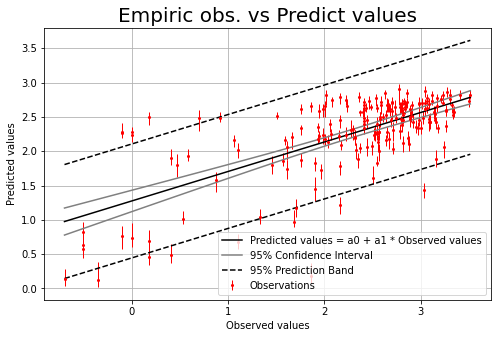

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-0.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: r2020B01: mean - 0.131, median - 0.131, CI - [0.116-0.147]

SHAP-values for: r2020B03: mean - 0.078, median - 0.078, CI - [0.066-0.09]

SHAP-values for: r2020B05: mean - 0.088, median - 0.087, CI - [0.078-0.098]

SHAP-values for: r2020B06: mean - 0.081, median - 0.082, CI - [0.07-0.094]

SHAP-values for: r2020B07: mean - 0.049, median - 0.049, CI - [0.042-0.058]

SHAP-values for: r2020B10: mean - 0.064, median - 0.064, CI - [0.052-0.075]

SHAP-values for: r2020B11: mean - 0.102, median - 0.103, CI - [0.09-0.114]



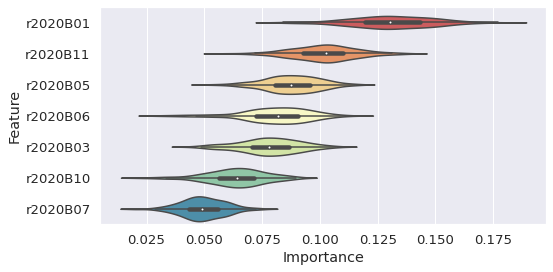

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['r2020B01', 'r2020B11', 'r2020B05', 'r2020B06', 'r2020B03', 'r2020B10', 'r2020B07'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [28]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 91.55, median: 95.0,
 pred. interval (P(0.025)-P(0.975)): 50.0-113.0, 
 conf. interval (p-value=0.95): 76.122-109.383 
***
Aggregate bias statistic: 
 mean: -0.035, median: -0.042,
 pred. interval (P(0.025)-P(0.975)): -0.236-0.16, 
 conf. interval (p-value=0.95): -0.124-0.055 
***
Aggregate RMSE statistic: 
 mean: 0.677, median: 0.673, pred. interval (P(0.025)-P(0.975)): 0.503-0.87, 
 conf. interval (p-value=0.95): 0.587-0.76 
***
Aggregate MSE statistic: 
 mean: 0.468, median: 0.453, pred. interval (P(0.025)-P(0.975)): 0.253-0.757, 
 conf. interval (p-value=0.95): 0.345-0.579 
***
Aggregate R^2 statistic: 
 mean: 0.441, median: 0.472, pred. interval (P(0.025)-P(0.975)): 0.052-0.662, 
 conf. interval (p-value=0.95): 0.321-0.579 
***
Aggregate bias(%) statistic: 
 mean: -1.326, median: -1.846, pred. interval (P(0.025)-P(0.975)): -9.269-7.579, 
 conf. interval (p-value=0.95): -5.004-2

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

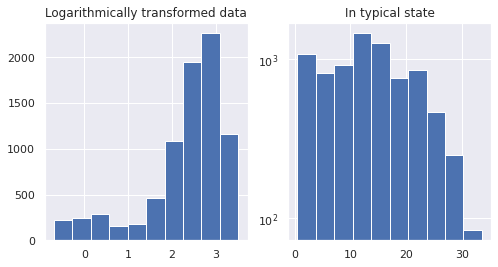

In [29]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [30]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-1, 0, 1, 2, 3, 4])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 5, 10, 15, 20, 25, 30])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

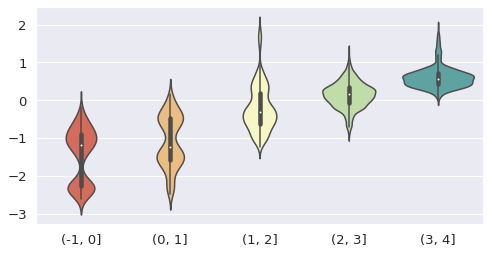

In [31]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [ ]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

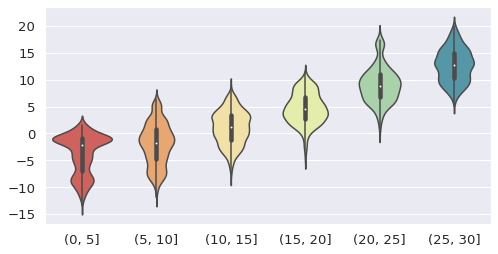

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

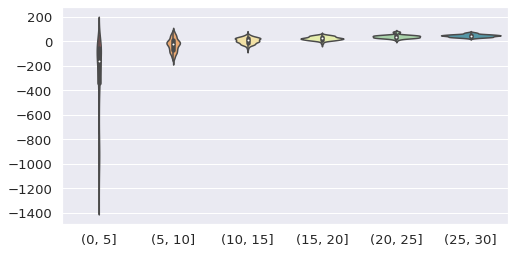

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [35]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [36]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [37]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.95120
[1]	validation_0-rmse:1.87338
[2]	validation_0-rmse:1.79942
[3]	validation_0-rmse:1.73382
[4]	validation_0-rmse:1.66680
[5]	validation_0-rmse:1.60569
[6]	validation_0-rmse:1.55240
[7]	validation_0-rmse:1.49800
[8]	validation_0-rmse:1.44744
[9]	validation_0-rmse:1.39978
[10]	validation_0-rmse:1.35078


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.30499
[12]	validation_0-rmse:1.26056
[13]	validation_0-rmse:1.22193
[14]	validation_0-rmse:1.18385
[15]	validation_0-rmse:1.14732
[16]	validation_0-rmse:1.11203
[17]	validation_0-rmse:1.07678
[18]	validation_0-rmse:1.04812
[19]	validation_0-rmse:1.02036
[20]	validation_0-rmse:0.99510
[21]	validation_0-rmse:0.97298
[22]	validation_0-rmse:0.94668
[23]	validation_0-rmse:0.92395
[24]	validation_0-rmse:0.90393
[25]	validation_0-rmse:0.88625
[26]	validation_0-rmse:0.86718
[27]	validation_0-rmse:0.84975
[28]	validation_0-rmse:0.83128
[29]	validation_0-rmse:0.81745
[30]	validation_0-rmse:0.80280
[31]	validation_0-rmse:0.78778
[32]	validation_0-rmse:0.77264
[33]	validation_0-rmse:0.76303
[34]	validation_0-rmse:0.75055
[35]	validation_0-rmse:0.73936
[36]	validation_0-rmse:0.73033
[37]	validation_0-rmse:0.71743
[38]	validation_0-rmse:0.70970
[39]	validation_0-rmse:0.70037
[40]	validation_0-rmse:0.69285
[41]	validation_0-rmse:0.68784
[42]	validation_0-rmse:0.68152
[43]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [38]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 113


In [39]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

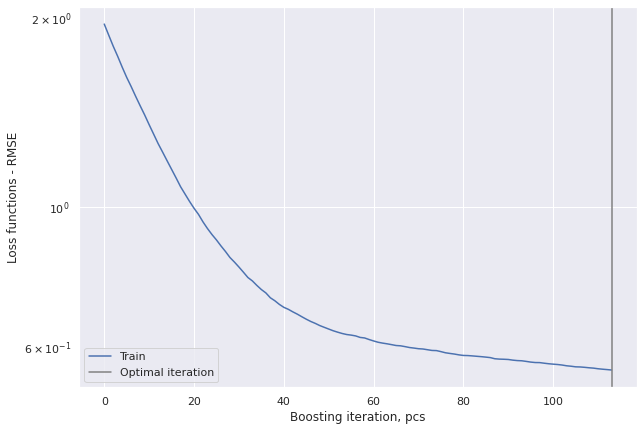

In [40]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [41]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.37
RMSE: 0.6
Relative RMSE(%):  23.909
MSE: 0.3
R square: 64.6%


In [42]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.657
Uncertainty
a0: 0.97+/-0.07
a1: 0.573+/-0.030


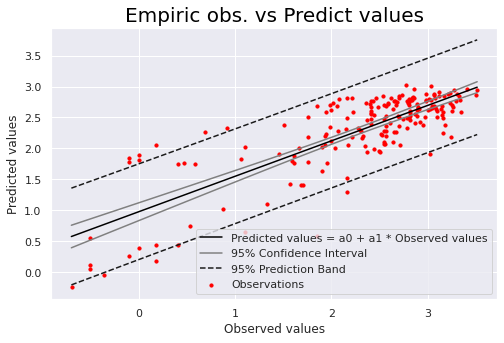

In [43]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-0.7, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

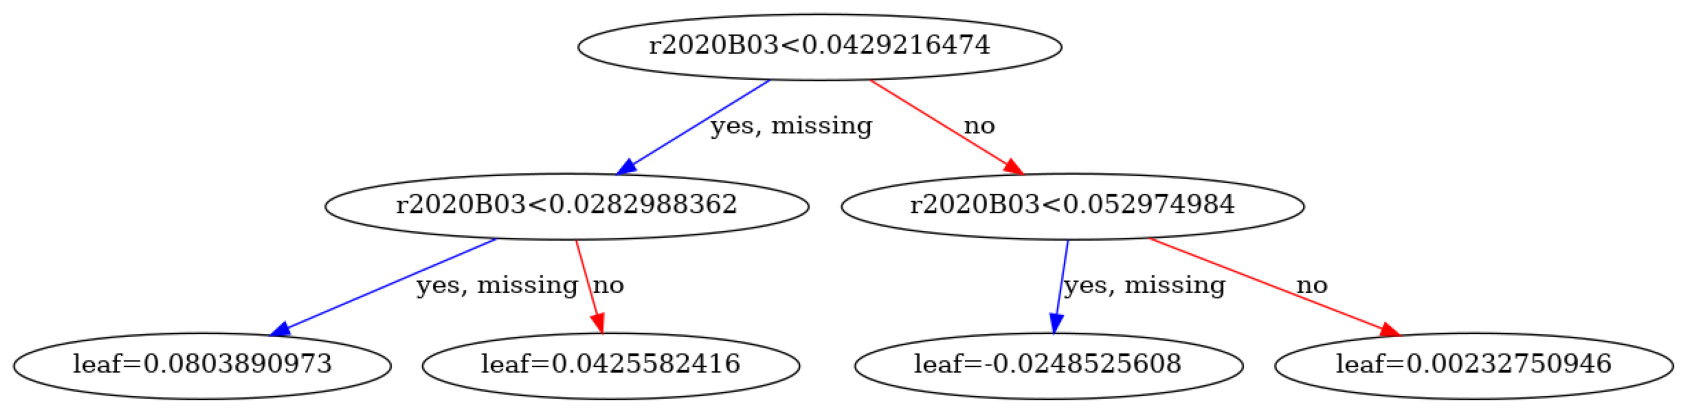

In [45]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

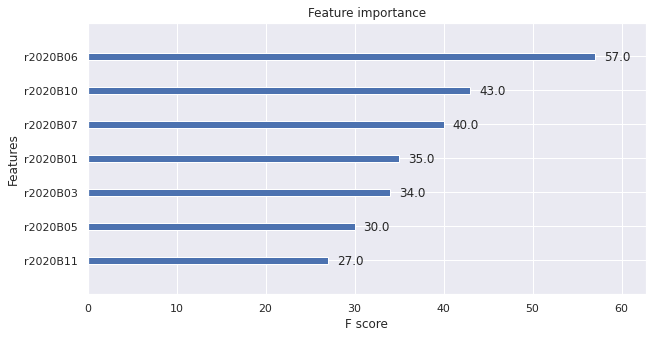

In [47]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

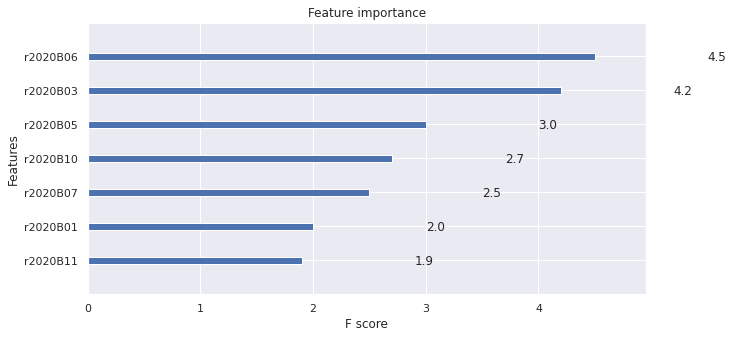

In [48]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

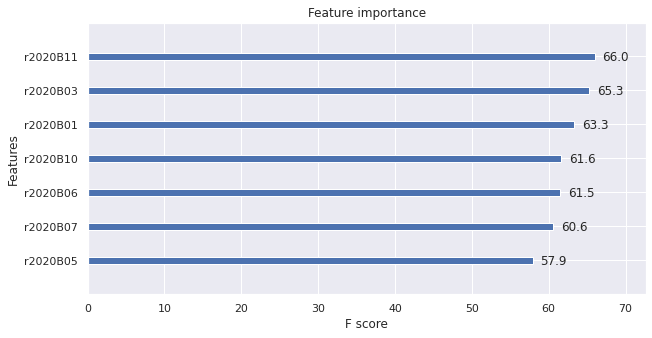

In [49]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [50]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


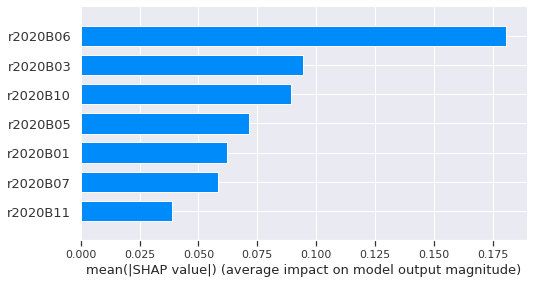

In [51]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

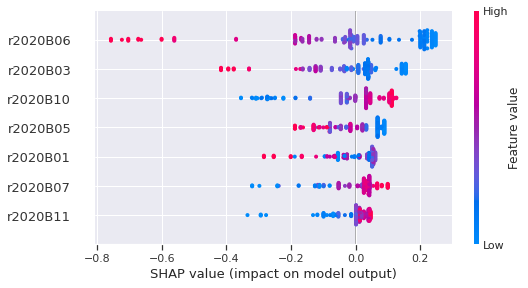

In [52]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

invalid value encountered in true_divide
invalid value encountered in true_divide


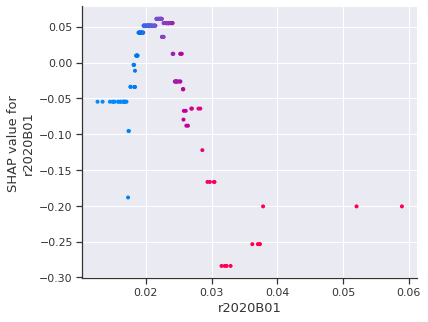

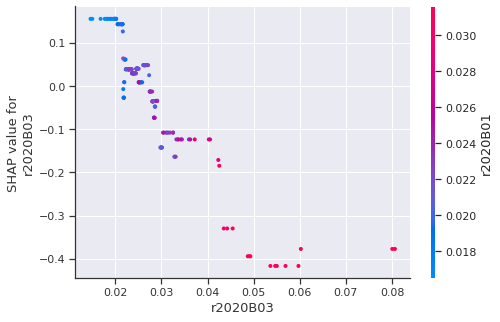

invalid value encountered in true_divide
invalid value encountered in true_divide


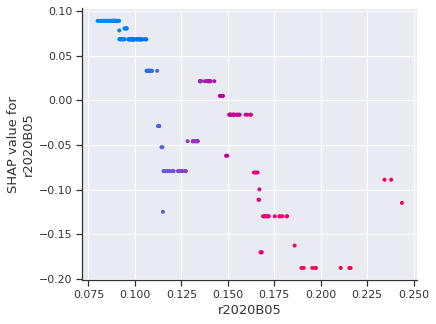

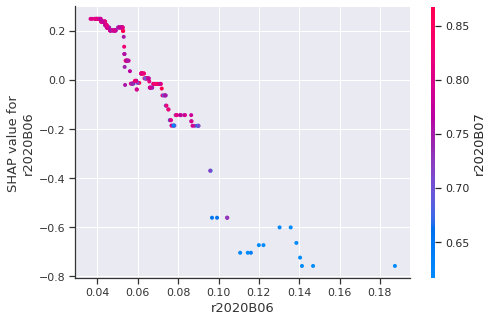

invalid value encountered in true_divide
invalid value encountered in true_divide


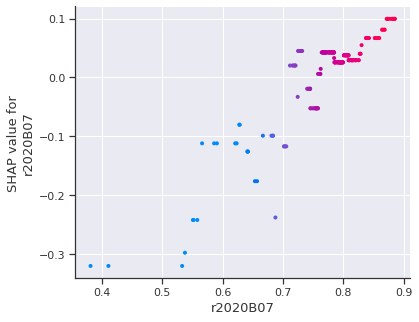

invalid value encountered in true_divide
invalid value encountered in true_divide


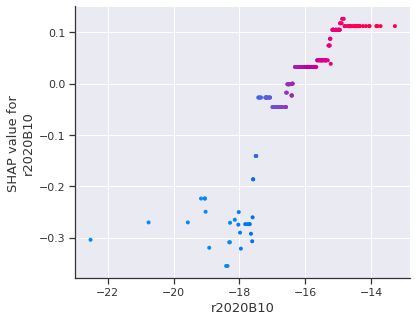

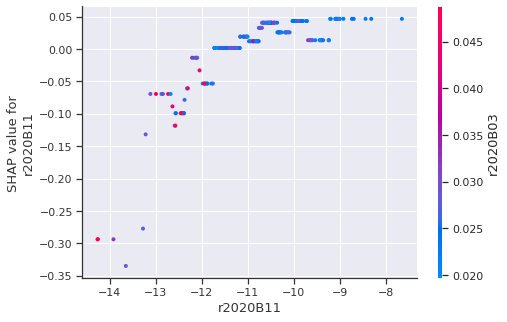

In [53]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [54]:
# Save to JSON
f_xgb_model.save_model("../05_output_data/XGBoost_models/08_LN_M_AG_SENTINEL_2020_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../05_output_data/XGBoost_models/08_LN_M_AG_SENTINEL_2020_XGB_model.txt")